<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/CryptoFinanceQuant/blob/main/ParTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#baixar bibliotecas
!pip install yfinance --upgrade --no-cache-dir

In [22]:
#importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.stattools import coint

In [23]:
#Fuunção para avaliar estacionaridade de uma série
def avalia_estacionaridade(X, cutoff = 0.01):
  #H0 teste com raiz unitaria (não-estacionaria)
  pvalue = adfuller(X)[1]
  if pvalue < cutoff:
    print('pvalue =' + str(pvalue) + ' A Série ' + X.name + ' é estacionária')
    return True
  else:
    print('pvalue =' + str(pvalue) + ' A Série ' + X.name + ' não é estacionária')
    return False

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

In [25]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys=data.keys()
    pairs=[]
    for i in range(n):
        for j in range(i+1, n):
             S1 = data[keys[i]]
             S2 = data[keys[j]]
             result = coint(S1, S2)
             score = result[0]
             pvalue = result[1]
             score_matrix[i, j] = score
             pvalue_matrix[i, j] = pvalue
             if pvalue < 0.001:
                 pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs
 
#função para plotar pares
def plotPares(d2, par):
    (d2[par[0]]/np.mean(d2[par[0]])).plot()
    (d2[par[1]]/np.mean(d2[par[1]])).plot()
    plt.legend(par)
    plt.show()

In [46]:
# o ratio não é muito indicado para avaliar as possiveis entradas nos trades:
def zscore(series):
  return (series - series.mean())/np.std(series)
def desenhaRatio(d2,par):

  #d2 - dataframe
  data = d2
  S1 = data[par[0]]
  S2 = data[par[1]]
    
  score, pvalue, _ = coint(S1, S2)
  print('P-valor =',pvalue)
  print('Score =',abs(score))
  ratios= S1/S2
  print('Ratios =',ratios.mean())
  zscore(ratios).plot(figsize=(15,7))

  plt.axhline(zscore(ratios).mean(), color='black')
  plt.axhline(1.0, color='red', linestyle='--')
  plt.axhline(-1.0, color='green', linestyle='--')
  plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
  plt.show()

In [27]:
#Portfólio 
symbols =  ['BTC-USD' , 'ETH-USD' ,'BNB-USD', 'SOL-USD' ,'LUNA-USD','AVAX-USD','DOT-USD','WBTC-USD',
           'NEAR-USD','LTC-USD','BCH-USD','UNI-USD','LEO-USD','LINK-USD','FTT-USD',
           'ATOM-USD','XMR-USD','ETC-USD','APE-USD','ICP-USD', 
           'FIL-USD', 'EGLD-USD', 'MANA-USD', 'SAND-USD', 'XTZ-USD', 'THETA-USD', 'CAKE-USD', 'RUNE-USD', 'EOS-USD', 'AAVE-USD', 
           'AXS-USD', 'HNT-USD', 'ZEC-USD', 'KCS-USD', 'GMT-USD', 'FLOW-USD', 'WAVES-USD', 'HT-USD', 
            'GRT-USD', 'BSV-USD',  'MKR-USD', 'NEO-USD',  'QNT-USD', 'NEXO-USD', 'CRV-USD', 'KSM-USD', 'OKB-USD', 'CELO-USD', 
             'ENJ-USD', 'DASH-USD' , 'MINA-USD',  'DCR-USD', 'AR-USD', 'KAVA-USD', 
           'COMP1-USD', 'ANCT-USD',  'PAXG-USD', 'KDA-USD', 'YFI-USD', 'ZRX-USD',   'GLMR-USD', 'SUSHI-USD', 'XNO-USD', 'XCH-USD',
            'DOW-USD', 'BTCDOWN-USD', 'ETHDOWN-USD','TRXDOWN-USD','DOTDOWN-USD','LINKDOWN-USD','ADADOWN-USD','BNBDOWN-USD']

portfolio = web.get_data_yahoo(symbols, period='3y')['Close']

[*********************100%***********************]  72 of 72 completed


In [28]:
nao_est = []
portfolio = portfolio.fillna(value=0)

for s in symbols:
  if not avalia_estacionaridade(portfolio[s]):
    nao_est.append(s)

portfolio_naoest = portfolio[nao_est]

pvalue =0.6117739730396177 A Série BTC-USD não é estacionária
pvalue =0.6267321075026718 A Série ETH-USD não é estacionária
pvalue =0.5833699427651933 A Série BNB-USD não é estacionária
pvalue =0.4546777655772783 A Série SOL-USD não é estacionária
pvalue =0.0 A Série LUNA-USD é estacionária
pvalue =0.45617032011264114 A Série AVAX-USD não é estacionária
pvalue =0.4167915117006552 A Série DOT-USD não é estacionária
pvalue =0.6008861784764477 A Série WBTC-USD não é estacionária
pvalue =0.23345150296578093 A Série NEAR-USD não é estacionária
pvalue =0.4869376484009122 A Série LTC-USD não é estacionária
pvalue =0.12884205229579165 A Série BCH-USD não é estacionária
pvalue =0.0015404690476321092 A Série UNI-USD é estacionária
pvalue =0.9652766943732831 A Série LEO-USD não é estacionária
pvalue =0.4304471079264349 A Série LINK-USD não é estacionária
pvalue =0.6599675905490523 A Série FTT-USD não é estacionária
pvalue =0.5398097621950438 A Série ATOM-USD não é estacionária
pvalue =0.392003913

In [29]:
portfolio_naoest.head()

BTC-USD     ETH-USD    BNB-USD  SOL-USD  AVAX-USD  DOT-USD  \
Date                                                                         
2019-05-12  6972.371582  187.325317  20.830297      0.0       0.0      0.0   
2019-05-13  7814.915039  196.846283  23.811028      0.0       0.0      0.0   
2019-05-14  7994.416016  217.148575  23.626419      0.0       0.0      0.0   
2019-05-15  8205.167969  247.153061  26.894939      0.0       0.0      0.0   
2019-05-16  7884.909180  264.010010  26.325806      0.0       0.0      0.0   

               WBTC-USD  NEAR-USD     LTC-USD     BCH-USD  ...  PAXG-USD  \
Date                                                       ...             
2019-05-12  7059.361328       0.0   84.565514  354.029938  ...       0.0   
2019-05-13  7852.687500       0.0   88.058235  384.477142  ...       0.0   
2019-05-14  7853.526367       0.0   91.620407  388.958496  ...       0.0   
2019-05-15  8122.914551       0.0  101.744568  402.927246  ...       0.0   
2019-05-16  7897.754395       0.0   95.585587  398.703644  ...       0.0   

            KDA-USD  YFI-USD   ZRX-USD  GLMR-USD  SUSHI-USD   XNO-USD  \
Date                                                                    
2019-05-12      0.0      0.0  0.273090       0.0        0.0  1.620827   
2019-05-13      0.0      0.0  0.279103       0.0        0.0  1.716175   
2019-05-14      0.0      0.0  0.301006       0.0        0.0  1.718651   
2019-05-15      0.0      0.0  0.362387       0.0        0.0  1.891407   
2019-05-16      0.0      0.0  0.335023       0.0        0.0  1.820978   

            TRXDOWN-USD  DOTDOWN-USD  ADADOWN-USD  
Date                                               
2019-05-12          0.0          0.0          0.0  
2019-05-13          0.0          0.0          0.0  
2019-05-14          0.0          0.0          0.0  
2019-05-15          0.0          0.0          0.0  
2019-05-16          0.0          0.0          0.0  

[5 rows x 59 columns]

[('BTC-USD', 'WBTC-USD'), ('SOL-USD', 'AXS-USD'), ('AVAX-USD', 'NEAR-USD'), ('NEAR-USD', 'LEO-USD'), ('NEAR-USD', 'MANA-USD'), ('NEAR-USD', 'KCS-USD'), ('BCH-USD', 'FIL-USD'), ('BCH-USD', 'THETA-USD'), ('BCH-USD', 'FLOW-USD'), ('BCH-USD', 'KSM-USD'), ('BCH-USD', 'DCR-USD'), ('BCH-USD', 'SUSHI-USD'), ('FTT-USD', 'WAVES-USD'), ('ATOM-USD', 'EGLD-USD'), ('ATOM-USD', 'HNT-USD'), ('ATOM-USD', 'OKB-USD'), ('XMR-USD', 'THETA-USD'), ('XMR-USD', 'KSM-USD'), ('ETC-USD', 'THETA-USD'), ('FIL-USD', 'AAVE-USD'), ('FIL-USD', 'FLOW-USD'), ('FIL-USD', 'HT-USD'), ('FIL-USD', 'NEO-USD'), ('FIL-USD', 'COMP1-USD'), ('FIL-USD', 'XNO-USD'), ('EGLD-USD', 'OKB-USD'), ('THETA-USD', 'CAKE-USD'), ('THETA-USD', 'RUNE-USD'), ('THETA-USD', 'AAVE-USD'), ('THETA-USD', 'HT-USD'), ('THETA-USD', 'MKR-USD'), ('THETA-USD', 'NEO-USD'), ('THETA-USD', 'DCR-USD'), ('THETA-USD', 'COMP1-USD'), ('THETA-USD', 'XNO-USD'), ('CAKE-USD', 'KSM-USD'), ('RUNE-USD', 'KSM-USD'), ('AAVE-USD', 'FLOW-USD'), ('AXS-USD', 'MINA-USD'), ('HNT-USD'

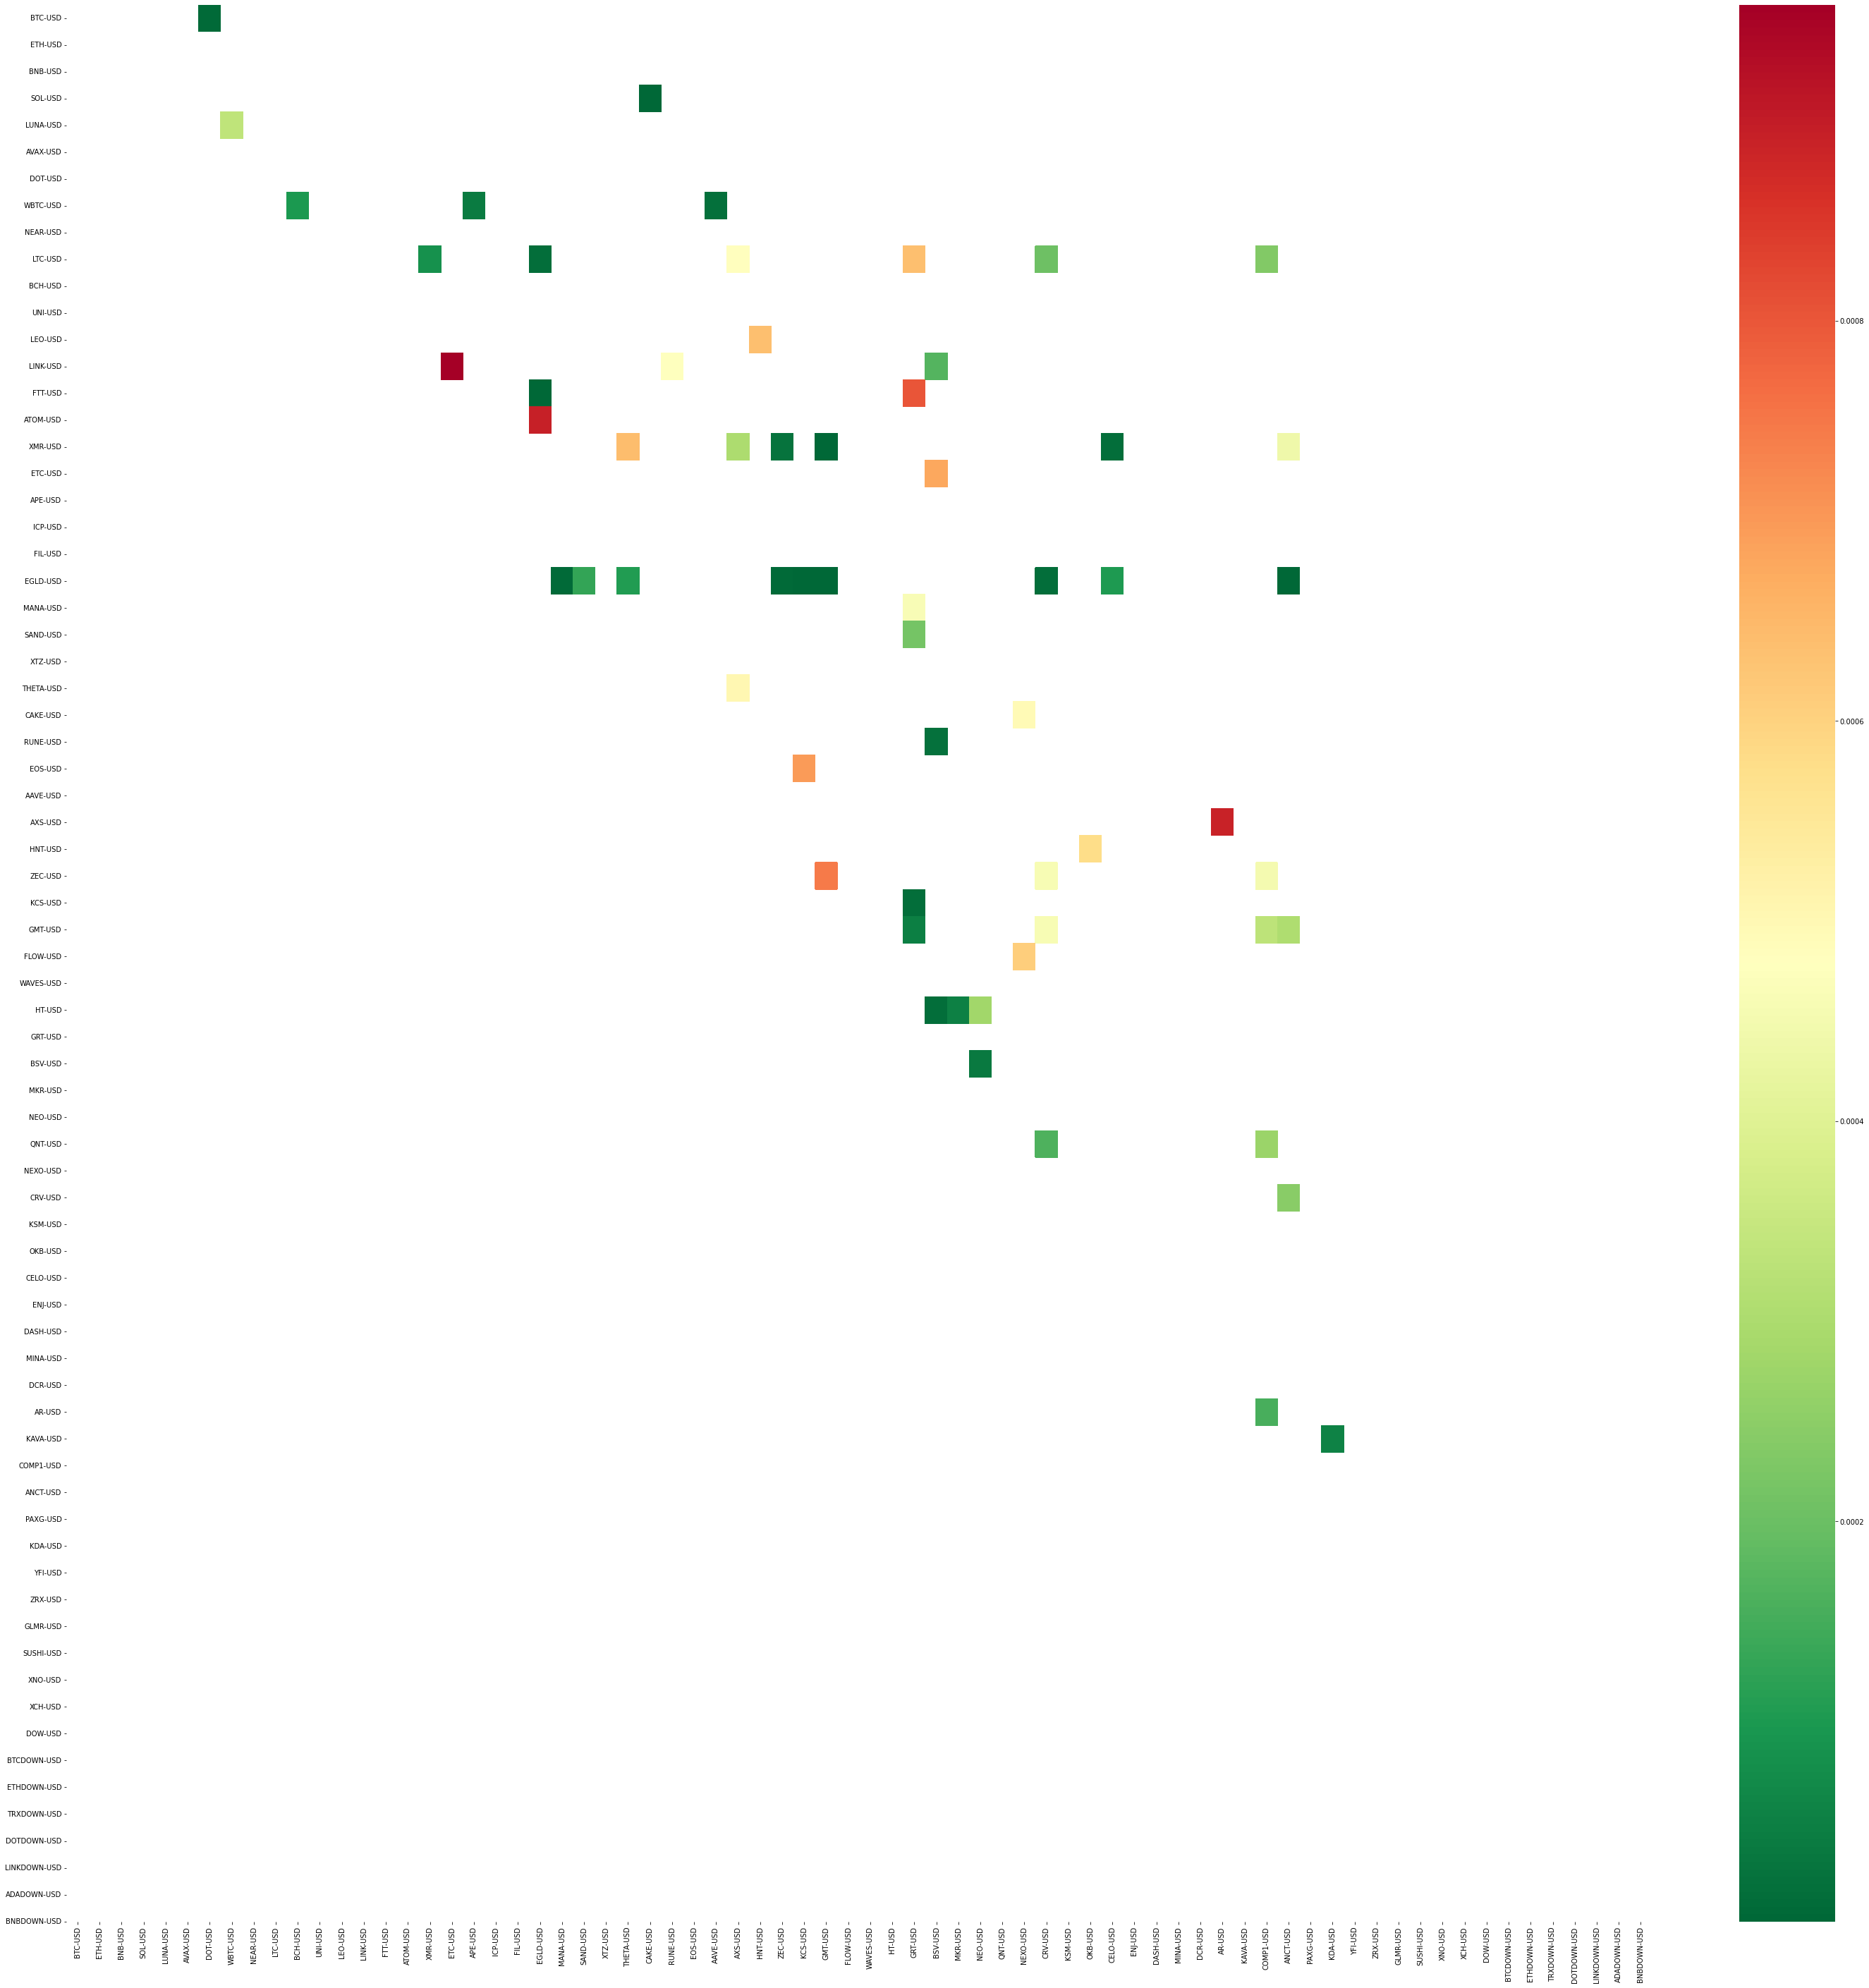

In [30]:
scores, pvalues, pairs = find_cointegrated_pairs(portfolio_naoest)
import seaborn
fig, ax = plt.subplots(figsize=(50,50))
seaborn.heatmap(pvalues, xticklabels=symbols, yticklabels=symbols, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.001)
                )
print(pairs)

In [31]:
# quantidade de pares
print(np.size(pairs))
# mostra os pares cointegrados
print(pairs)

122
[('BTC-USD', 'WBTC-USD'), ('SOL-USD', 'AXS-USD'), ('AVAX-USD', 'NEAR-USD'), ('NEAR-USD', 'LEO-USD'), ('NEAR-USD', 'MANA-USD'), ('NEAR-USD', 'KCS-USD'), ('BCH-USD', 'FIL-USD'), ('BCH-USD', 'THETA-USD'), ('BCH-USD', 'FLOW-USD'), ('BCH-USD', 'KSM-USD'), ('BCH-USD', 'DCR-USD'), ('BCH-USD', 'SUSHI-USD'), ('FTT-USD', 'WAVES-USD'), ('ATOM-USD', 'EGLD-USD'), ('ATOM-USD', 'HNT-USD'), ('ATOM-USD', 'OKB-USD'), ('XMR-USD', 'THETA-USD'), ('XMR-USD', 'KSM-USD'), ('ETC-USD', 'THETA-USD'), ('FIL-USD', 'AAVE-USD'), ('FIL-USD', 'FLOW-USD'), ('FIL-USD', 'HT-USD'), ('FIL-USD', 'NEO-USD'), ('FIL-USD', 'COMP1-USD'), ('FIL-USD', 'XNO-USD'), ('EGLD-USD', 'OKB-USD'), ('THETA-USD', 'CAKE-USD'), ('THETA-USD', 'RUNE-USD'), ('THETA-USD', 'AAVE-USD'), ('THETA-USD', 'HT-USD'), ('THETA-USD', 'MKR-USD'), ('THETA-USD', 'NEO-USD'), ('THETA-USD', 'DCR-USD'), ('THETA-USD', 'COMP1-USD'), ('THETA-USD', 'XNO-USD'), ('CAKE-USD', 'KSM-USD'), ('RUNE-USD', 'KSM-USD'), ('AAVE-USD', 'FLOW-USD'), ('AXS-USD', 'MINA-USD'), ('HNT-

In [32]:
pairs

[('BTC-USD', 'WBTC-USD'),
 ('SOL-USD', 'AXS-USD'),
 ('AVAX-USD', 'NEAR-USD'),
 ('NEAR-USD', 'LEO-USD'),
 ('NEAR-USD', 'MANA-USD'),
 ('NEAR-USD', 'KCS-USD'),
 ('BCH-USD', 'FIL-USD'),
 ('BCH-USD', 'THETA-USD'),
 ('BCH-USD', 'FLOW-USD'),
 ('BCH-USD', 'KSM-USD'),
 ('BCH-USD', 'DCR-USD'),
 ('BCH-USD', 'SUSHI-USD'),
 ('FTT-USD', 'WAVES-USD'),
 ('ATOM-USD', 'EGLD-USD'),
 ('ATOM-USD', 'HNT-USD'),
 ('ATOM-USD', 'OKB-USD'),
 ('XMR-USD', 'THETA-USD'),
 ('XMR-USD', 'KSM-USD'),
 ('ETC-USD', 'THETA-USD'),
 ('FIL-USD', 'AAVE-USD'),
 ('FIL-USD', 'FLOW-USD'),
 ('FIL-USD', 'HT-USD'),
 ('FIL-USD', 'NEO-USD'),
 ('FIL-USD', 'COMP1-USD'),
 ('FIL-USD', 'XNO-USD'),
 ('EGLD-USD', 'OKB-USD'),
 ('THETA-USD', 'CAKE-USD'),
 ('THETA-USD', 'RUNE-USD'),
 ('THETA-USD', 'AAVE-USD'),
 ('THETA-USD', 'HT-USD'),
 ('THETA-USD', 'MKR-USD'),
 ('THETA-USD', 'NEO-USD'),
 ('THETA-USD', 'DCR-USD'),
 ('THETA-USD', 'COMP1-USD'),
 ('THETA-USD', 'XNO-USD'),
 ('CAKE-USD', 'KSM-USD'),
 ('RUNE-USD', 'KSM-USD'),
 ('AAVE-USD', 'FLOW-USD')

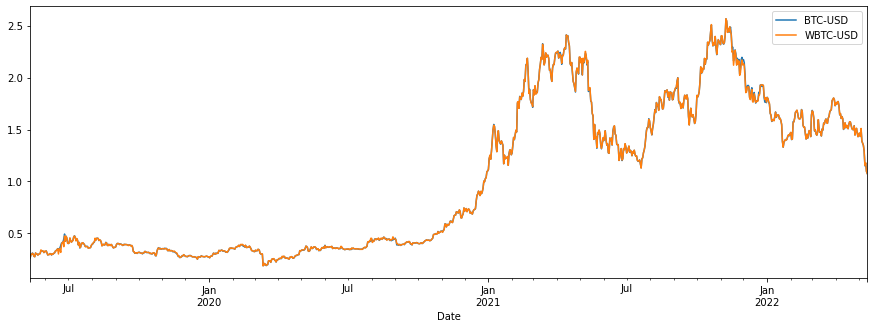

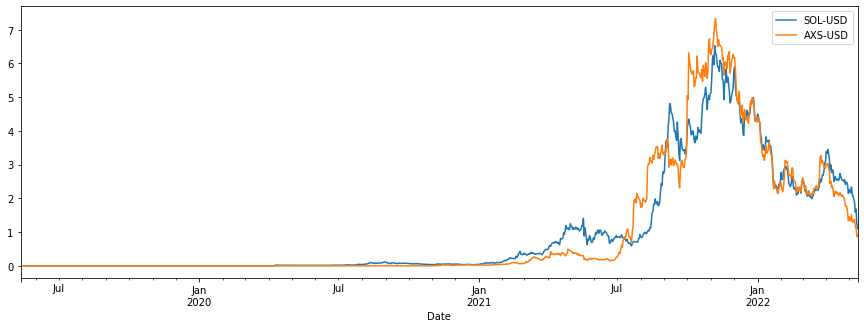

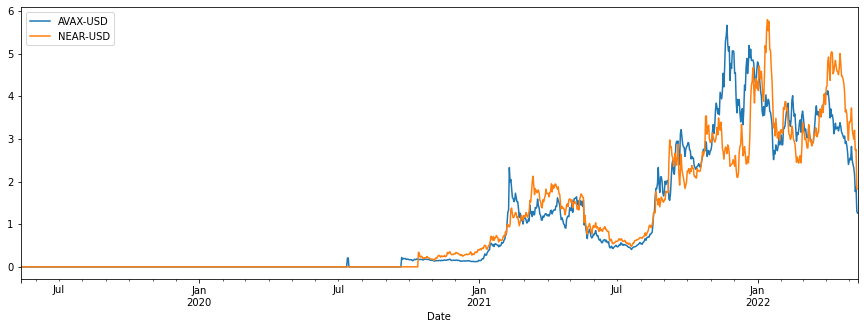

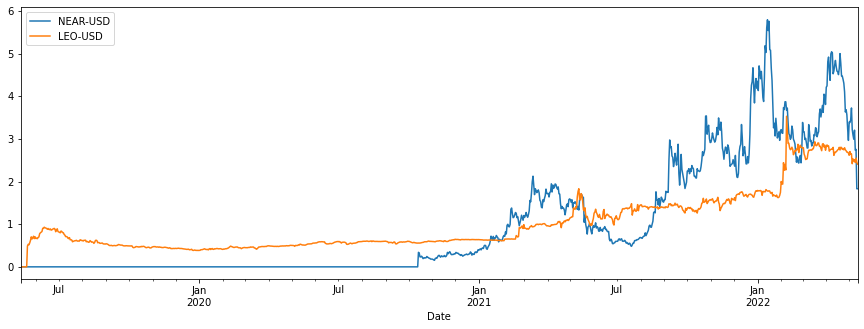

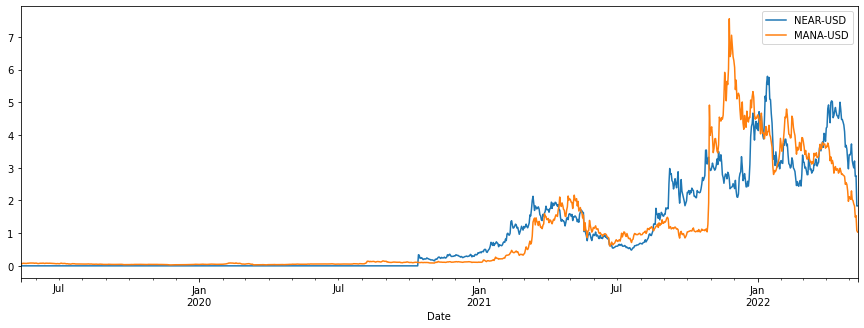

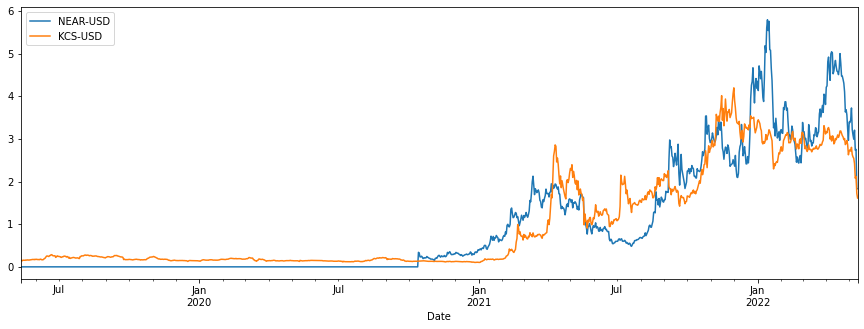

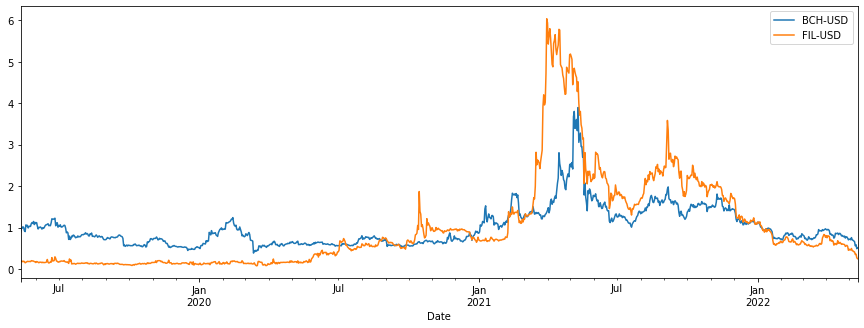

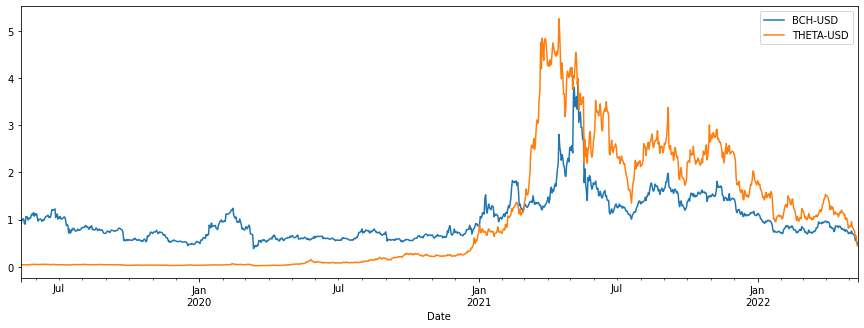

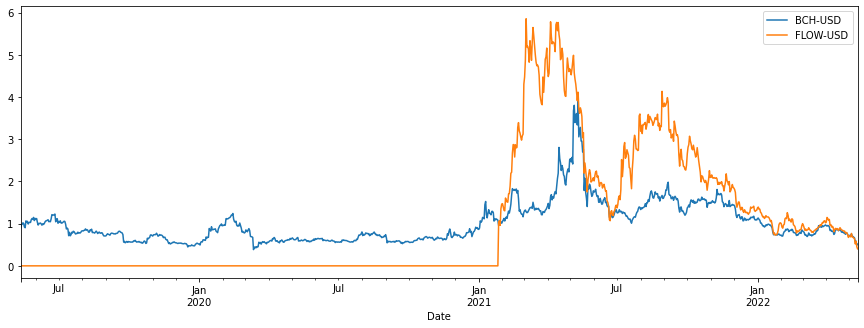

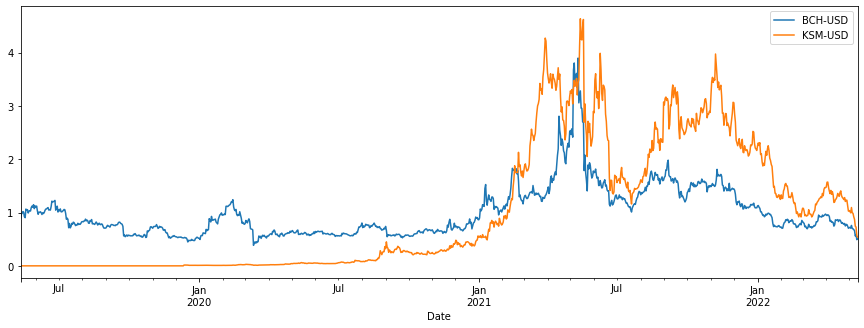

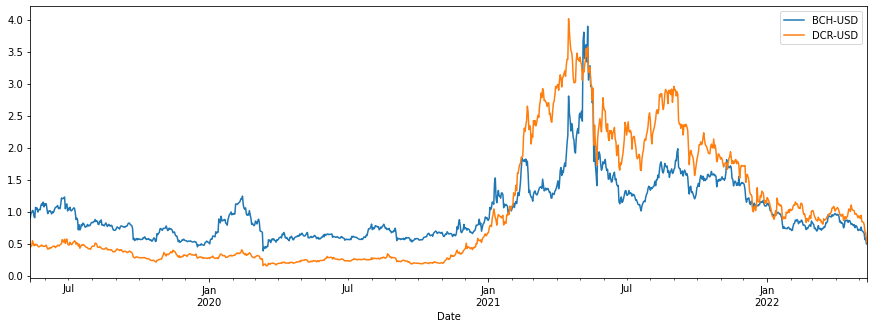

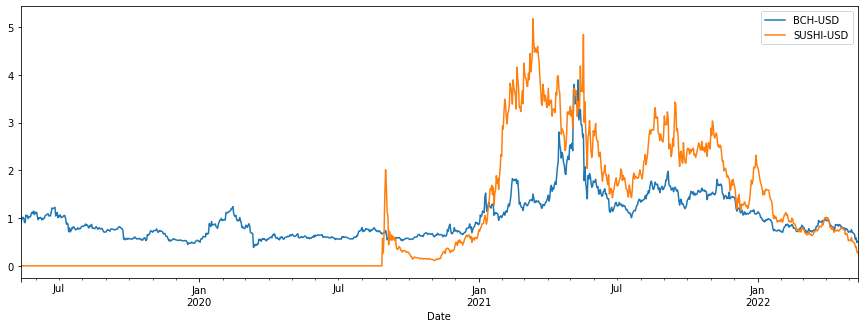

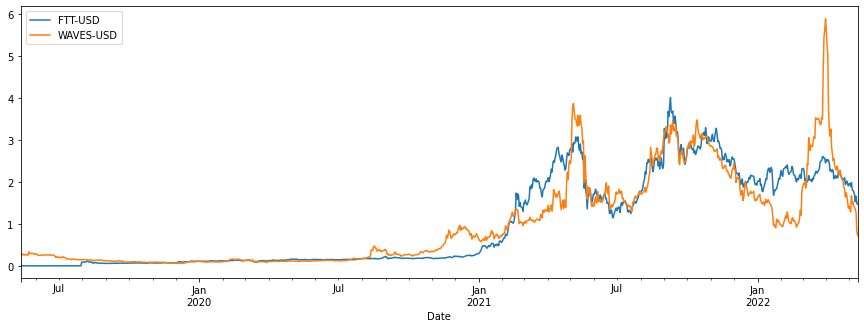

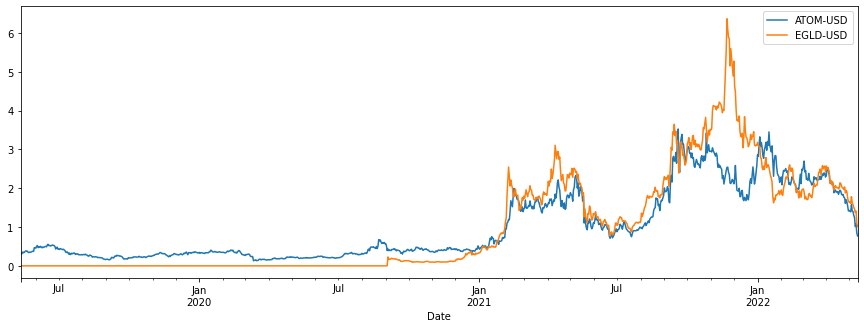

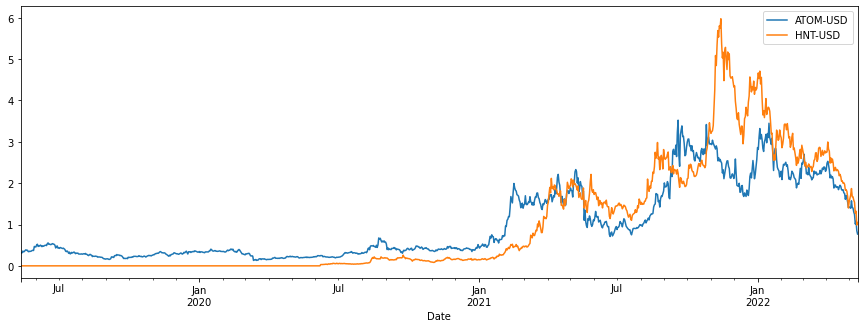

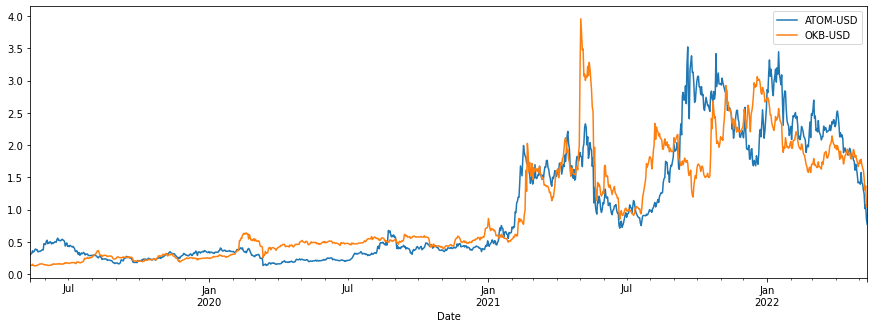

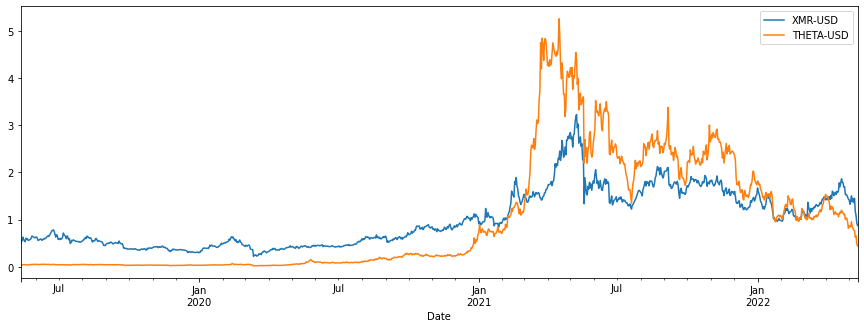

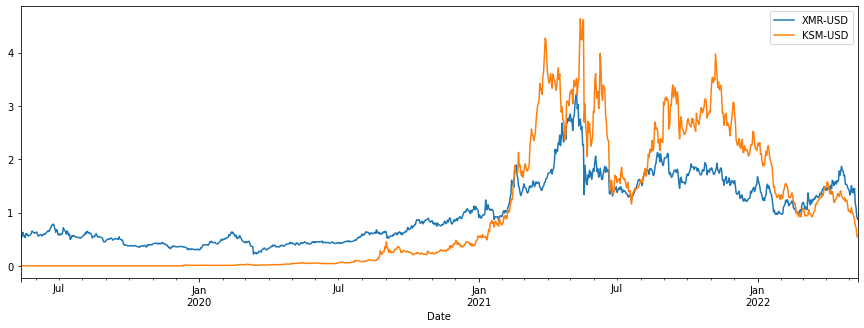

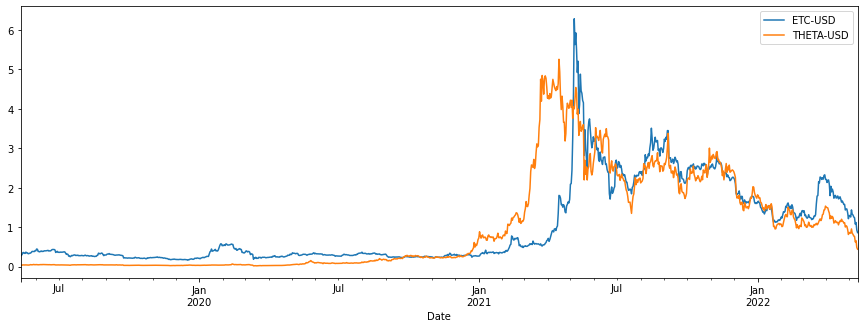

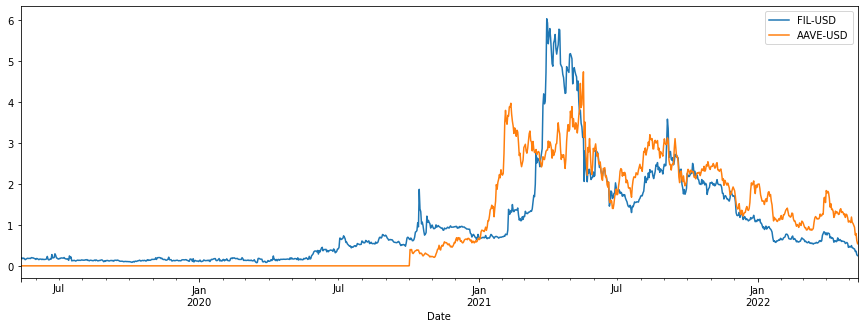

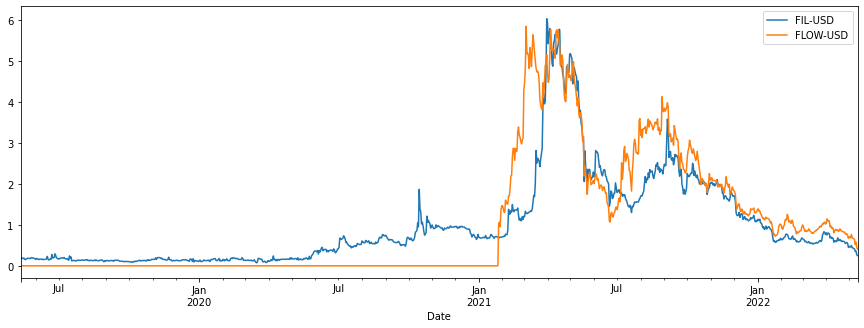

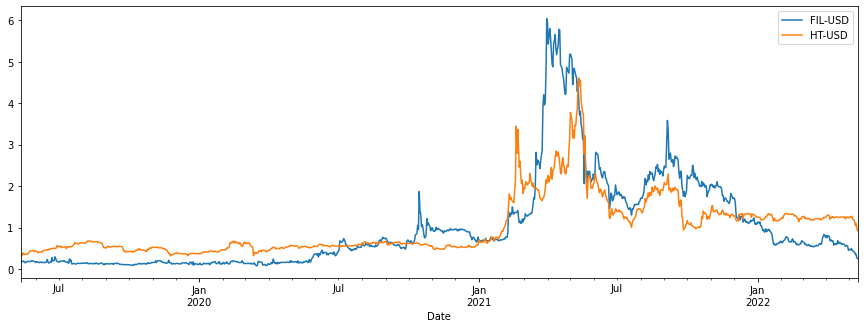

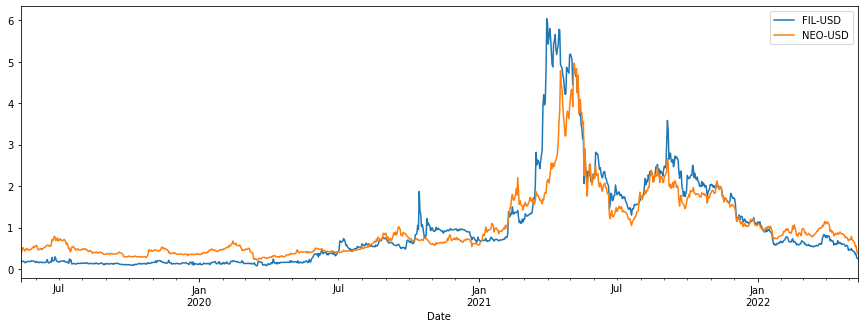

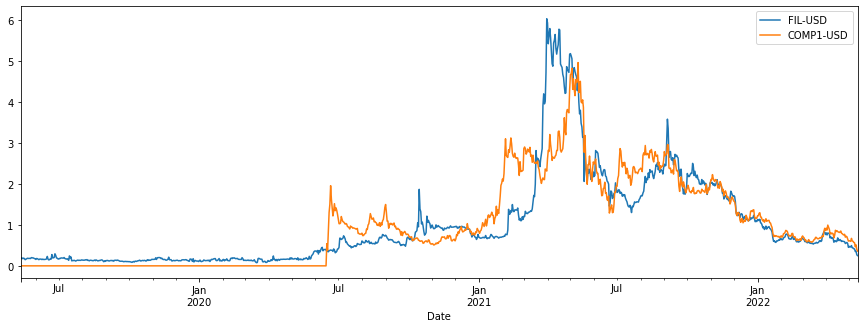

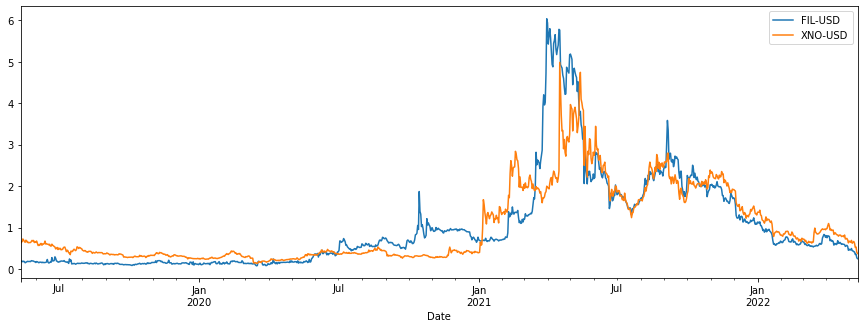

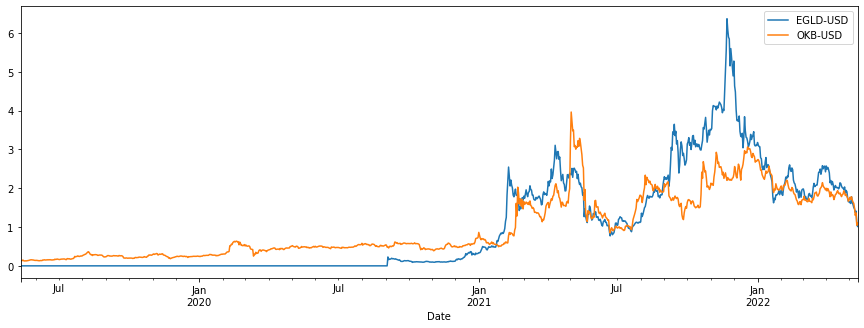

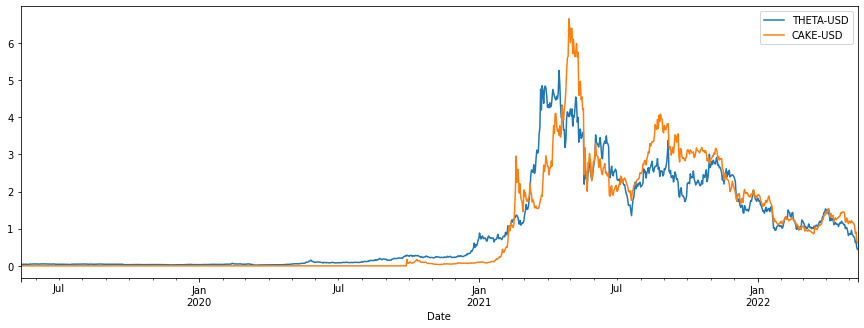

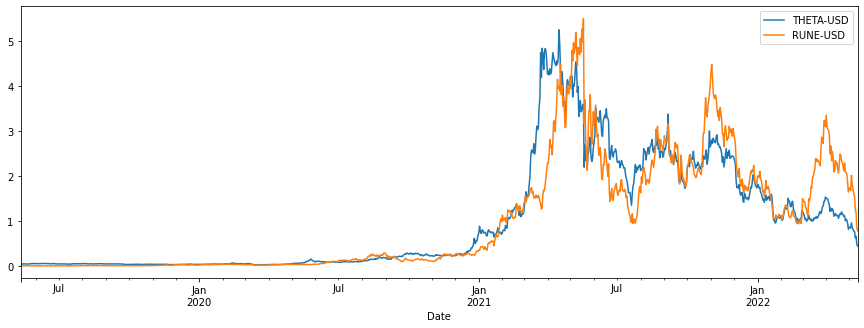

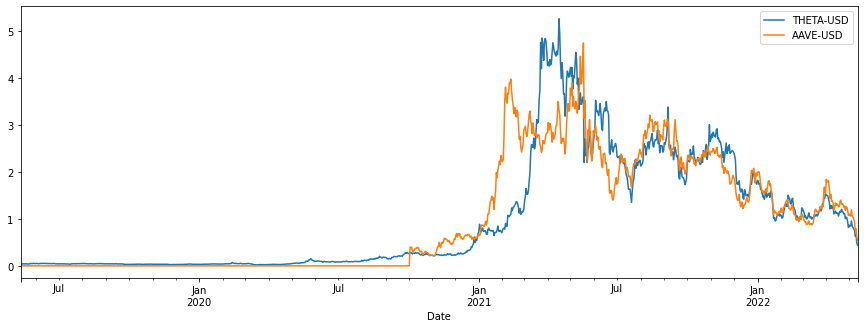

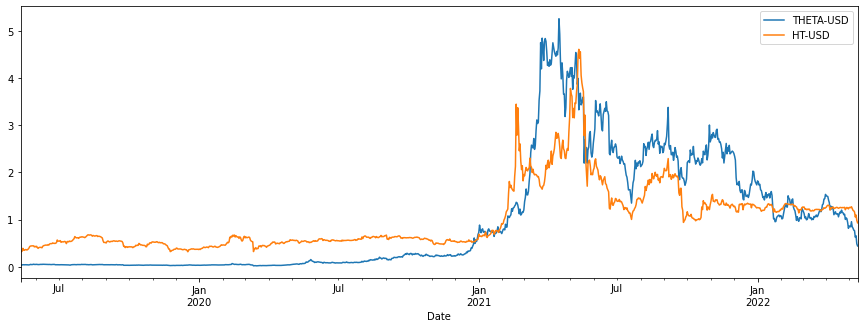

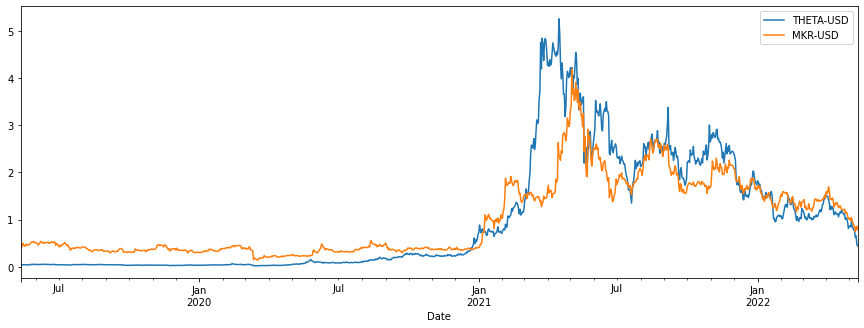

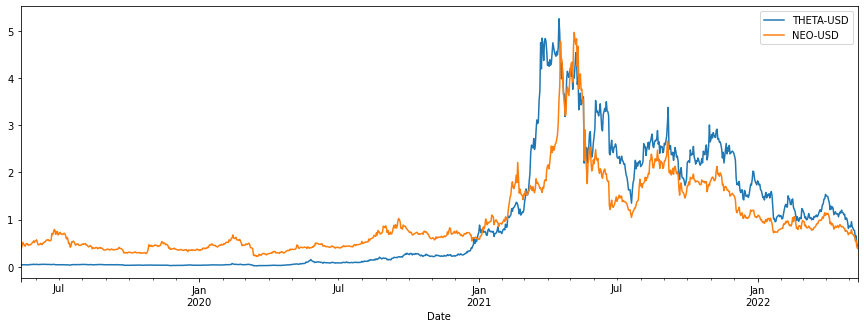

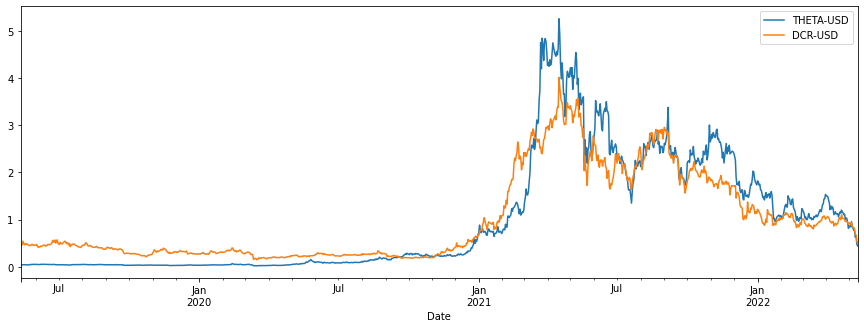

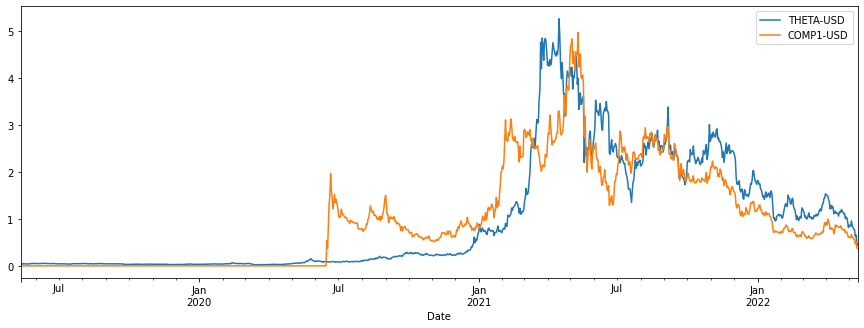

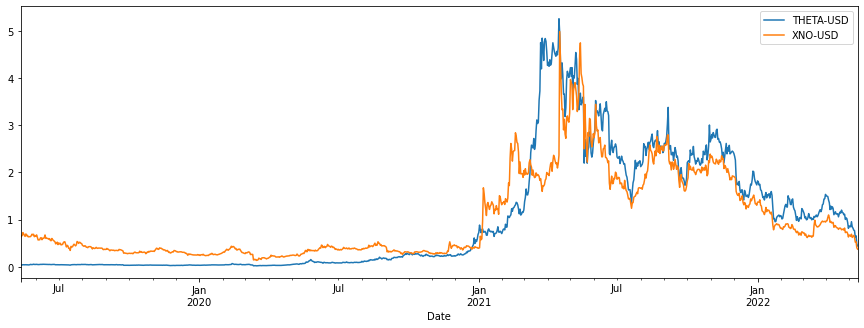

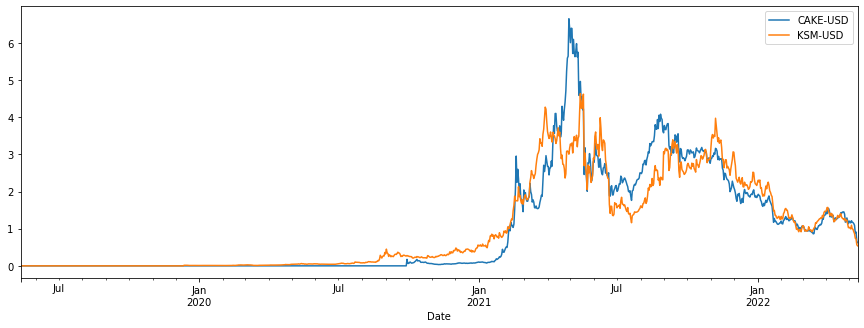

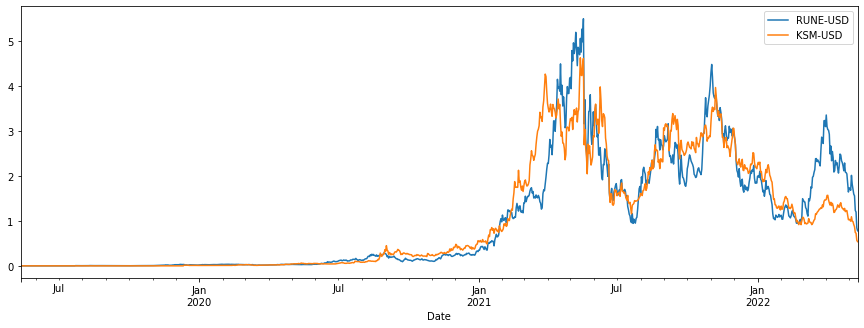

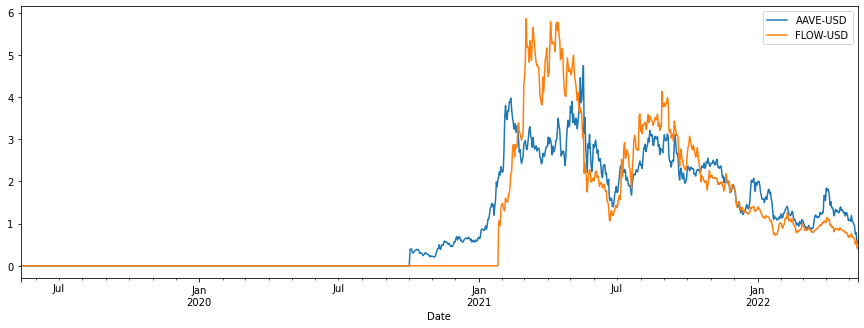

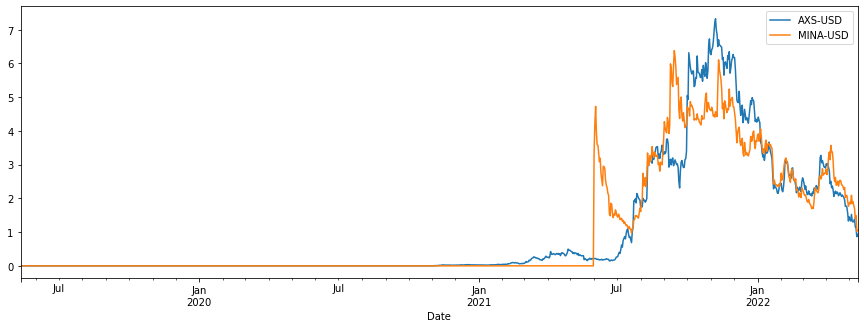

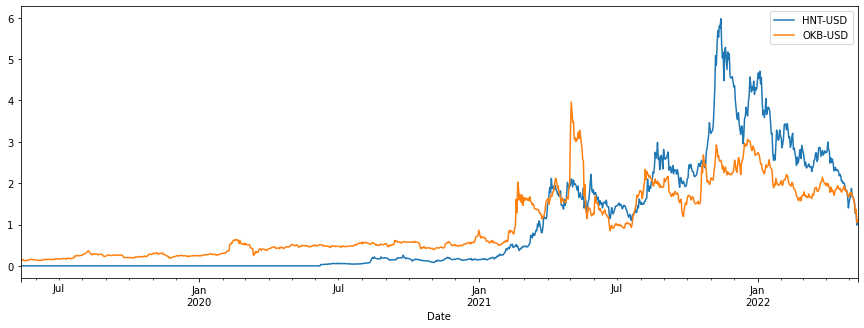

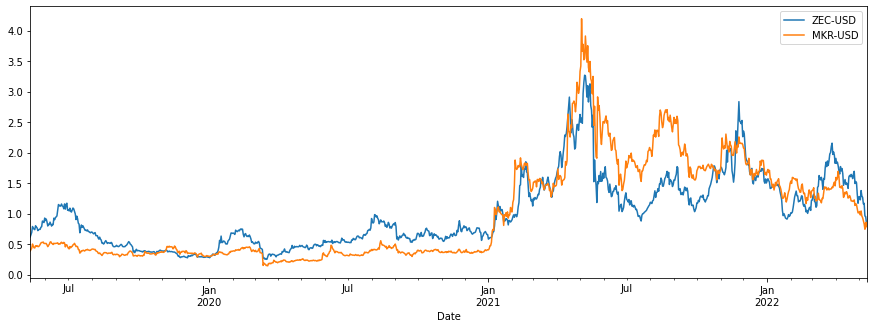

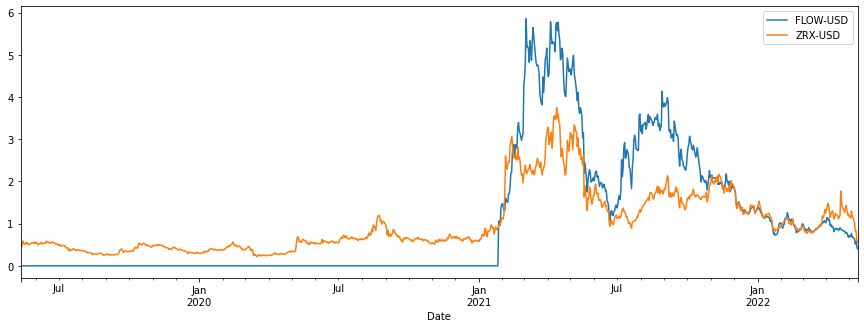

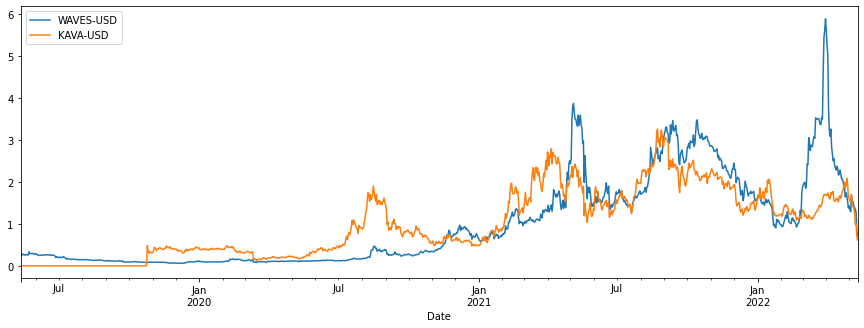

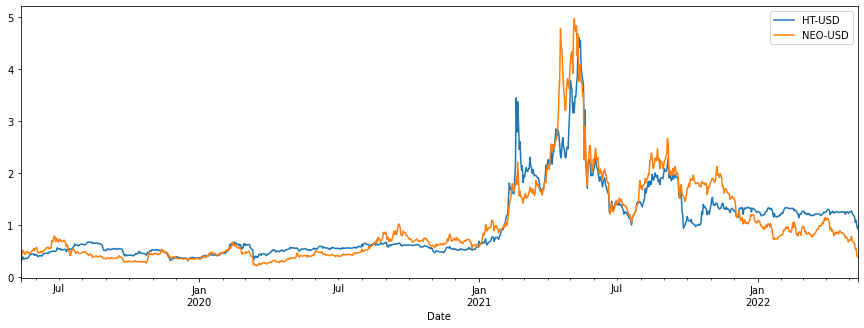

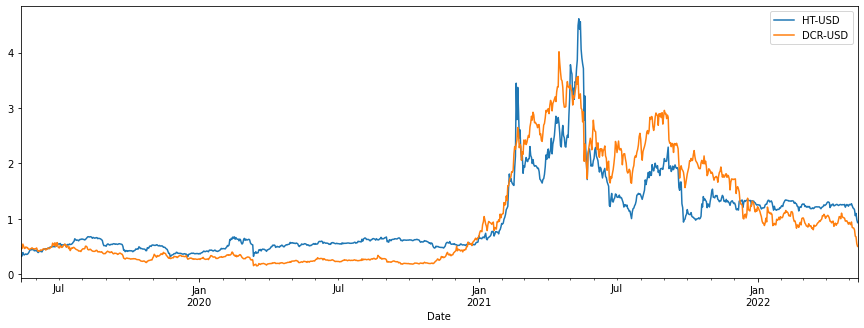

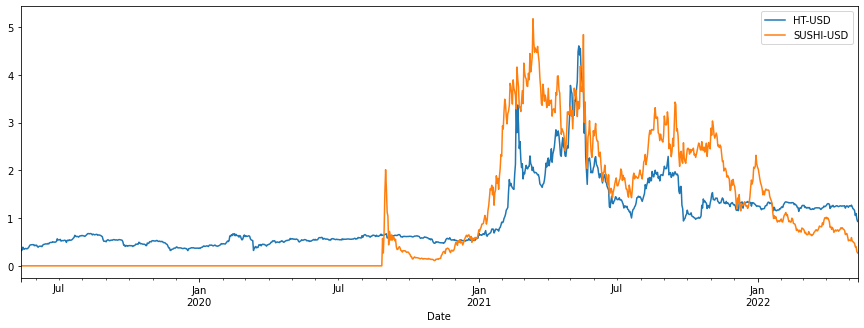

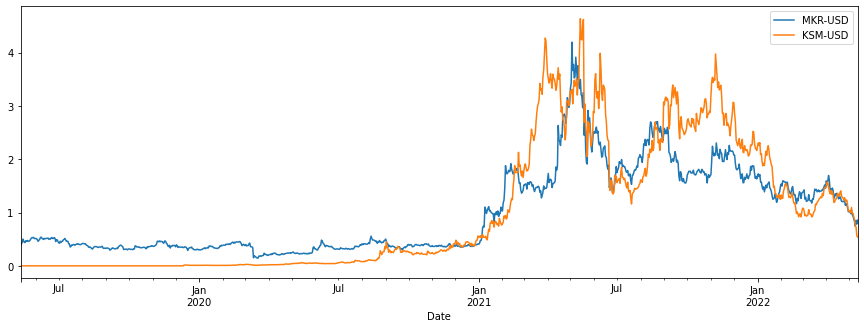

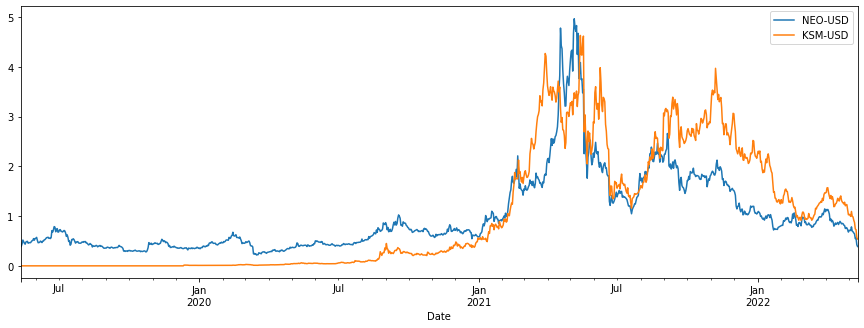

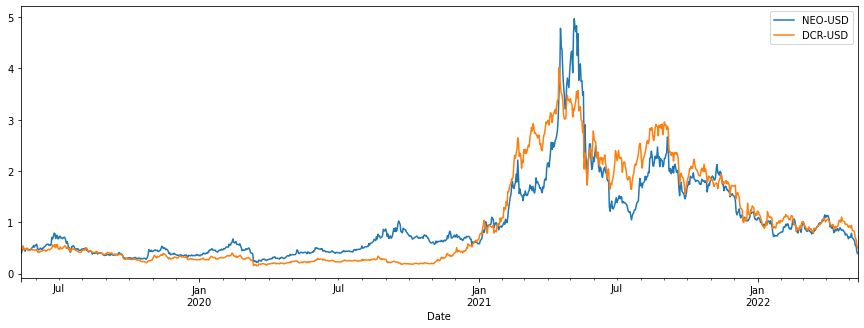

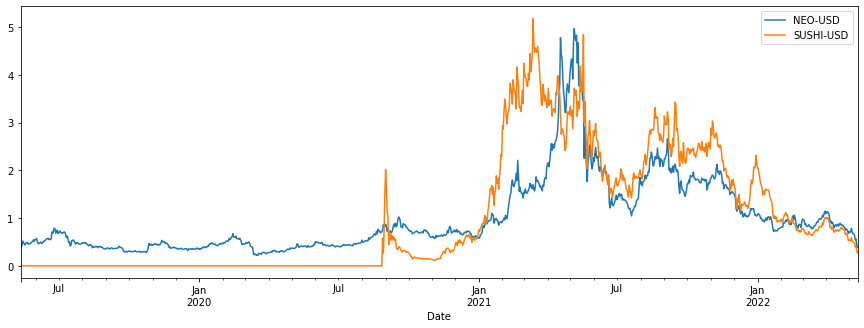

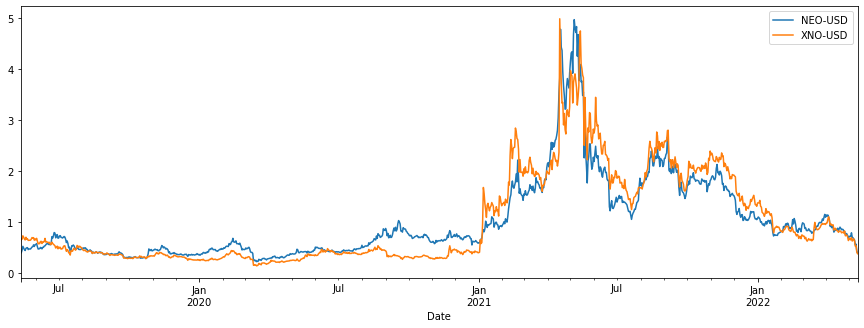

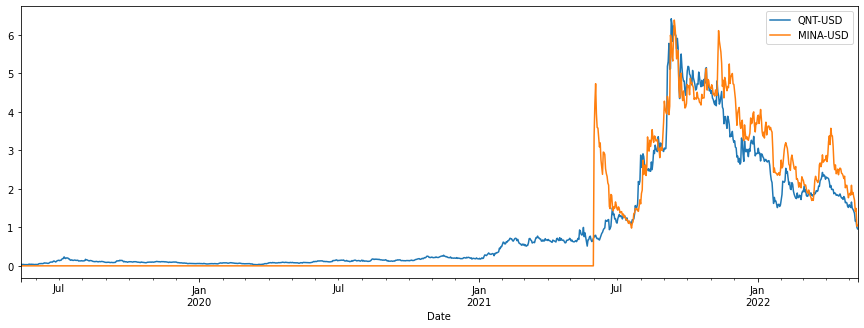

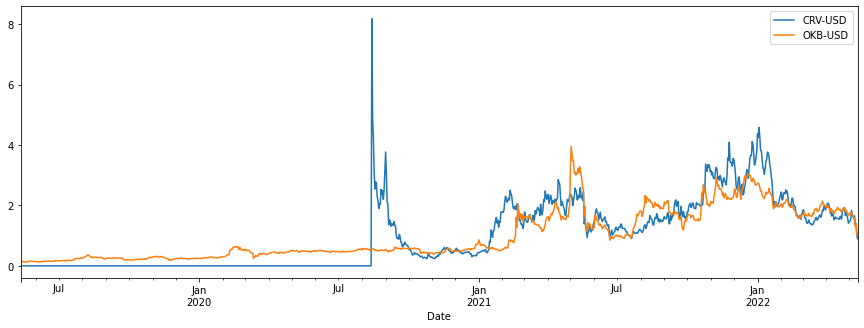

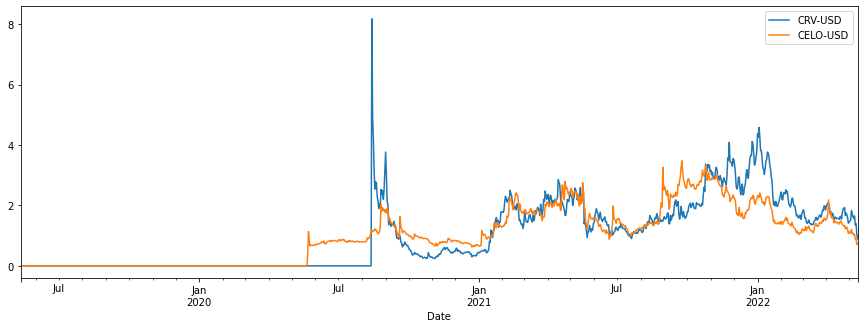

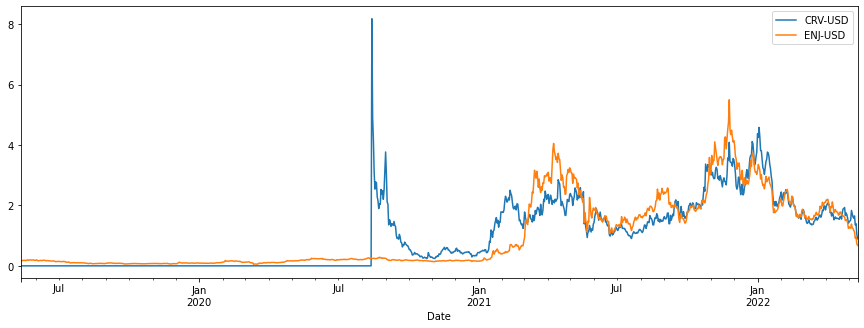

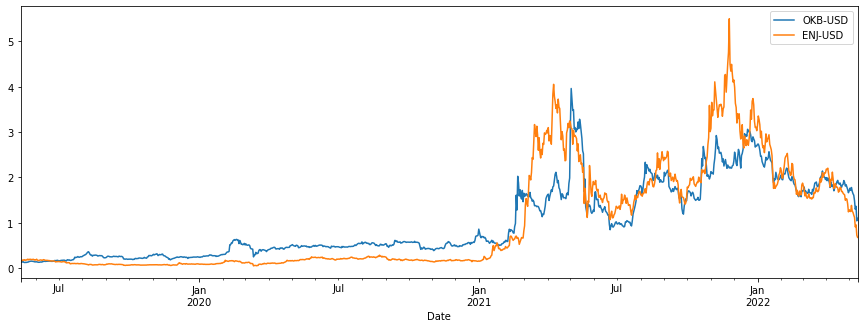

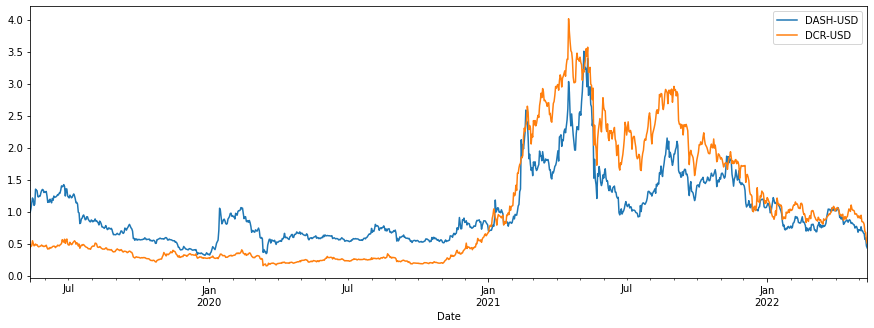

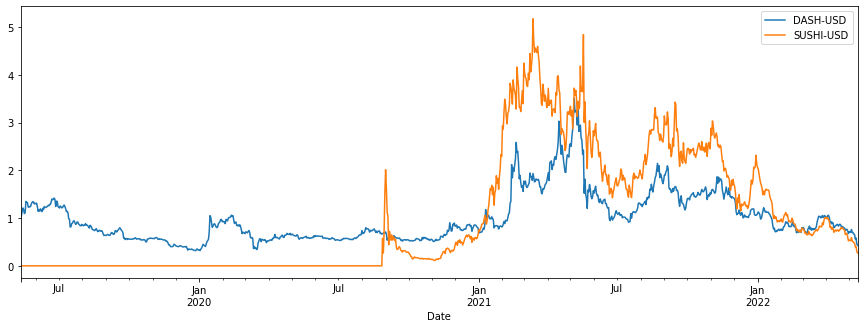

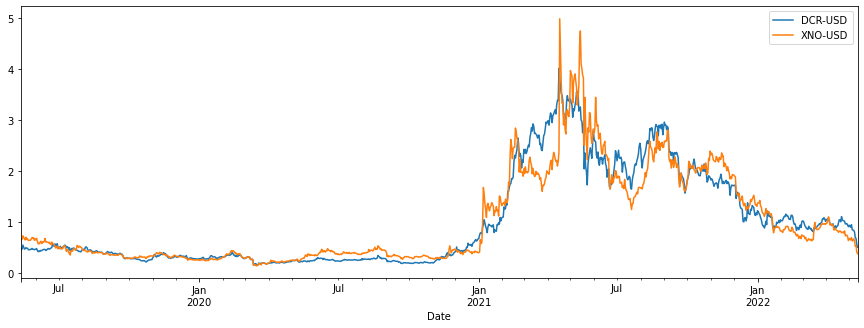

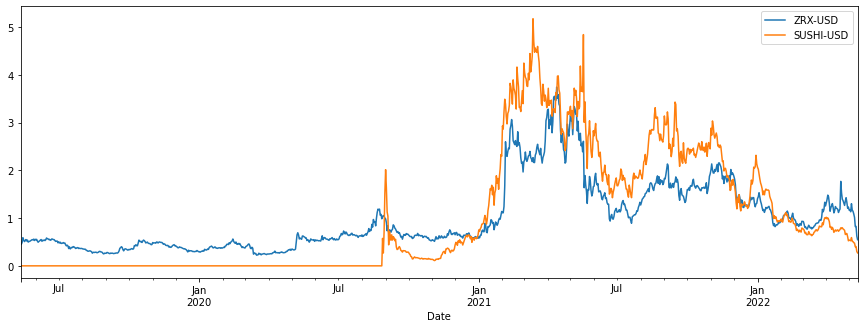

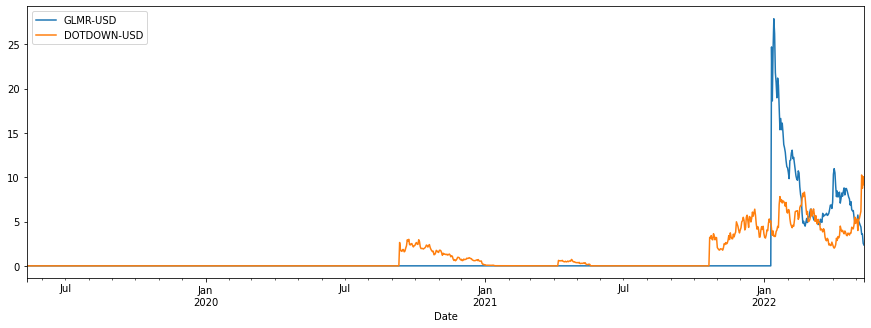

In [33]:
#plota gráfico de pares
def plotPairs(d2, par):
    (d2[par[0]]/np.mean(d2[par[0]])).plot()
    (d2[par[1]]/np.mean(d2[par[1]])).plot()
    plt.legend(par)
    plt.show()

for pair in pairs:
  plotPairs(portfolio_naoest, pair)

Calculo de Spread

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


19.977656315041262


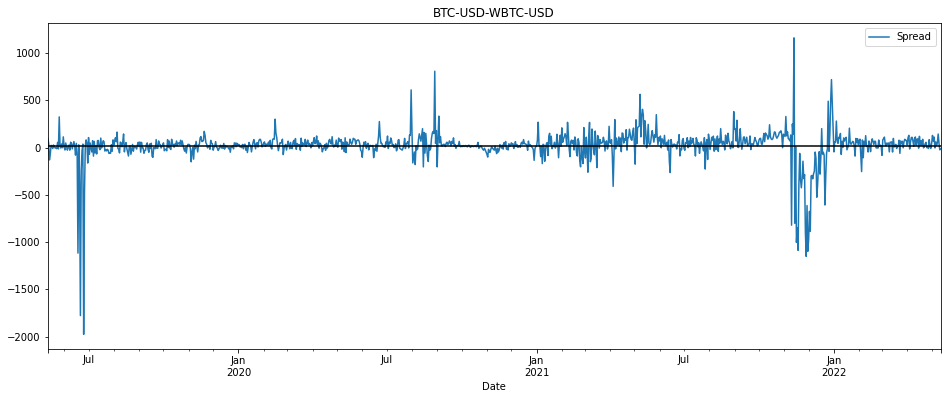

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.534444249779708


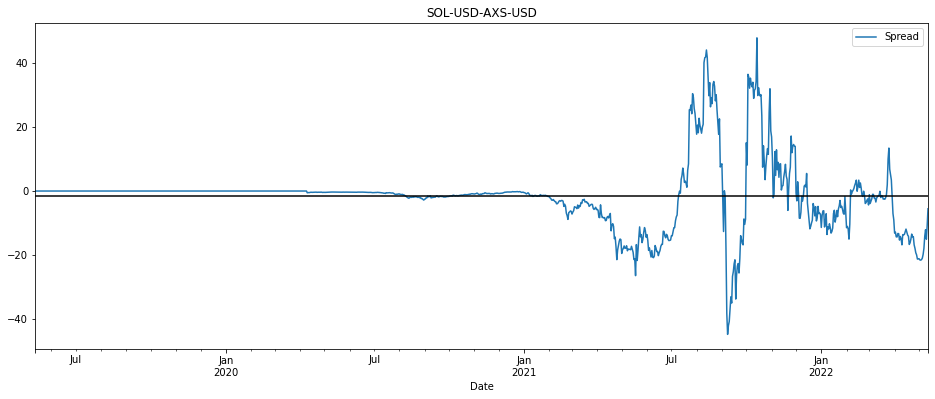

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.33567673145105975


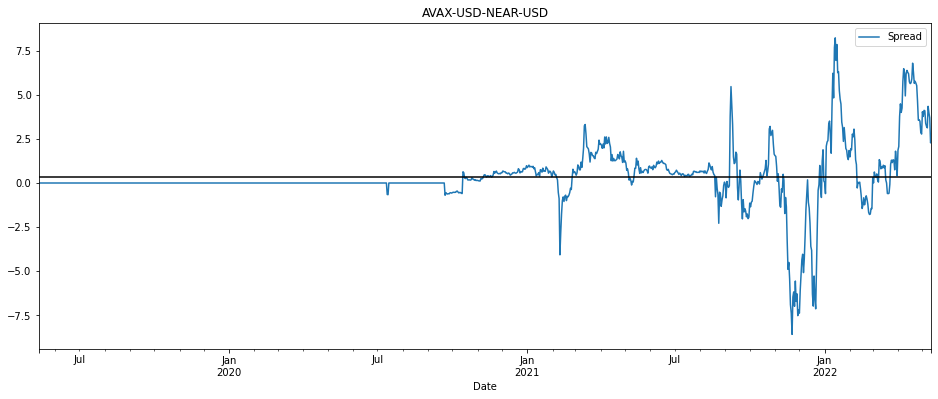

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.196810597340479


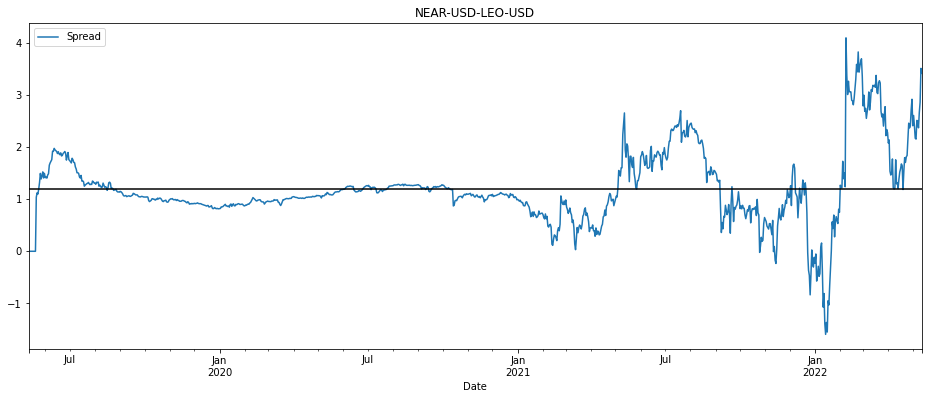

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.041685689781711964


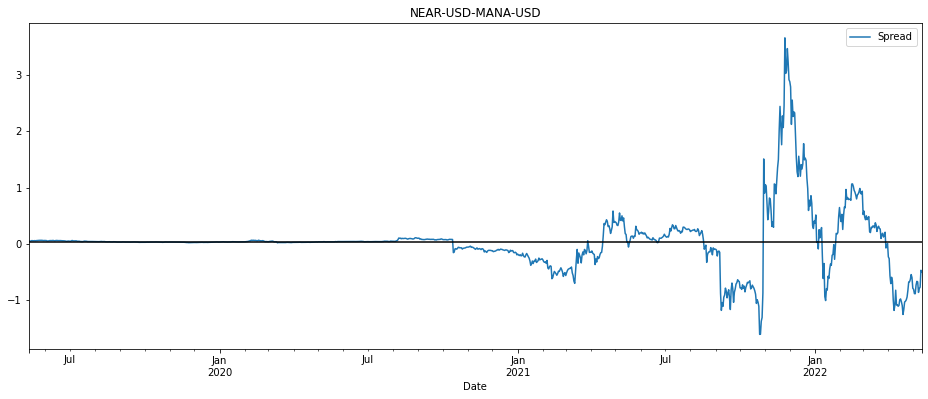

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.5262098341055297


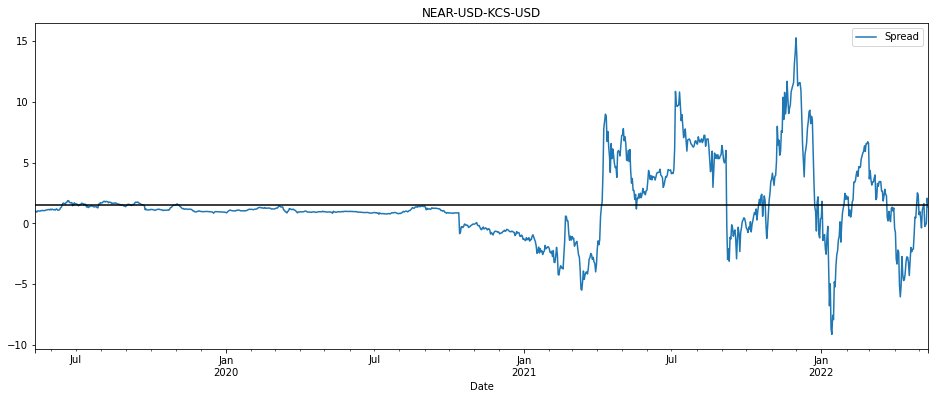

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


29.287741538721054


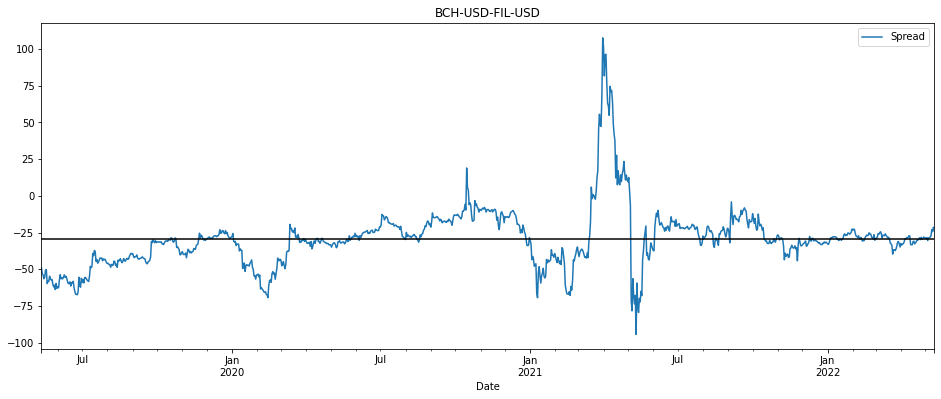

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.932852223998238


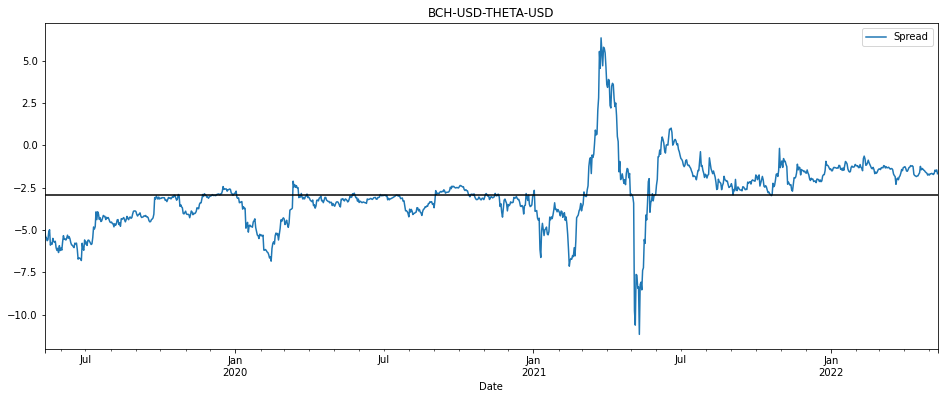

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


9.319680822244527


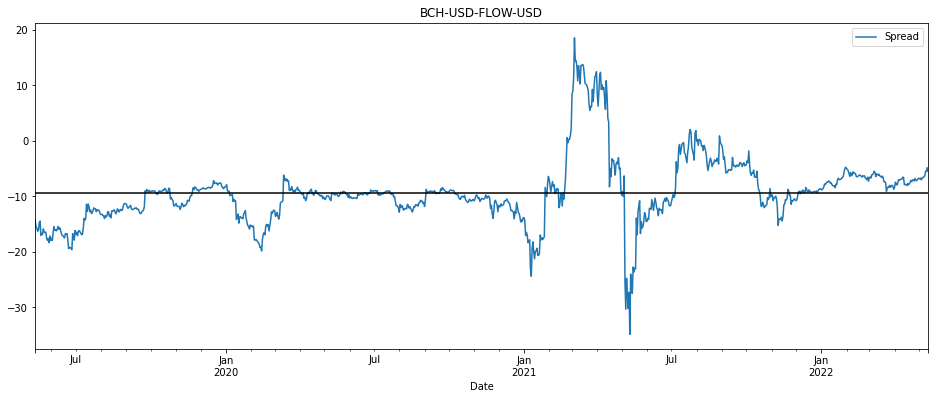

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


125.75953068399313


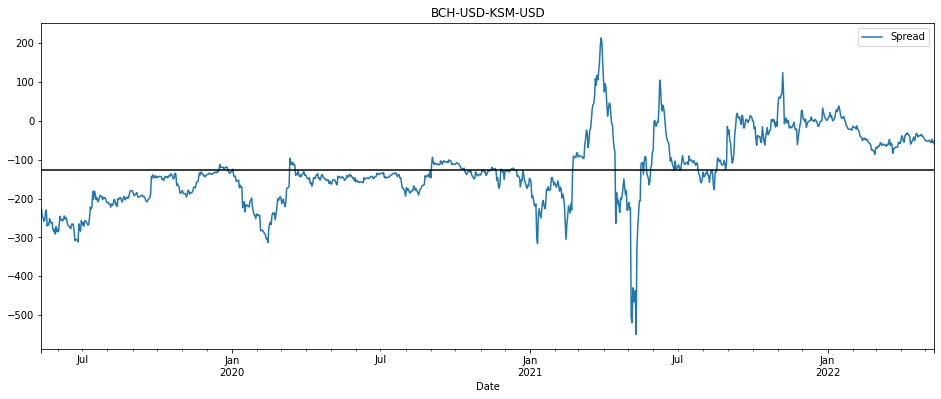

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


41.23145178169197


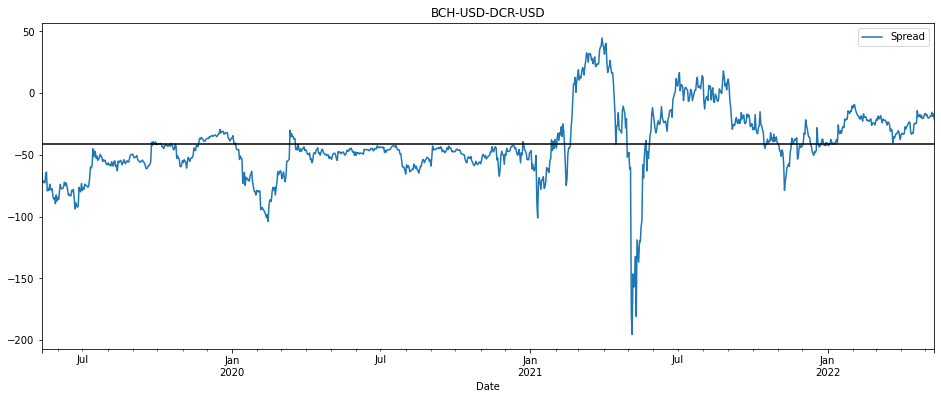

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


4.685262234188819


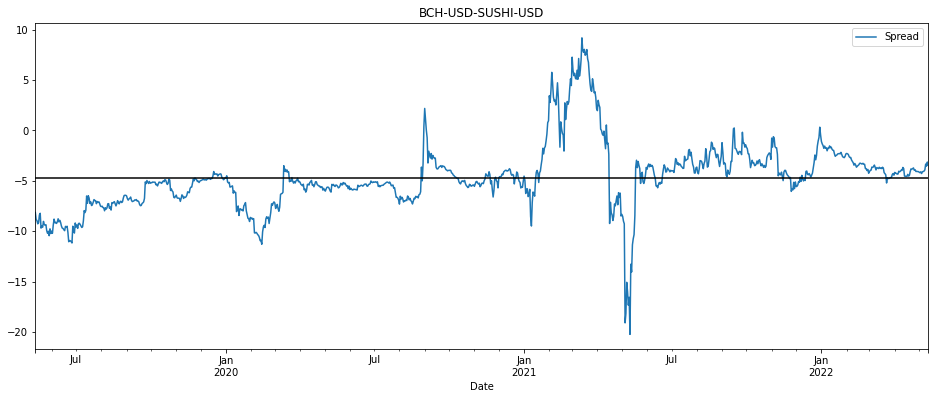

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.9082926180453911


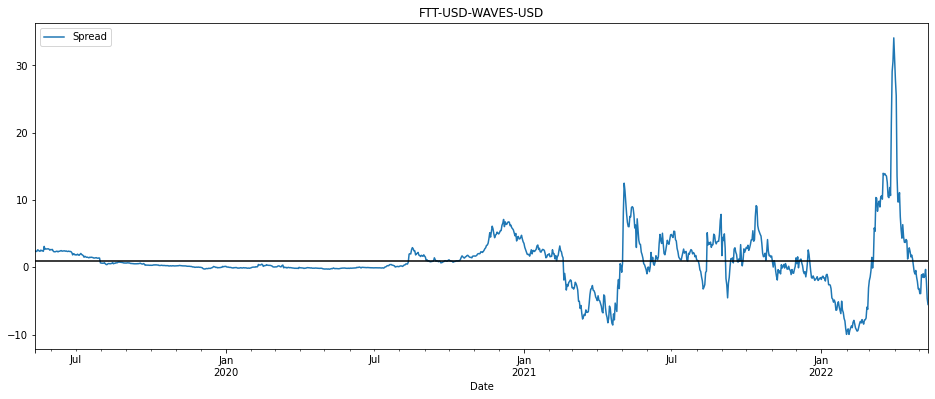

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


23.68637410844595


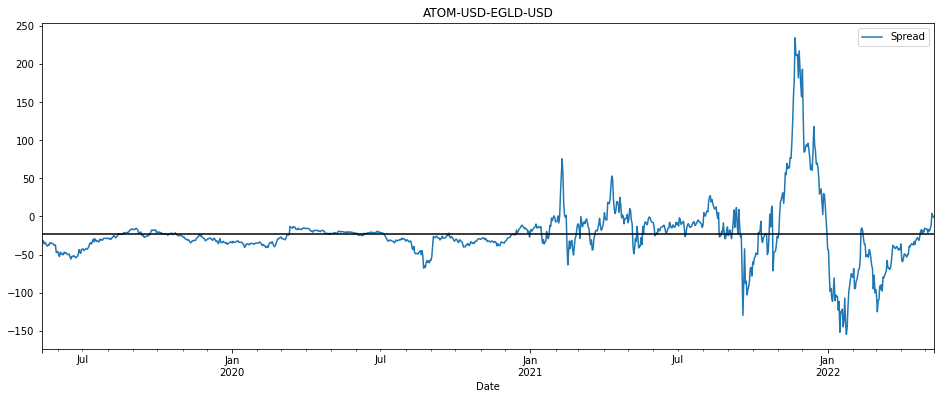

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.970416259857102


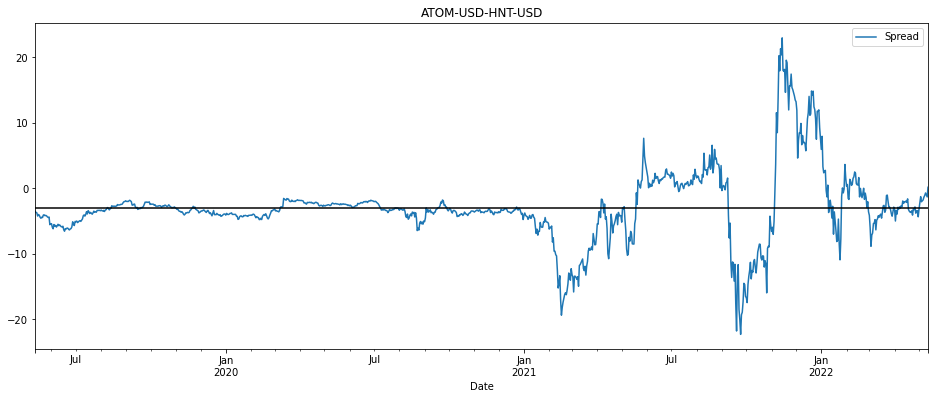

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.1855231425371793


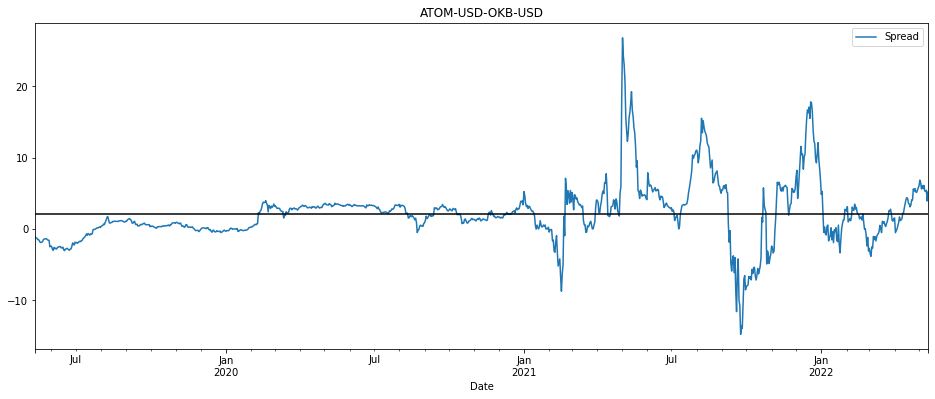

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.366685107095356


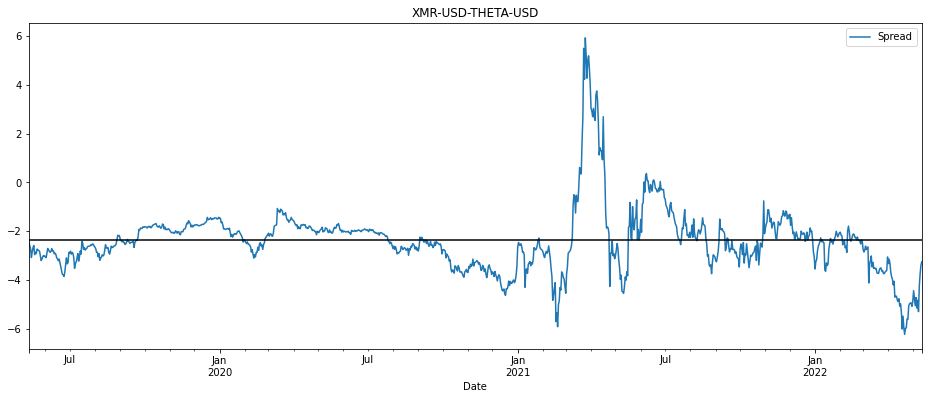

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


106.85178297981044


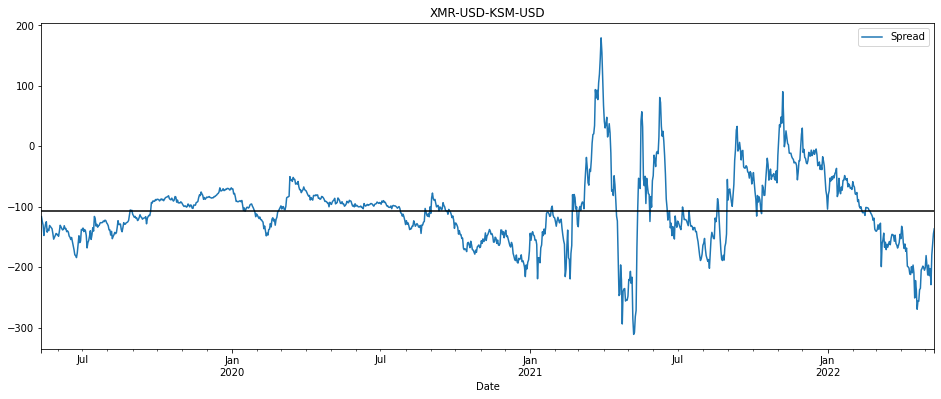

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.20414039150980992


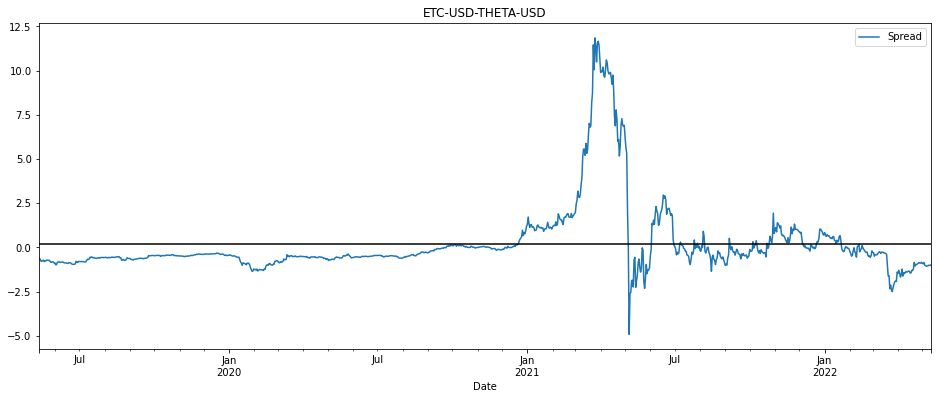

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


22.264113874474752


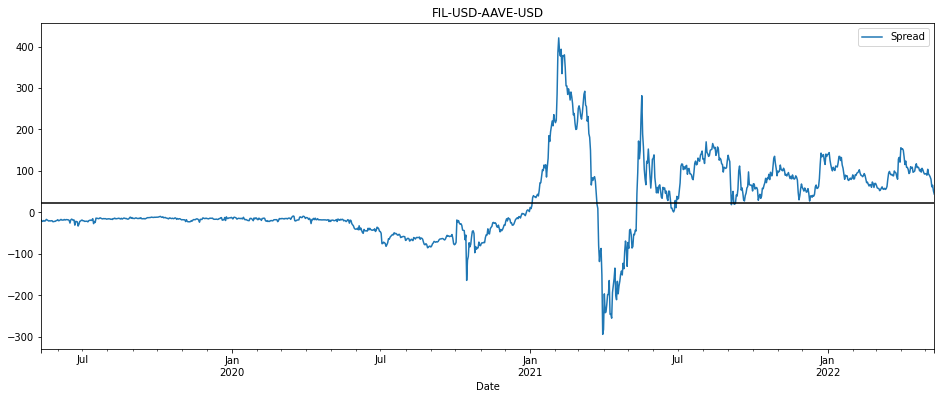

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.8585829249052809


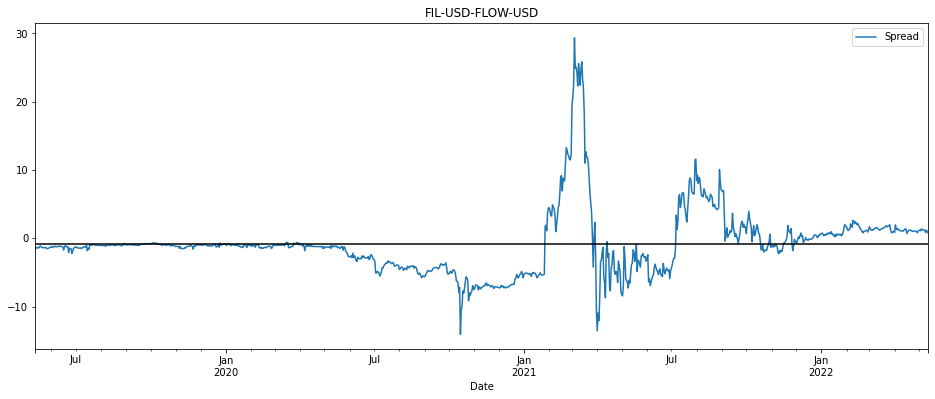

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


3.712429095593335


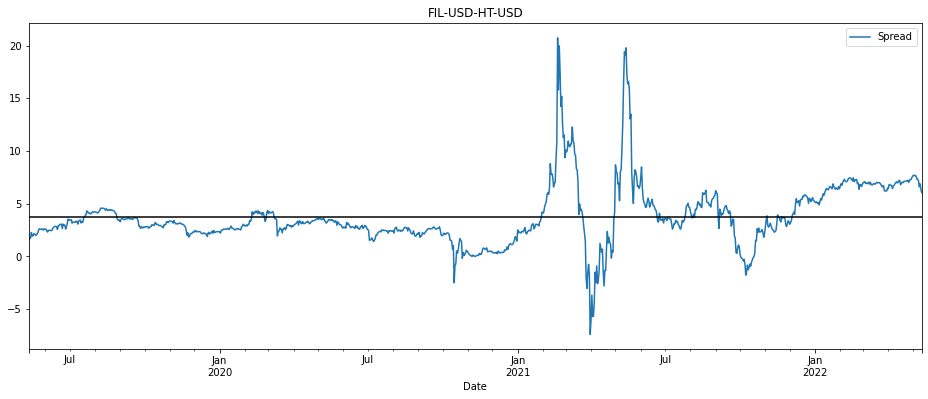

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


8.750234933981371


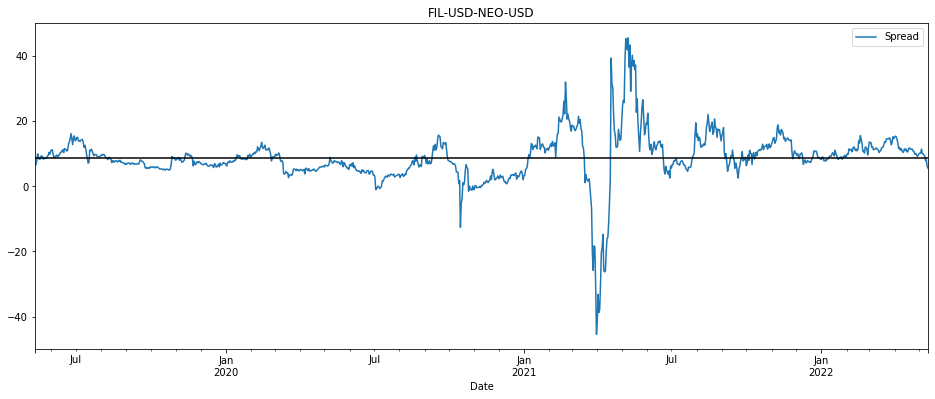

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


34.6028753776496


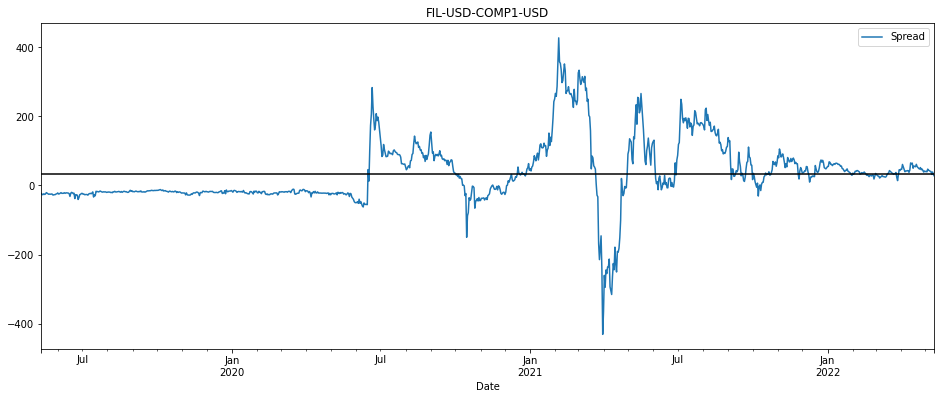

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.86611252599341


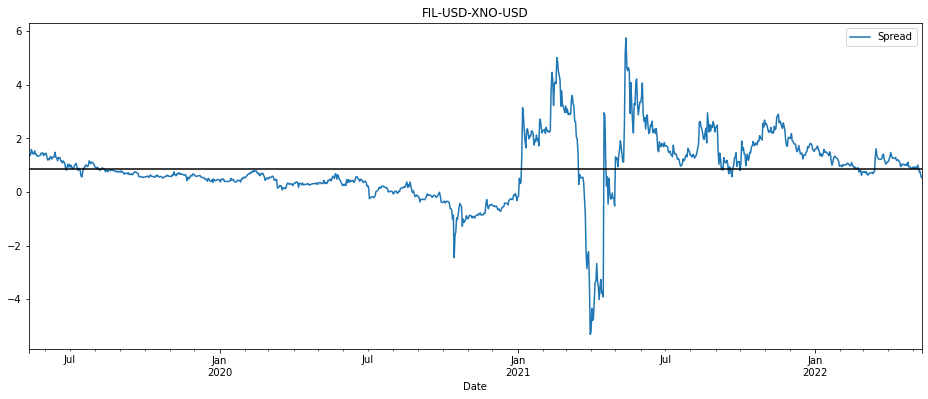

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


4.592906007688265


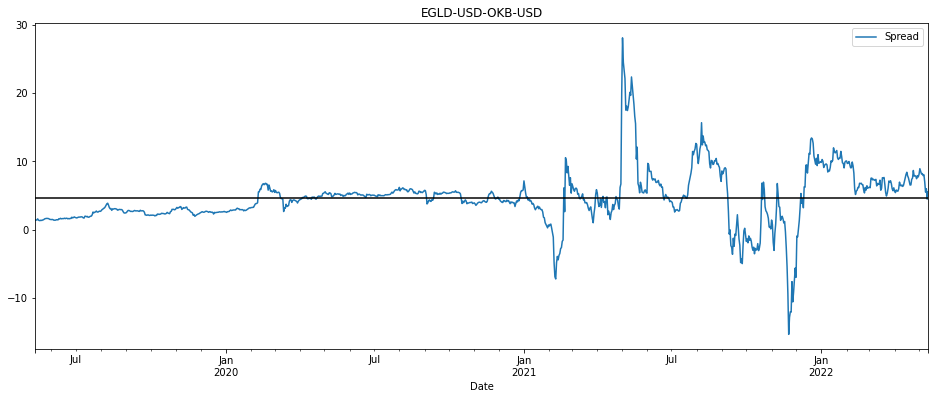

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.2429869635246886


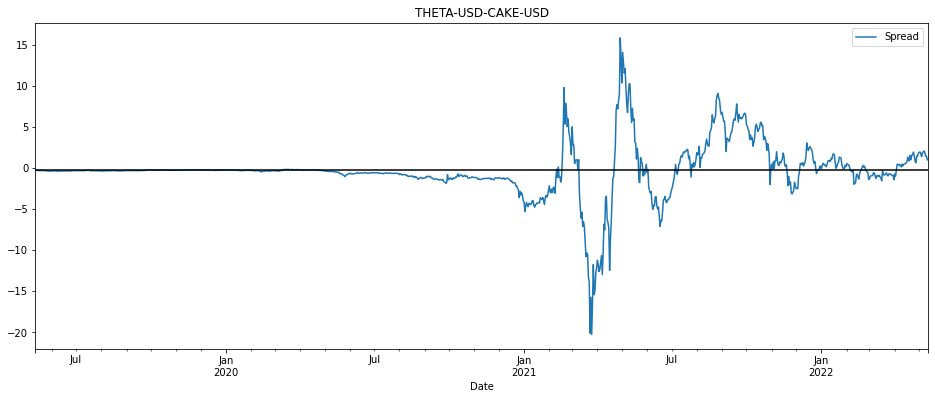

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.3550924625066357


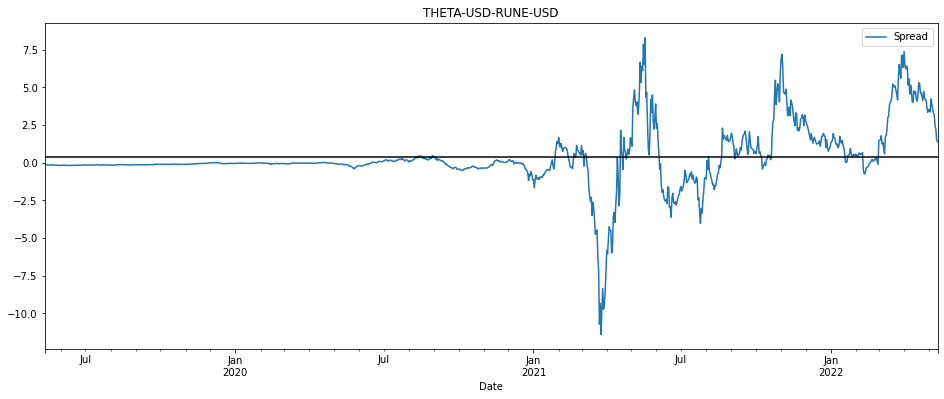

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


19.2623776772465


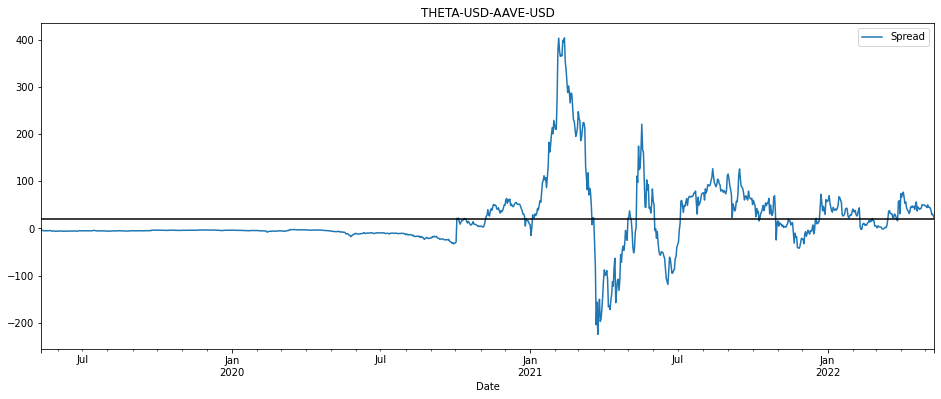

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


3.8220619483821006


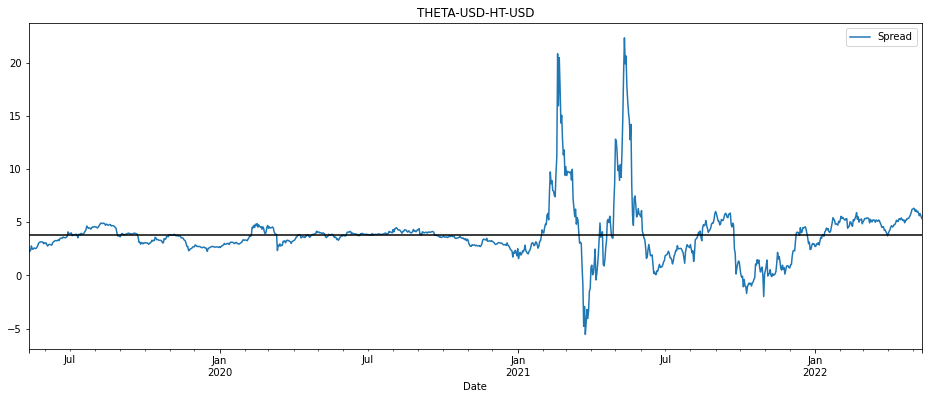

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


583.1255455707387


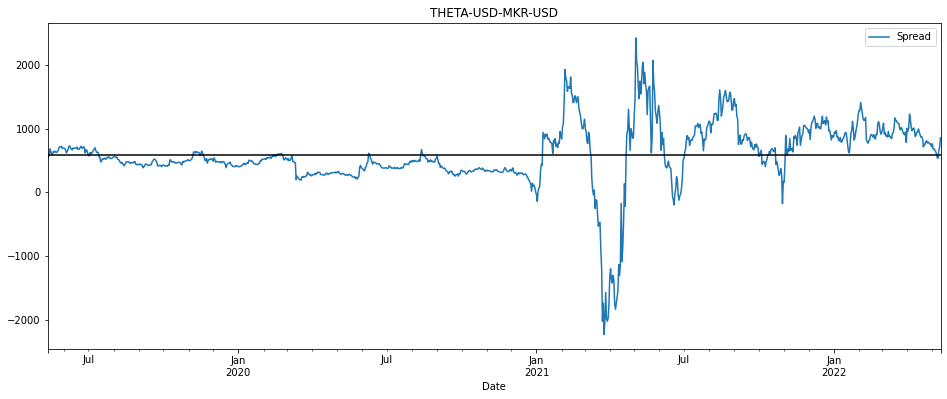

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


10.086175223236726


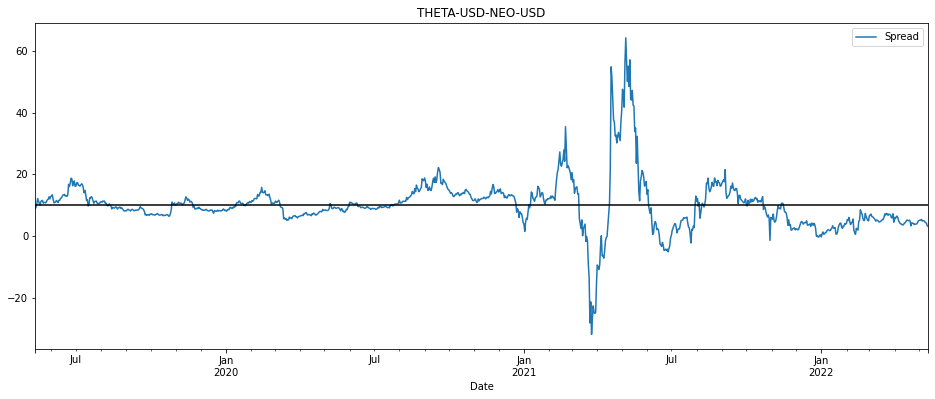

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


17.34733027868679


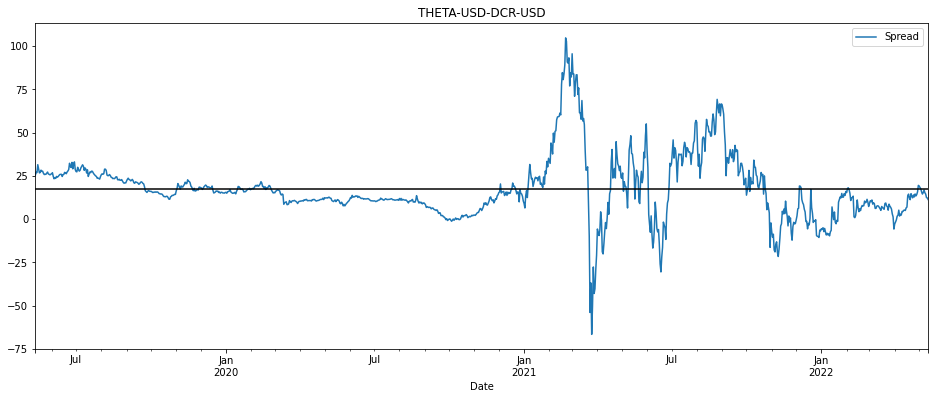

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


44.2144835102231


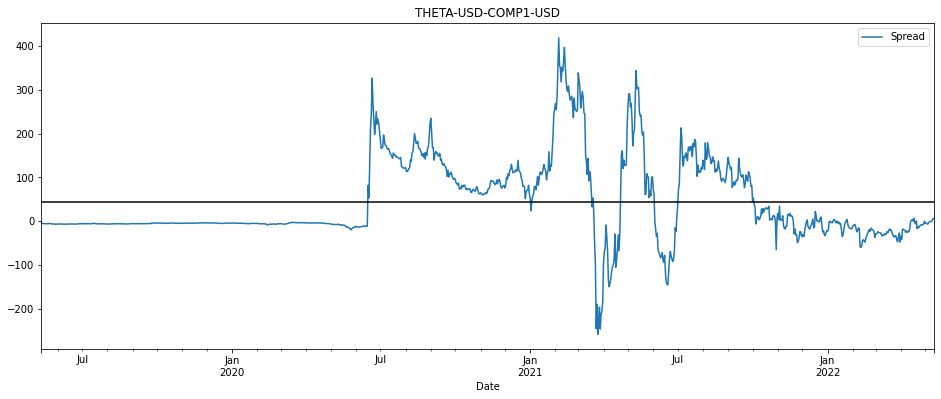

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.8791335753318653


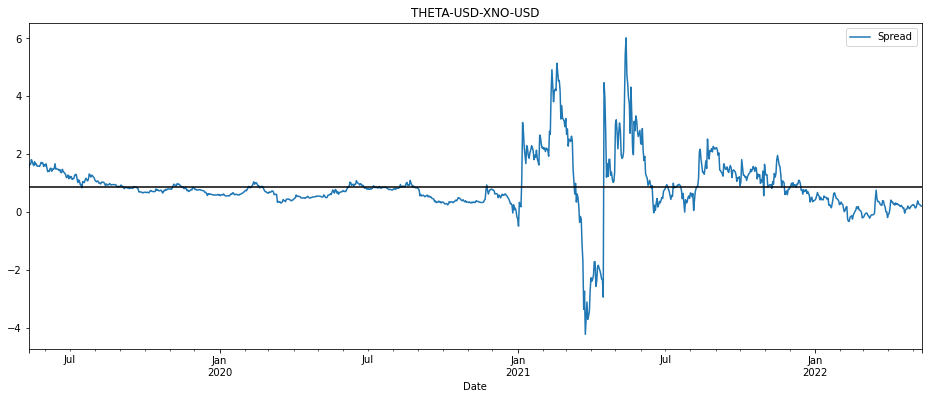

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


24.613890480997757


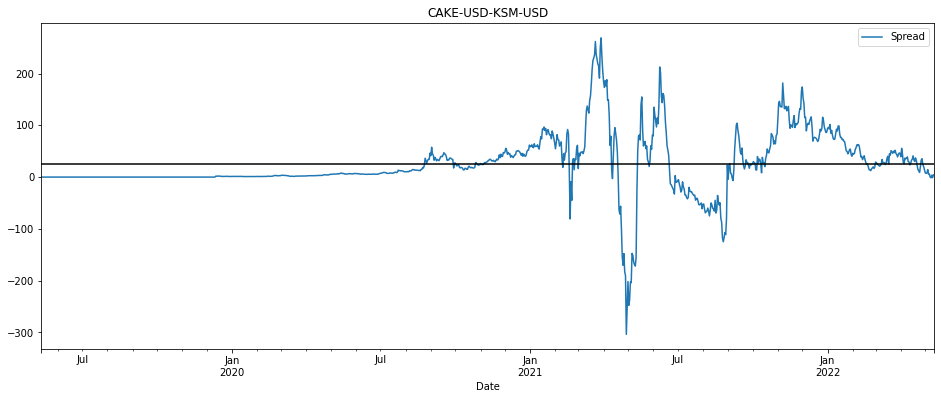

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


13.542246208150573


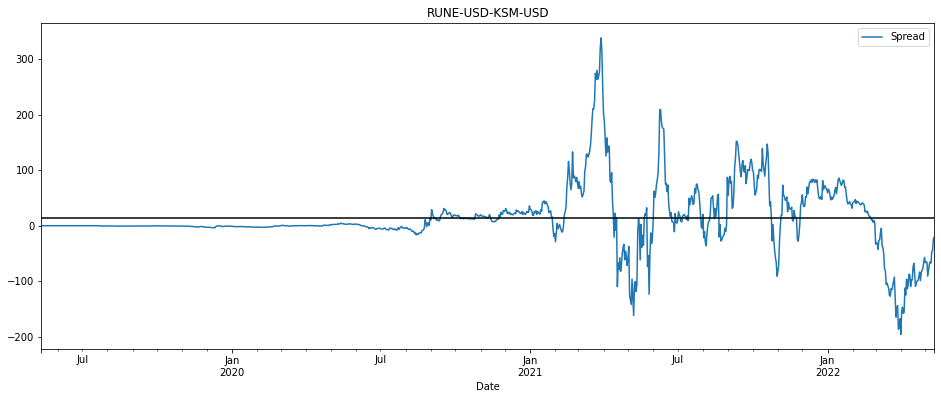

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.8831793736397189


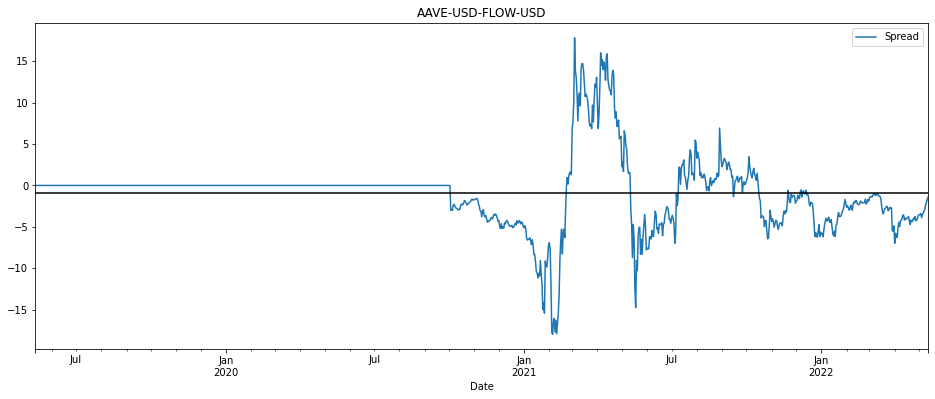

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.14018270252332155


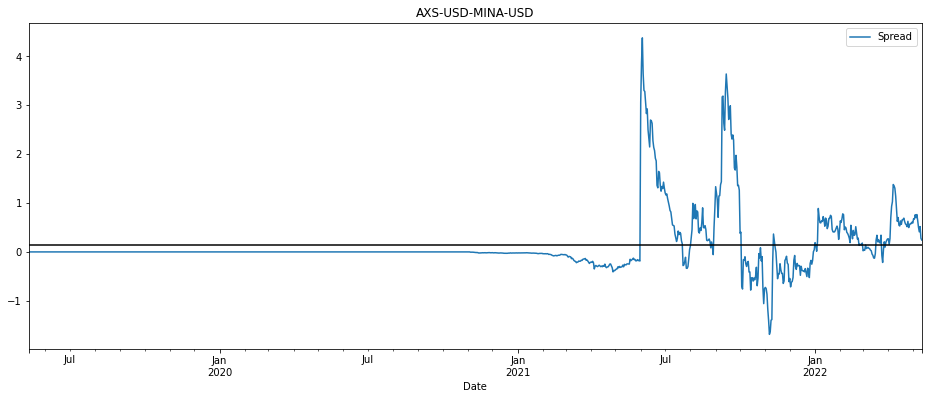

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


4.860543014384721


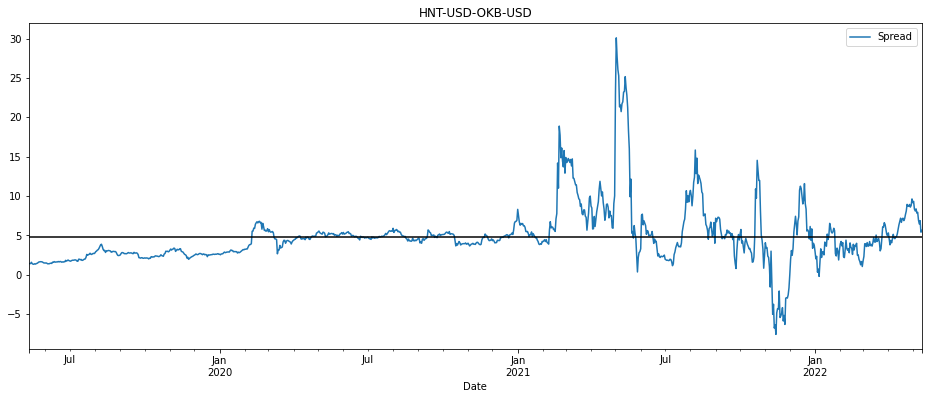

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


335.7623058457776


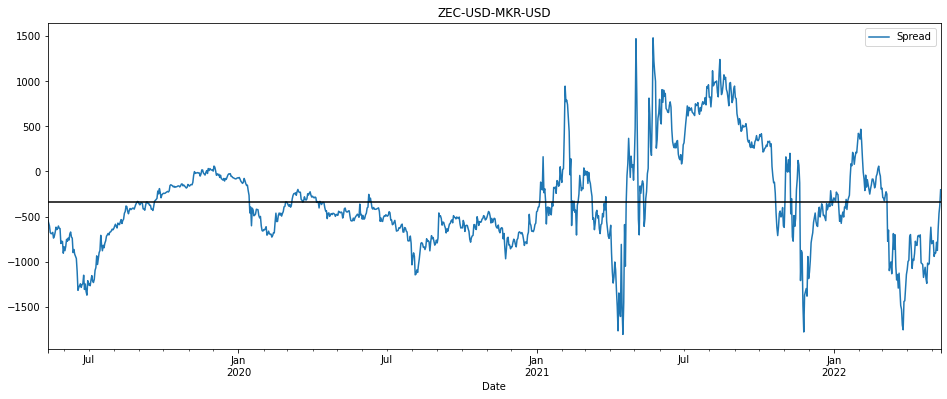

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.33668417852351035


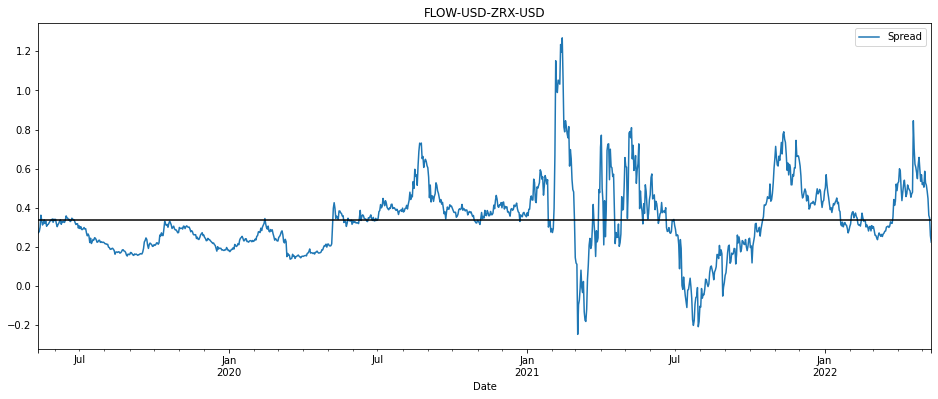

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.034363023176347


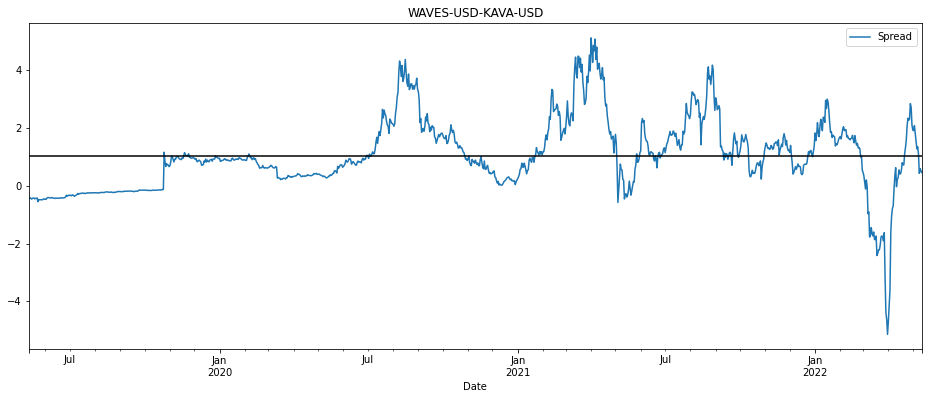

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.5955967460502543


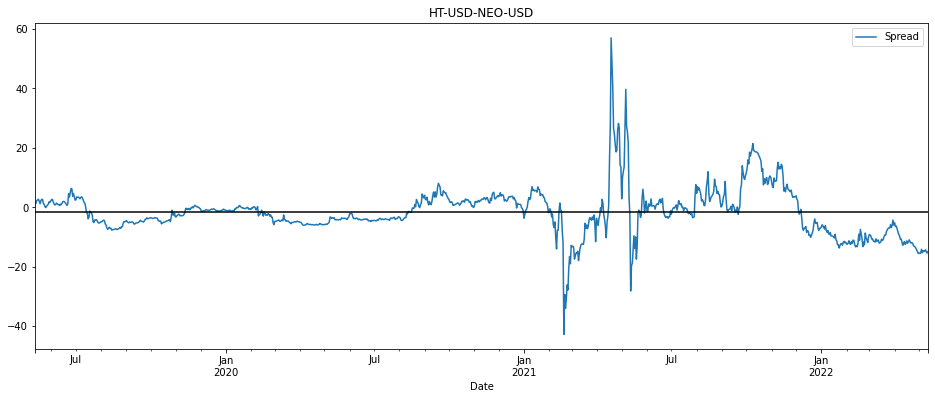

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


13.357144066716447


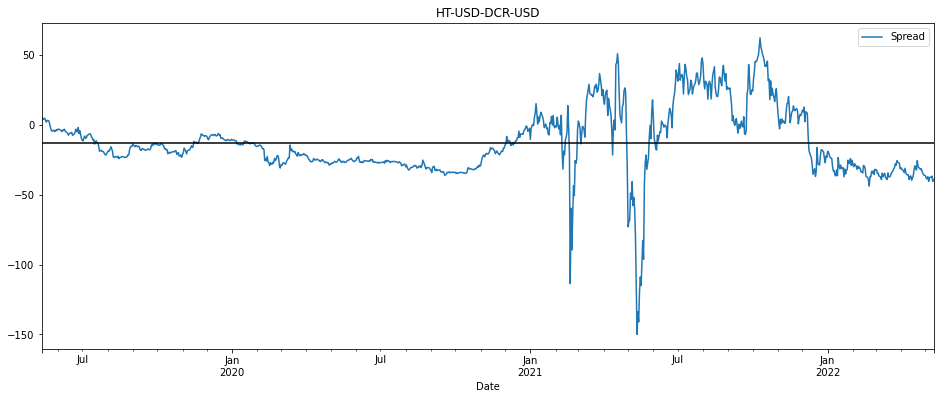

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.467919490364157


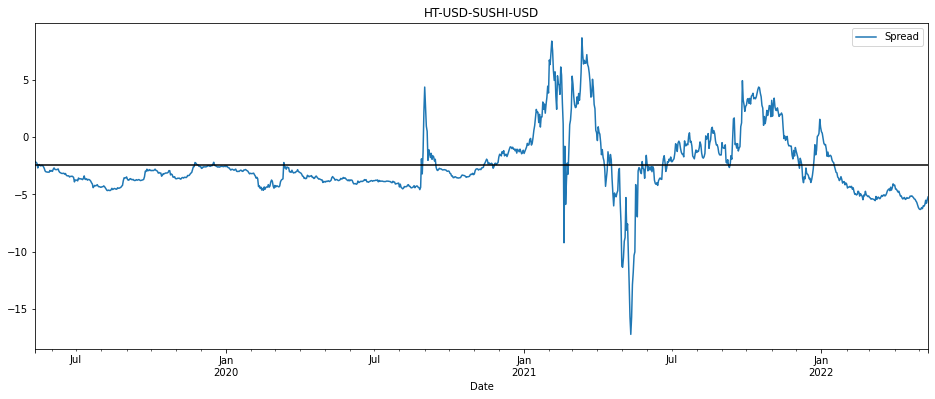

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


44.35528294068066


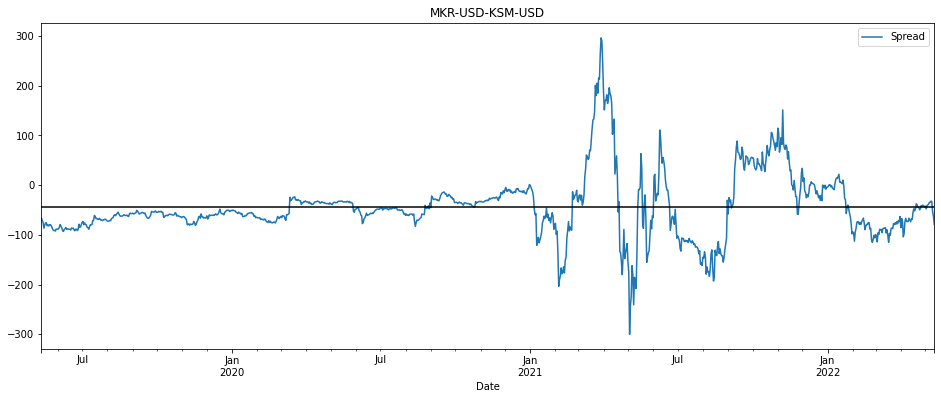

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


37.505955749917646


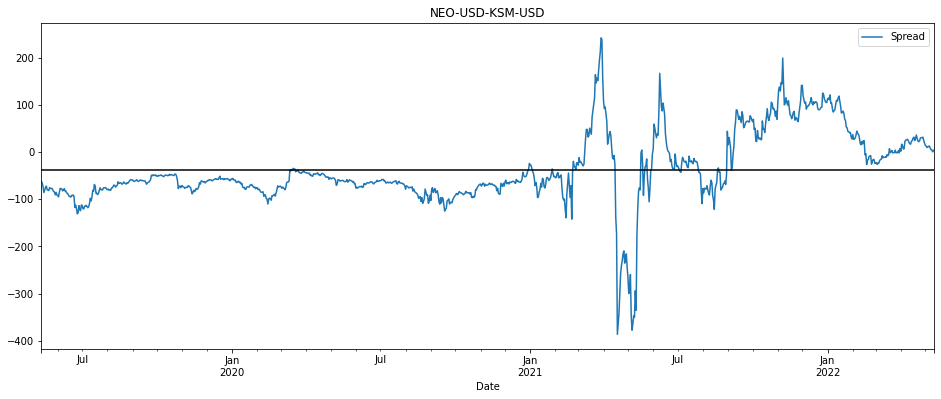

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


4.007656000162772


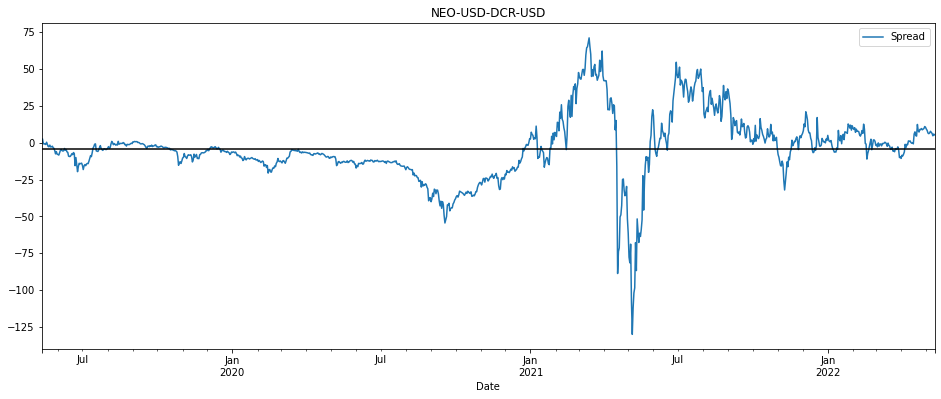

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


1.4006865019858123


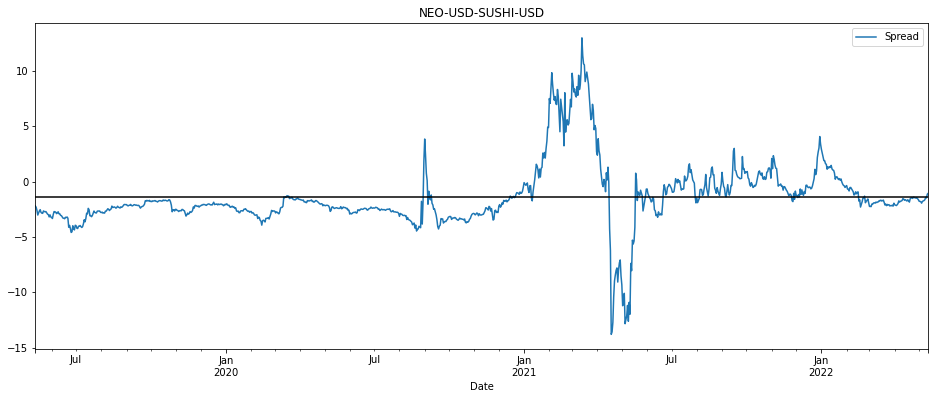

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.14729552393826792


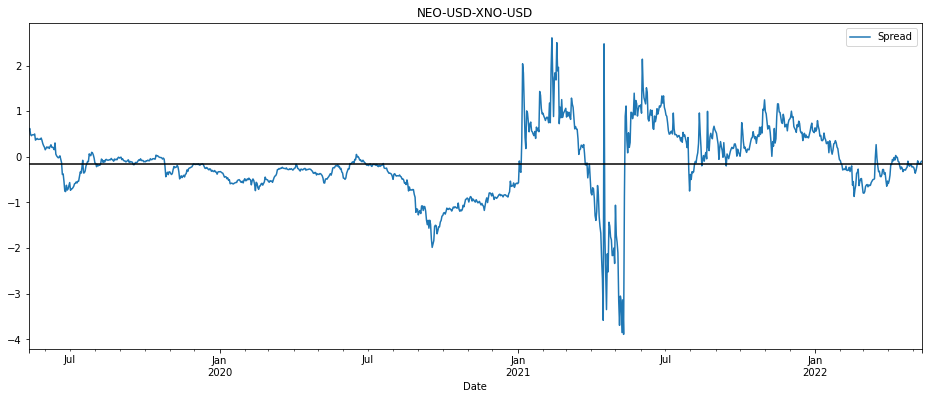

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.09719680112542152


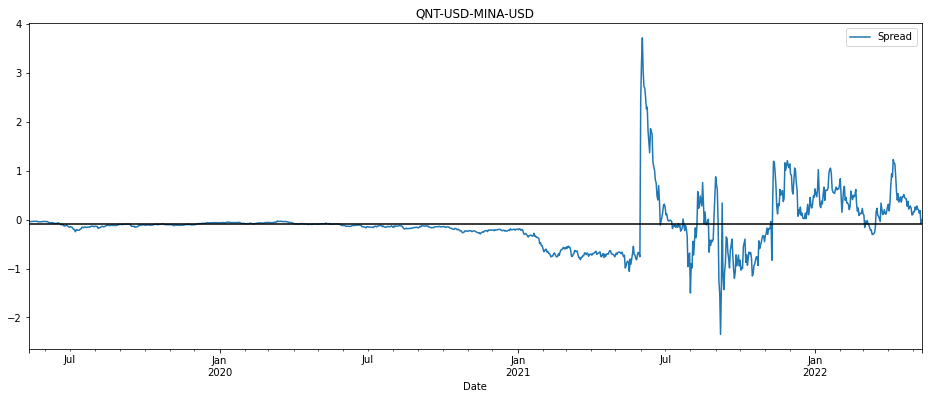

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


4.123642639564243


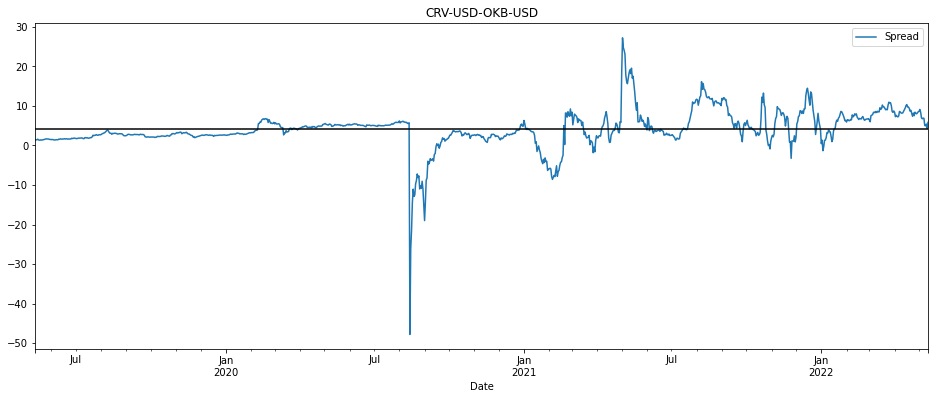

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.6814561324122806


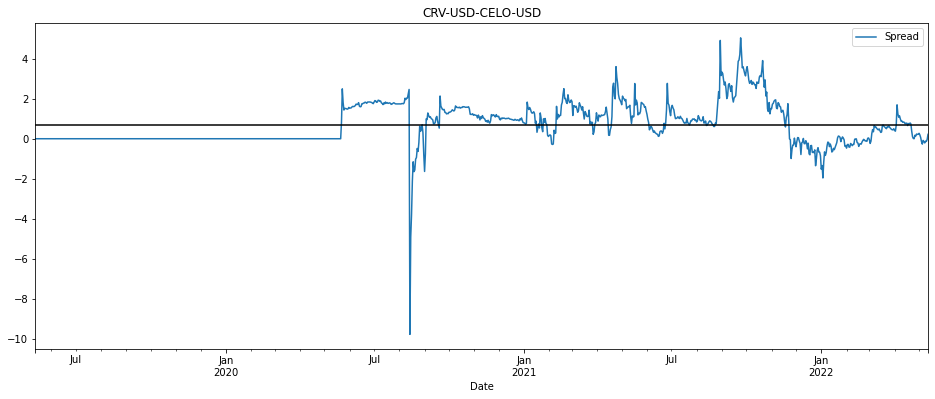

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.11427871749845454


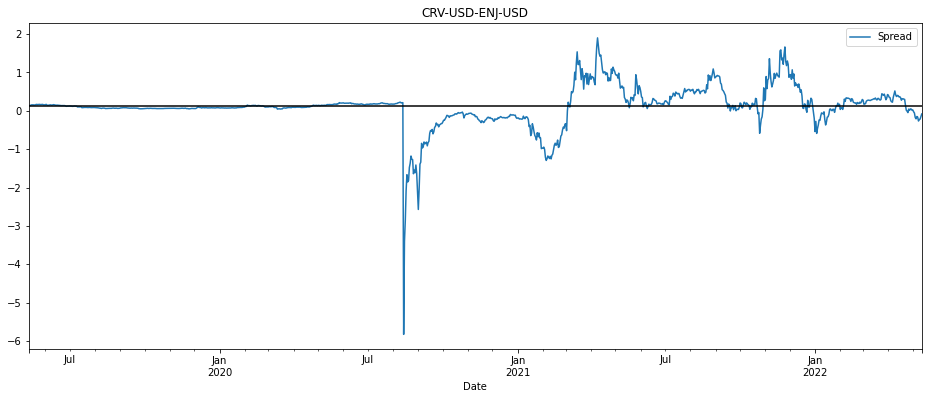

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.2359420349639391


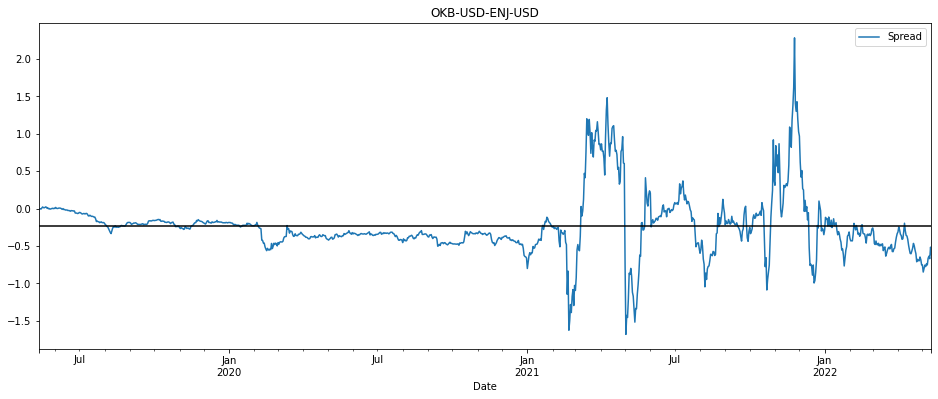

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


34.98120283879658


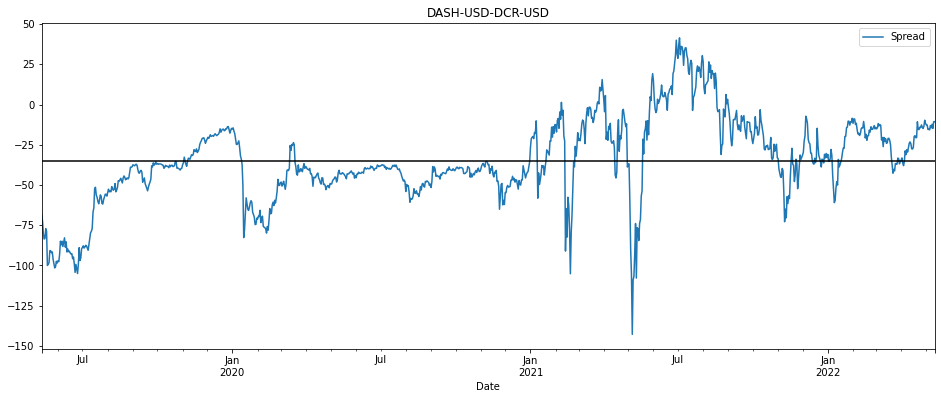

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


4.340135166306223


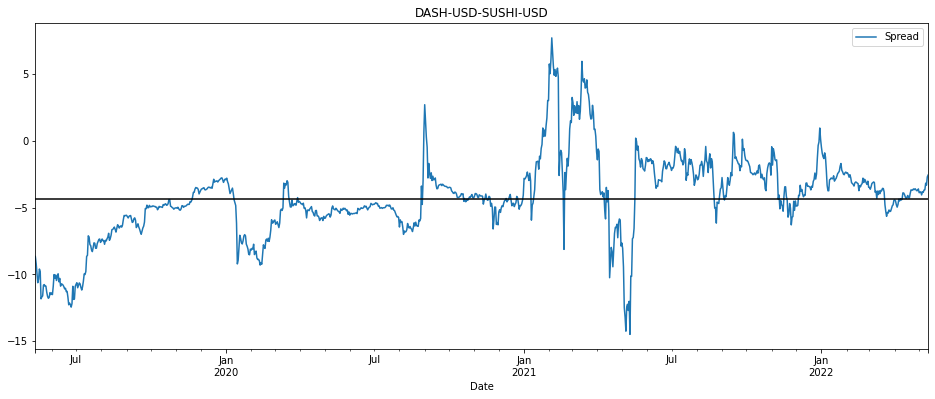

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.22113938327207835


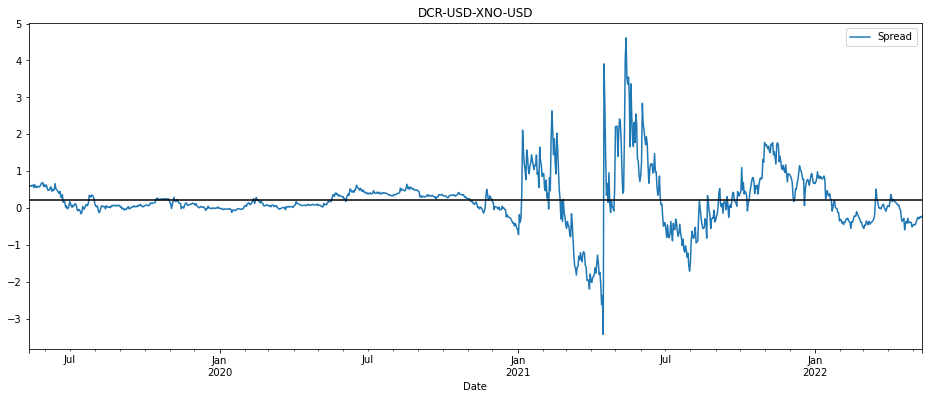

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.606945329485203


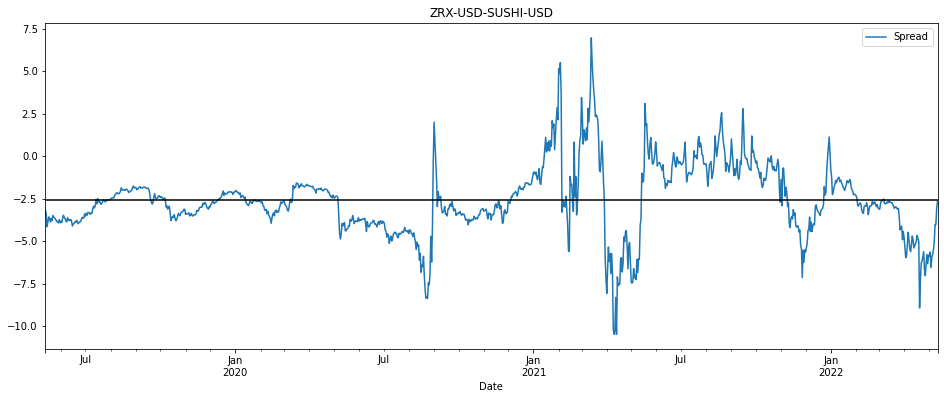

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.148856002208475


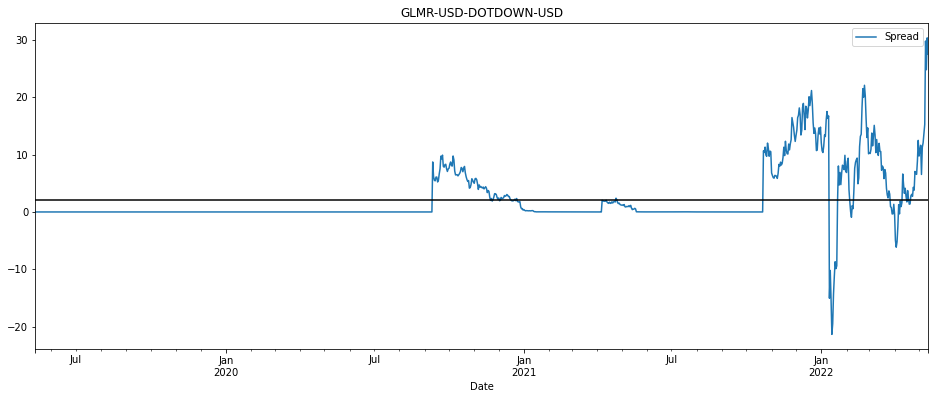

In [34]:
#plota gráficos dos Spread dos pares
def plotSpread(d2, p):
  S1 = d2[p[0]]
  S2 = d2[p[1]]
  S1 = sm.add_constant(S1)
  results = sm.OLS(S2, S1).fit()
  S1 = S1[p[0]]
  b = results.params[p[0]]

  spread = S2 - b * S1
  spread.plot(figsize=(16,6))
  plt.axhline(spread.mean(), color='black')
  plt.legend(['Spread']);
  medSpread= spread.mean()
  plt.title(str(p[0])+'-'+str(p[1]))
  print(abs(medSpread)) 
  
   
  
  plt.show() 


for pair in pairs:
  plotSpread(portfolio_naoest, pair)

In [35]:
  S1 = portfolio_naoest[pair[0]]
  S2 = portfolio_naoest[pair[1]]
  S1 = sm.add_constant(S1)
  results = sm.OLS(S2, S1).fit()
  S1 = S1[pair[0]]
  b = results.params[pair[0]]

  spread = S2 - b * S1
  medSpread= spread.mean()
  #medSpread
  abs(medSpread)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.148856002208475

Calculando o Ratio

P-valor = 4.250859349590858e-06
Score = 5.803772565962519
Ratios = 1.0001472273163488


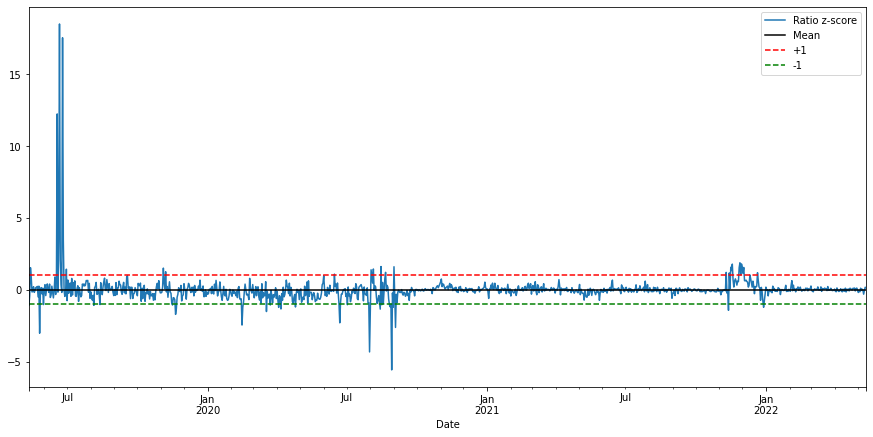

P-valor = 1.1715808571220797e-06
Score = 6.065402005129621
Ratios = inf


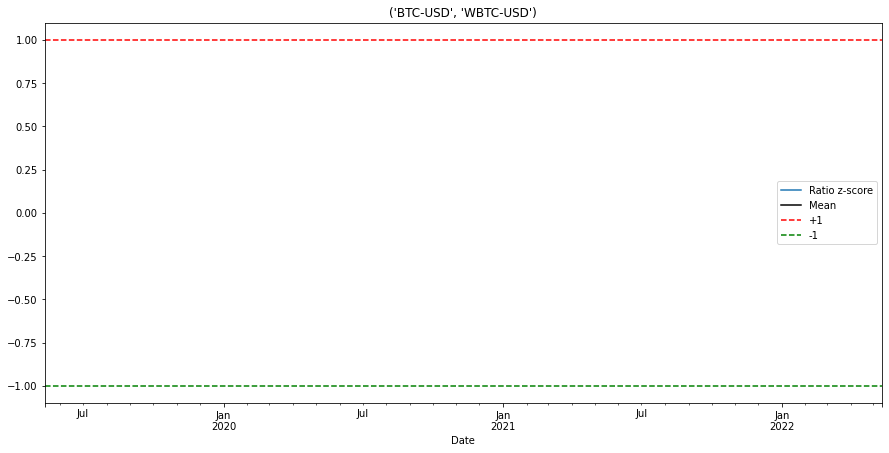

P-valor = 0.00033603807055371764
Score = 4.828500254874102
Ratios = inf


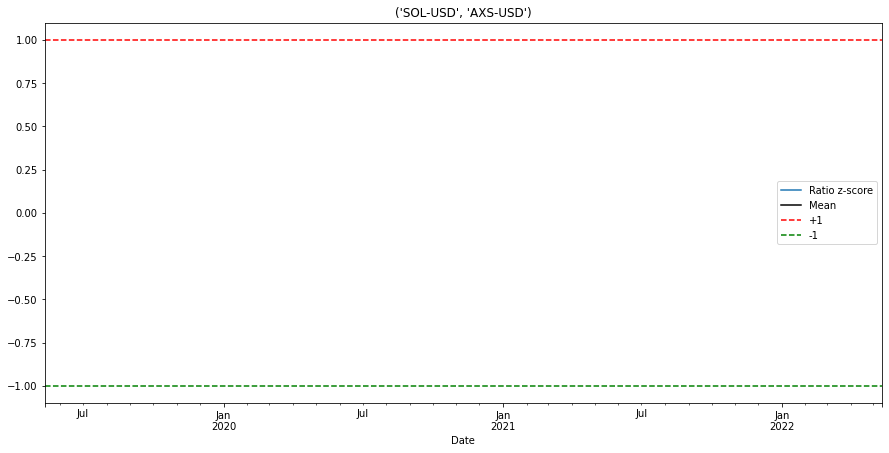

P-valor = 9.983673546730725e-05
Score = 5.116812541065178
Ratios = 1.0785066470648008


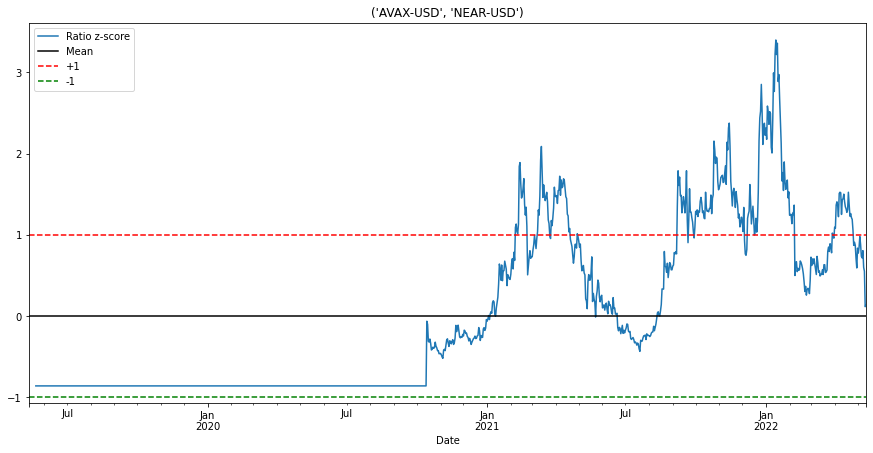

P-valor = 3.844333446582097e-05
Score = 5.332848406811522
Ratios = 3.859261412062791


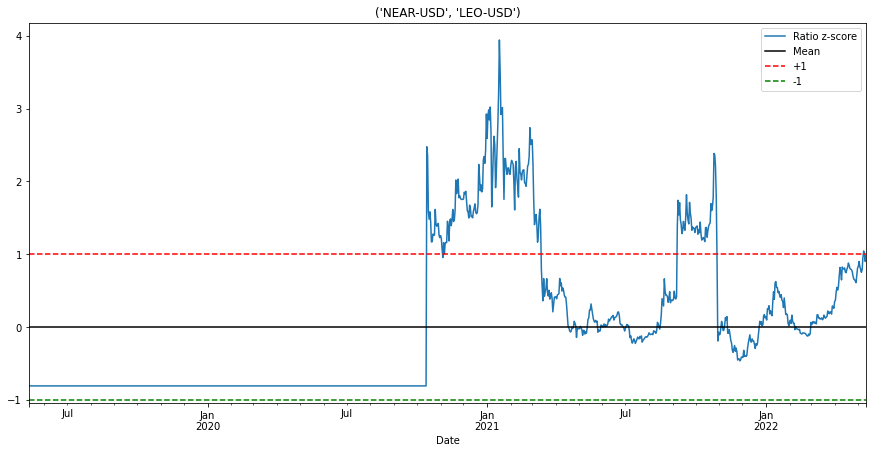

P-valor = 1.767152628705992e-05
Score = 5.503025502089743
Ratios = 0.3978974351240286


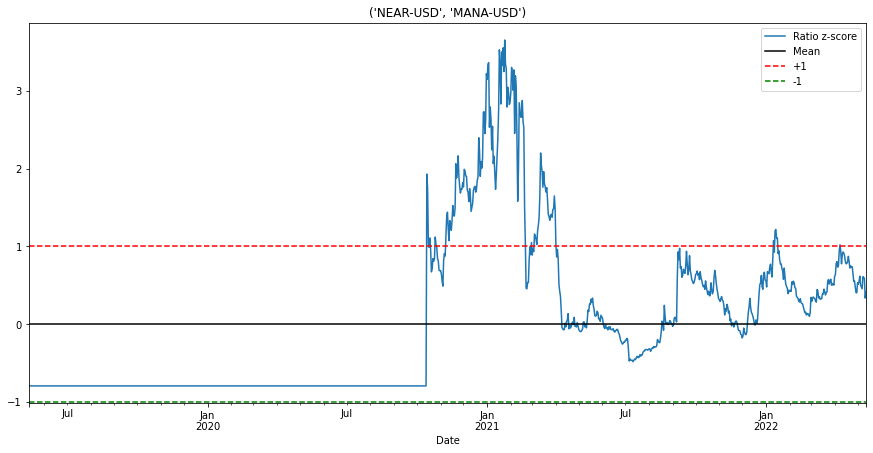

P-valor = 8.329951926322036e-05
Score = 5.158464504272326
Ratios = 30.363564149960773


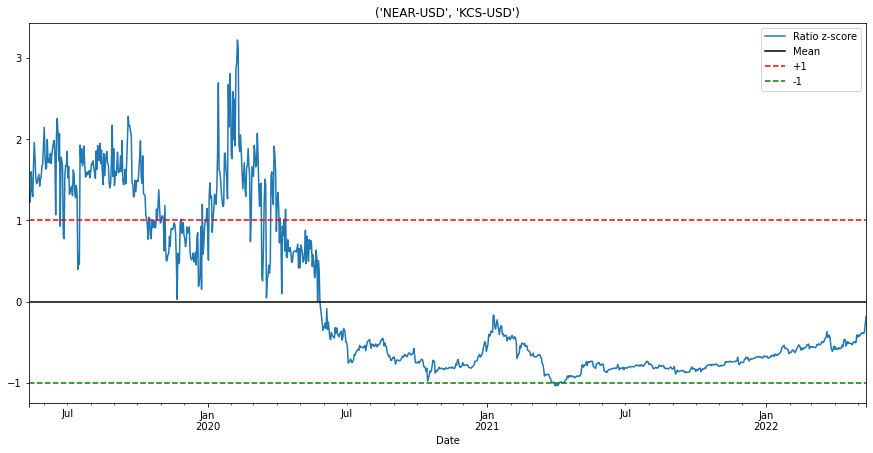

P-valor = 1.4729779609589246e-05
Score = 5.542225308408746
Ratios = 1121.4682211800955


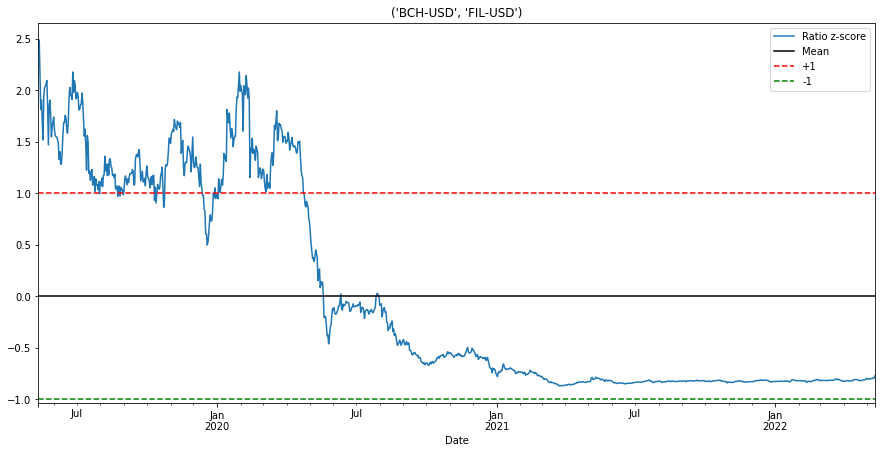

P-valor = 0.0004803838208456126
Score = 4.740180406165259
Ratios = inf


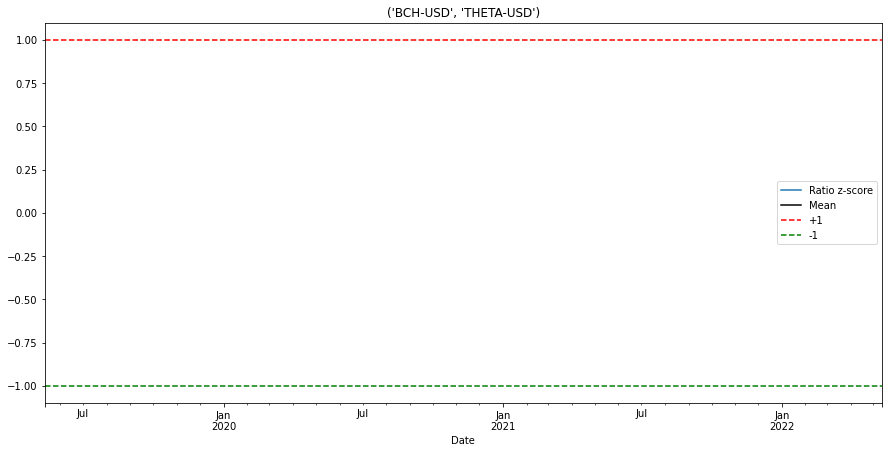

P-valor = 0.0006384804292445176
Score = 4.668593109834537
Ratios = inf


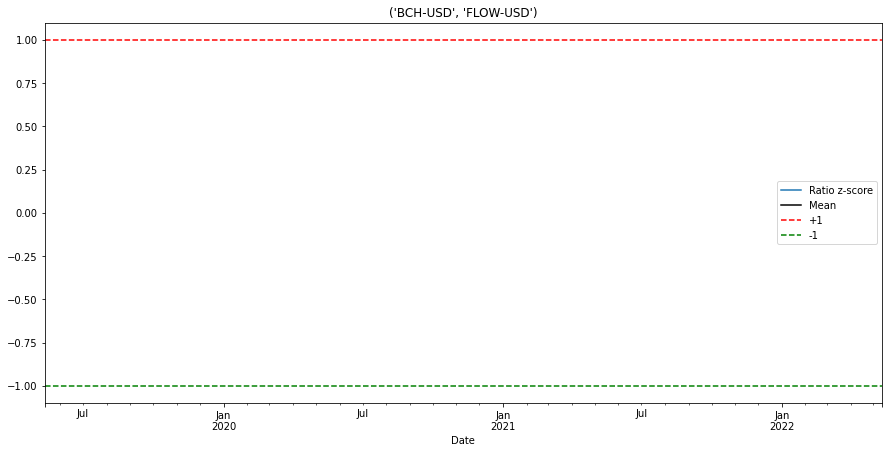

P-valor = 0.0002021238402146581
Score = 4.951315621627066
Ratios = 10.662144797018534


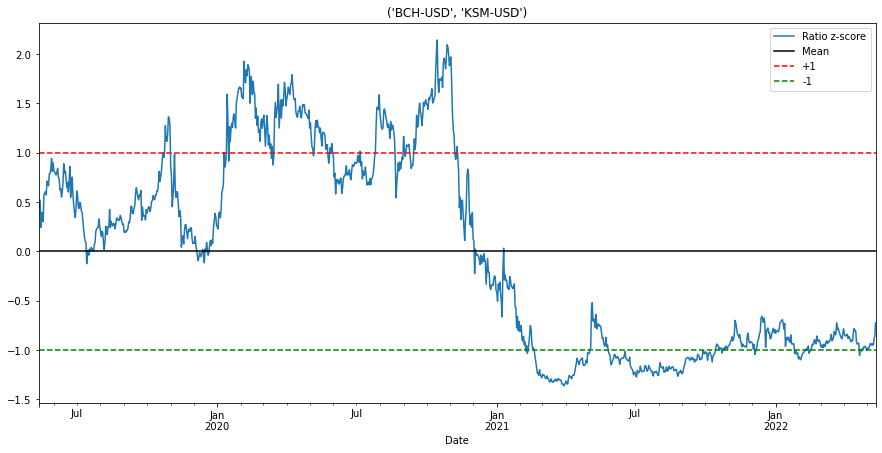

P-valor = 0.00023498805289285033
Score = 4.915245497302536
Ratios = inf


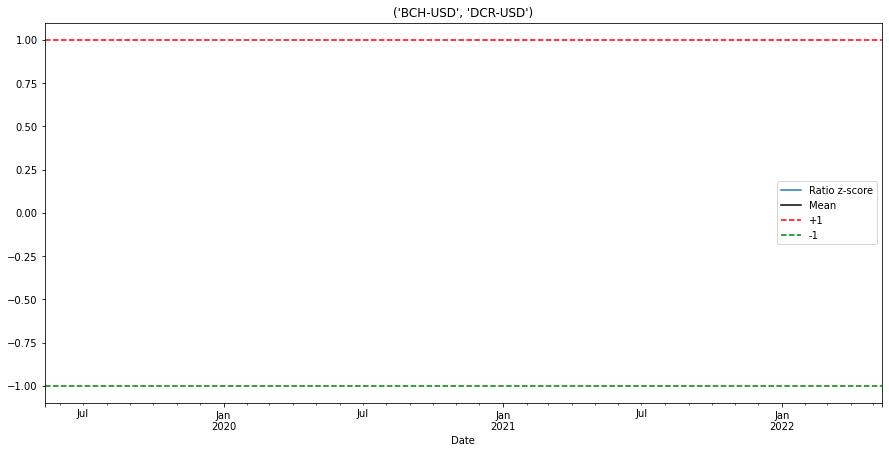

P-valor = 0.0006398345359419918
Score = 4.668055586336478
Ratios = 1.993514532244911


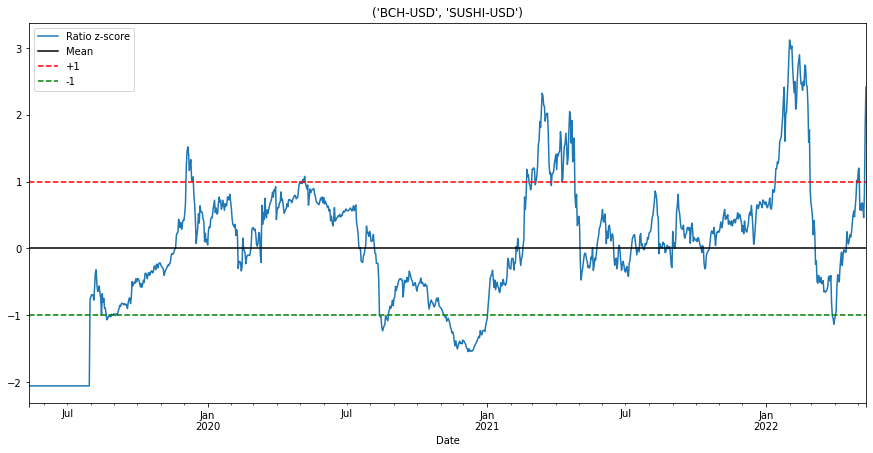

P-valor = 0.000957933307841223
Score = 4.564396692038997
Ratios = inf


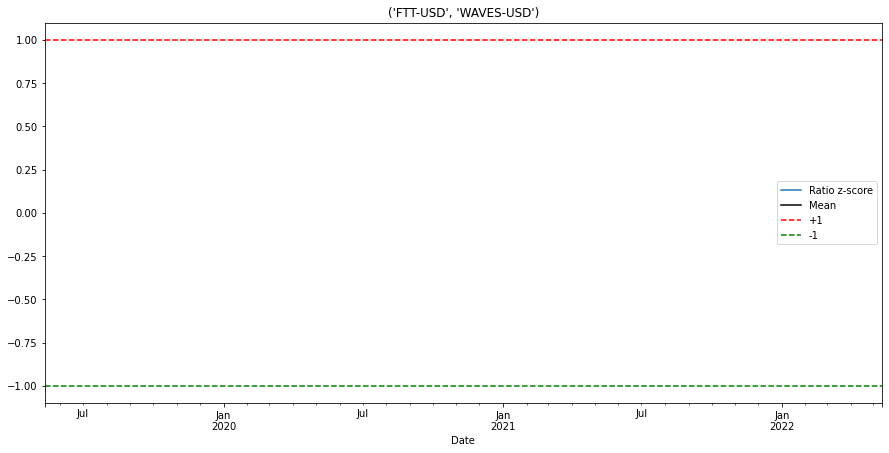

P-valor = 0.0004775683707050205
Score = 4.741647229331731
Ratios = inf


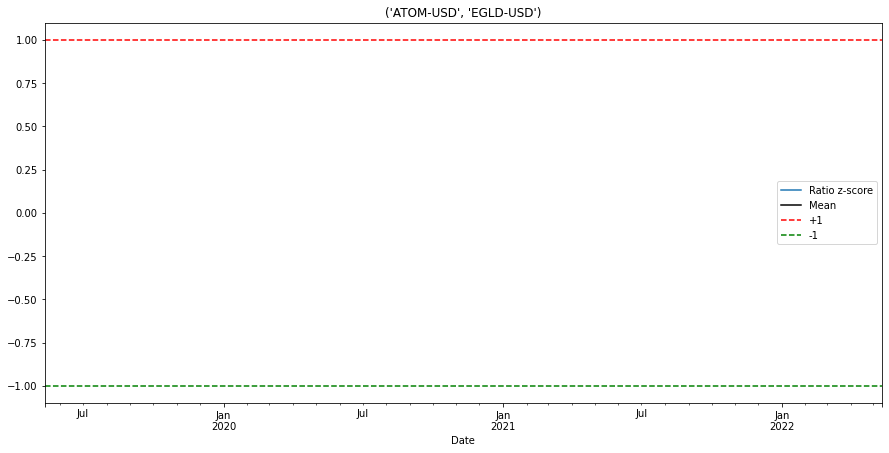

P-valor = 0.00016926102007923177
Score = 4.993461111035296
Ratios = 1.2479207423335663


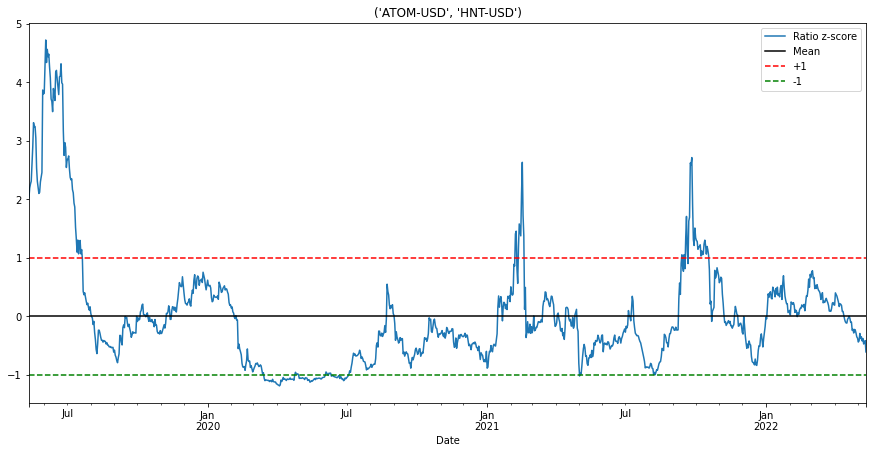

P-valor = 2.472123956381561e-06
Score = 5.914896341459895
Ratios = 283.9789006830945


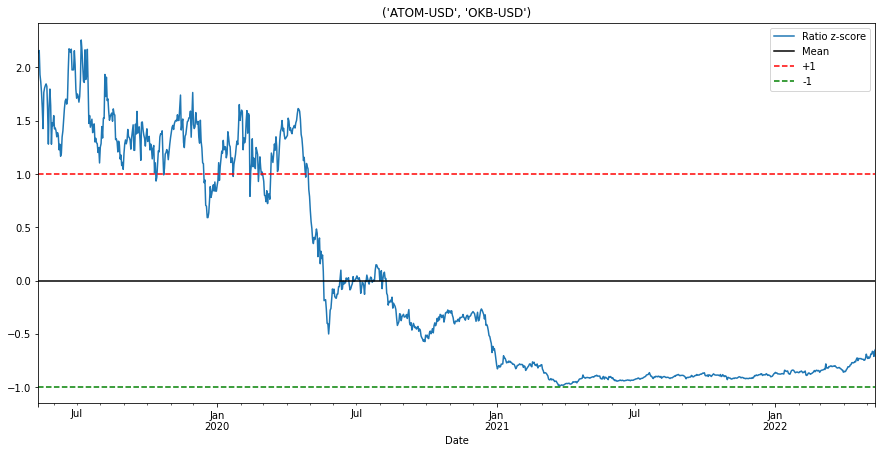

P-valor = 0.0008032949981864078
Score = 4.609933200917702
Ratios = inf


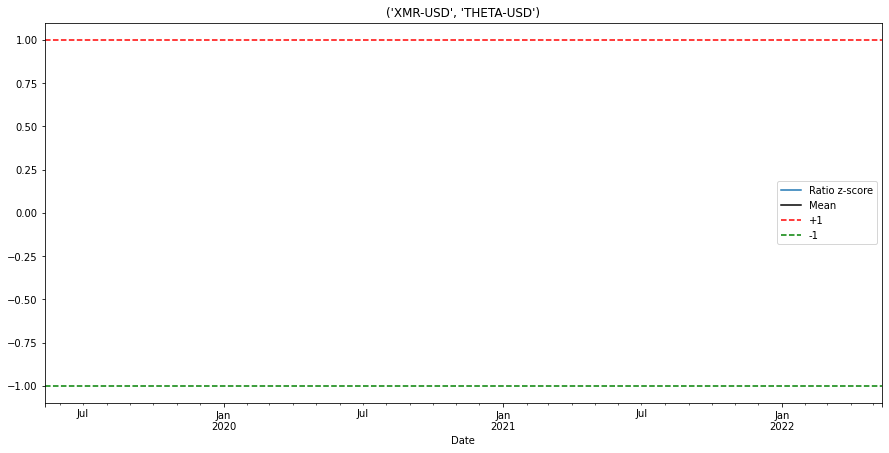

P-valor = 0.0008914500085220543
Score = 4.5830614967121726
Ratios = 26.74693425276416


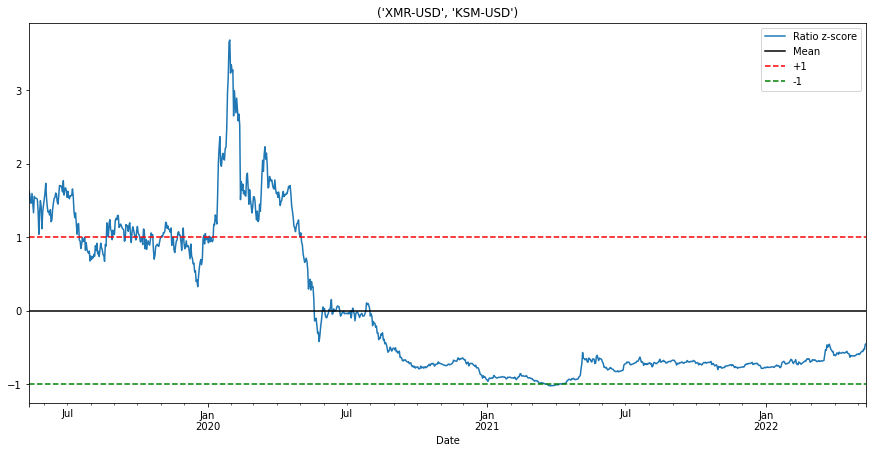

P-valor = 0.0006432801595223599
Score = 4.666692630837891
Ratios = inf


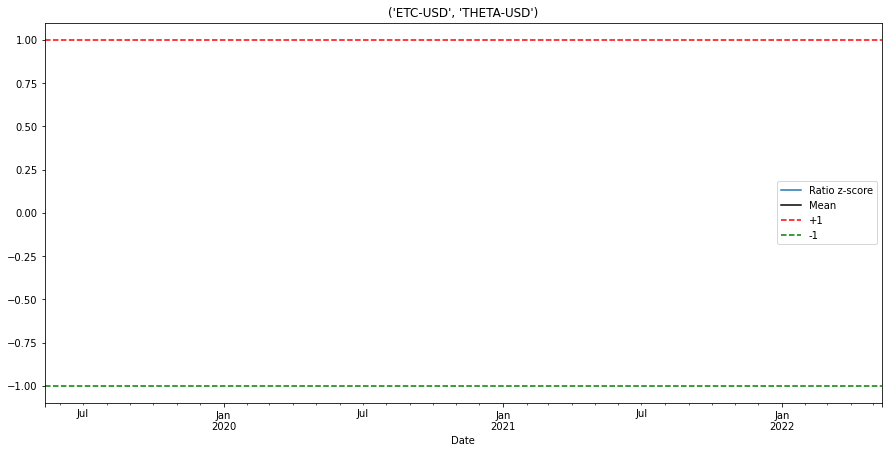

P-valor = 0.000302149255214551
Score = 4.854447656708473
Ratios = inf


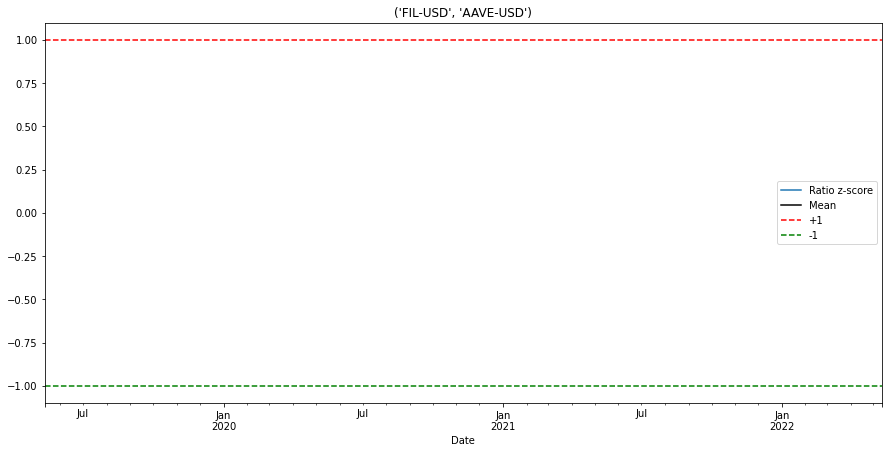

P-valor = 2.612409974975461e-05
Score = 5.4180324249134655
Ratios = 3.5536394098973236


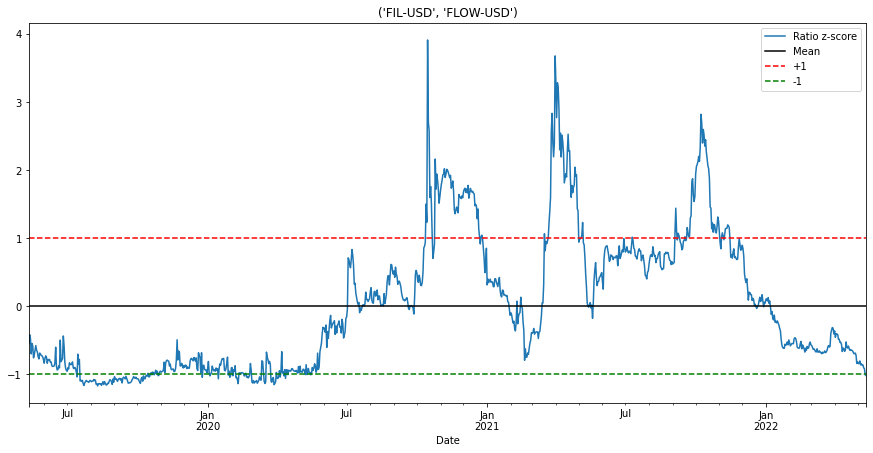

P-valor = 8.160261134464448e-07
Score = 6.137306673382479
Ratios = 1.05174968938073


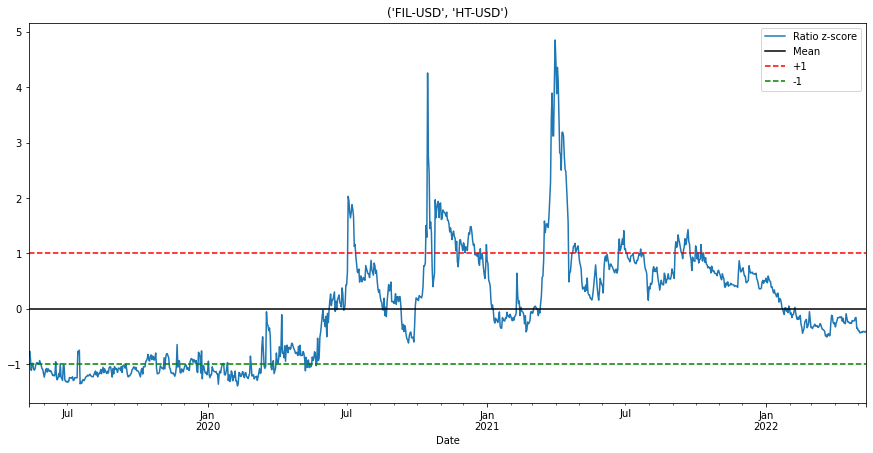

P-valor = 1.1879458363802046e-05
Score = 5.588219058513447
Ratios = inf


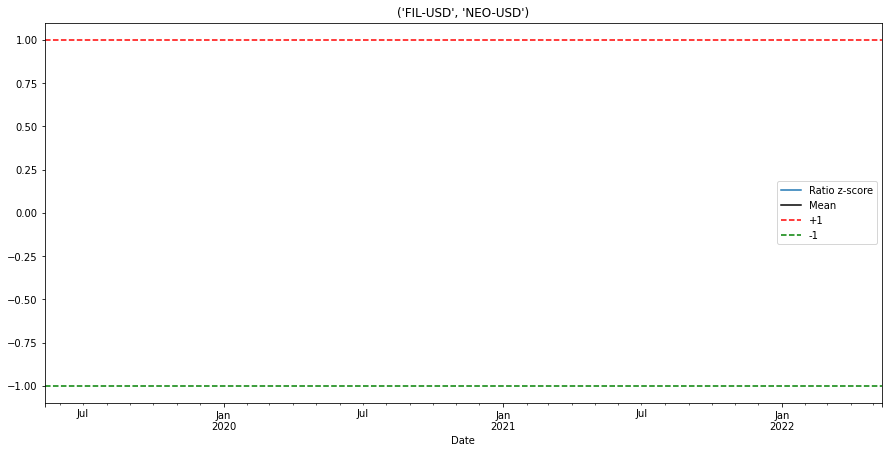

P-valor = 0.00043856880046245865
Score = 4.7628518560479405
Ratios = 11.882650401270588


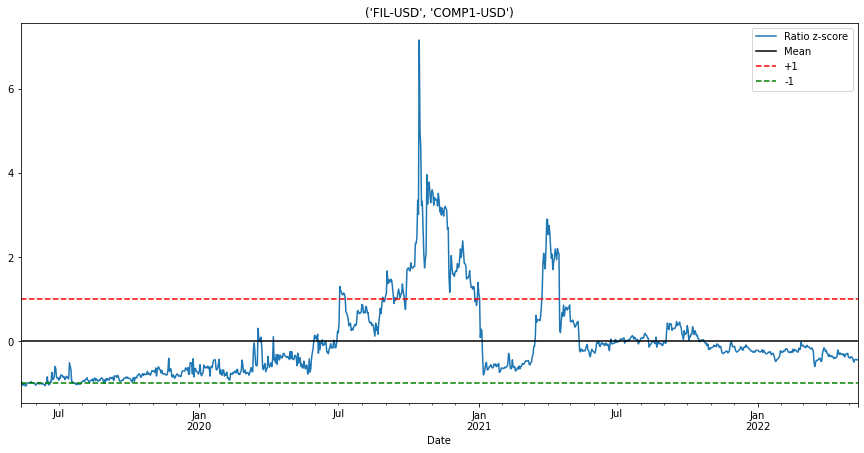

P-valor = 0.0006773085645920433
Score = 4.653589329357207
Ratios = 4.31076444523063


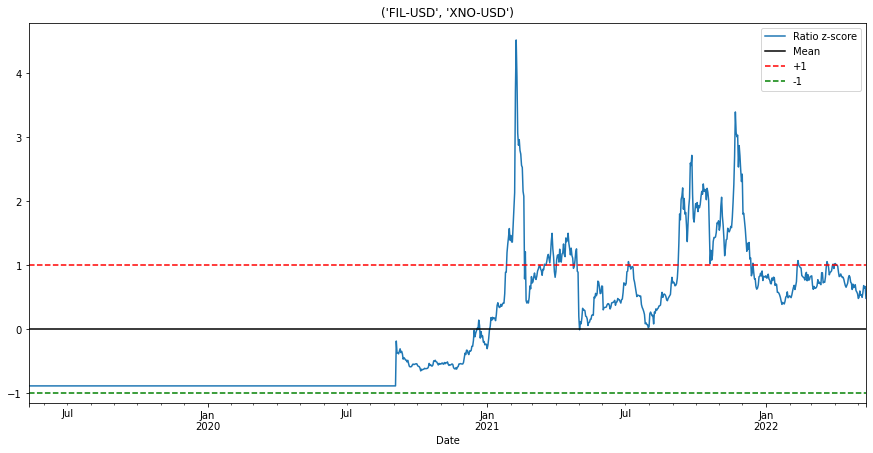

P-valor = 4.71934142595531e-06
Score = 5.782145021898805
Ratios = inf


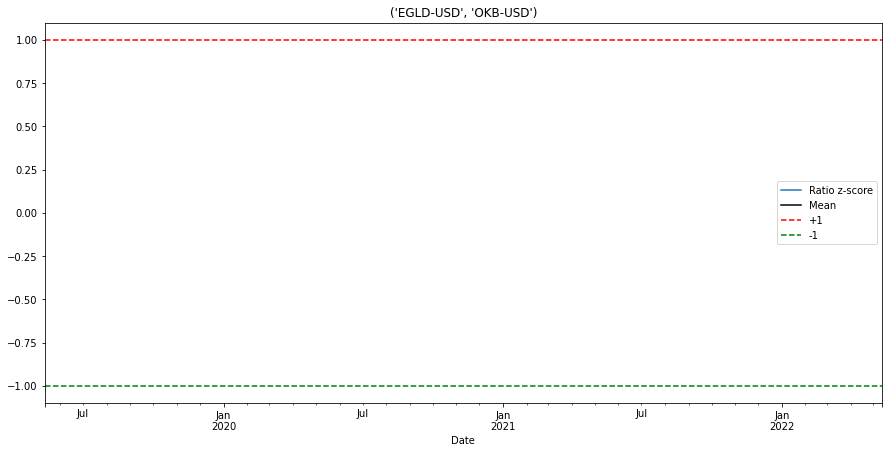

P-valor = 0.0001307630630187718
Score = 5.054128780124981
Ratios = inf


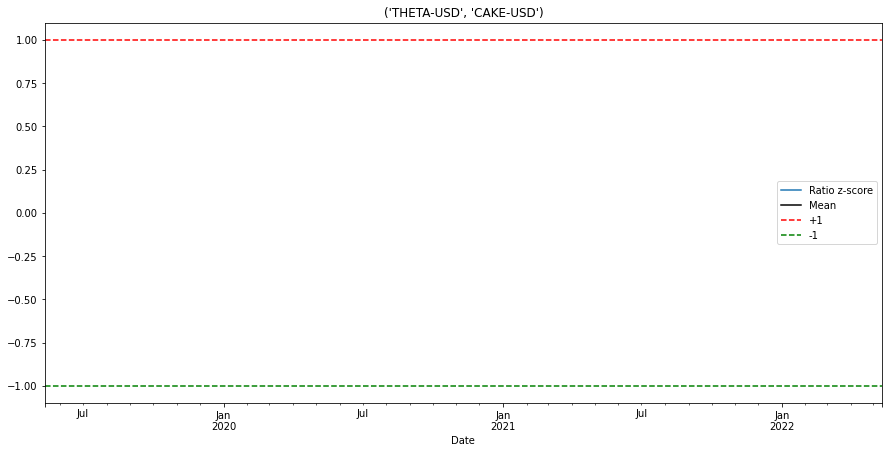

P-valor = 0.00010701910213883275
Score = 5.100746830739681
Ratios = inf


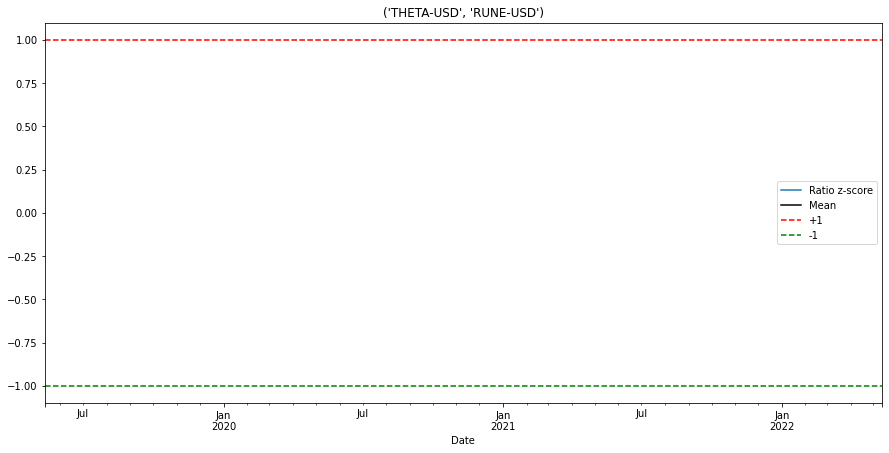

P-valor = 5.73217162781994e-06
Score = 5.741750514857843
Ratios = 0.2537001695512327


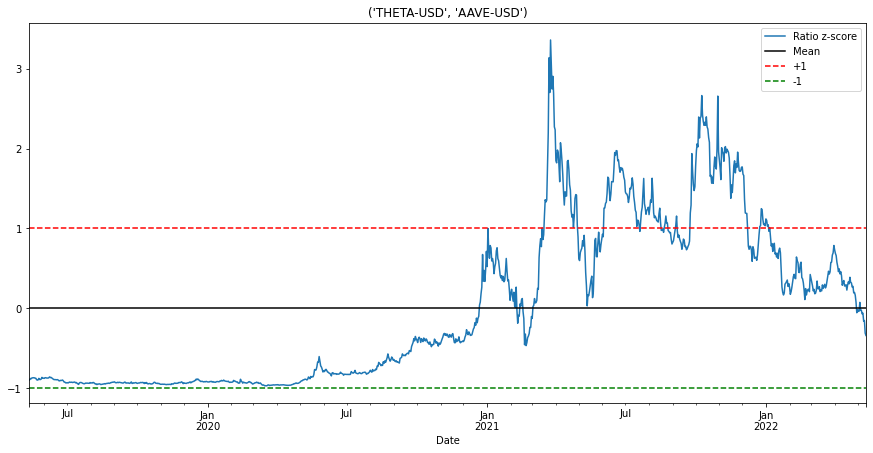

P-valor = 5.111176288301033e-08
Score = 6.670208702451188
Ratios = 0.0012821895076948213


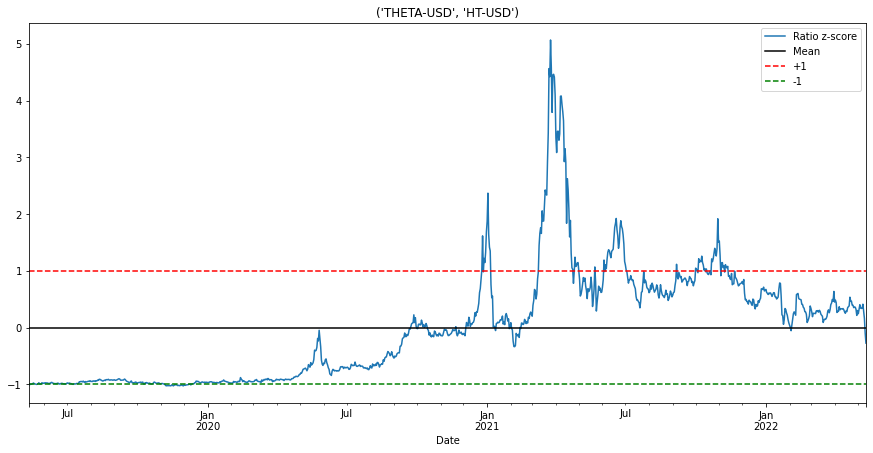

P-valor = 4.4469103372430267e-07
Score = 6.25666463464944
Ratios = 0.07640817869175202


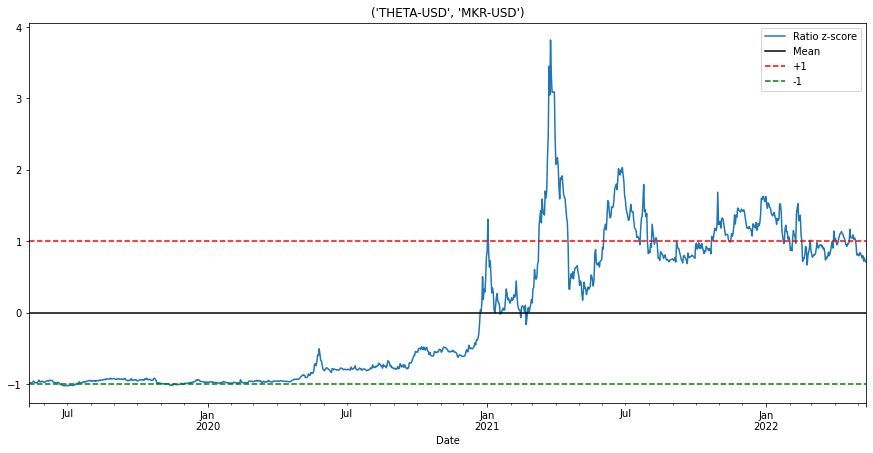

P-valor = 1.1369534988810357e-05
Score = 5.597562326925927
Ratios = 0.031251287860485644


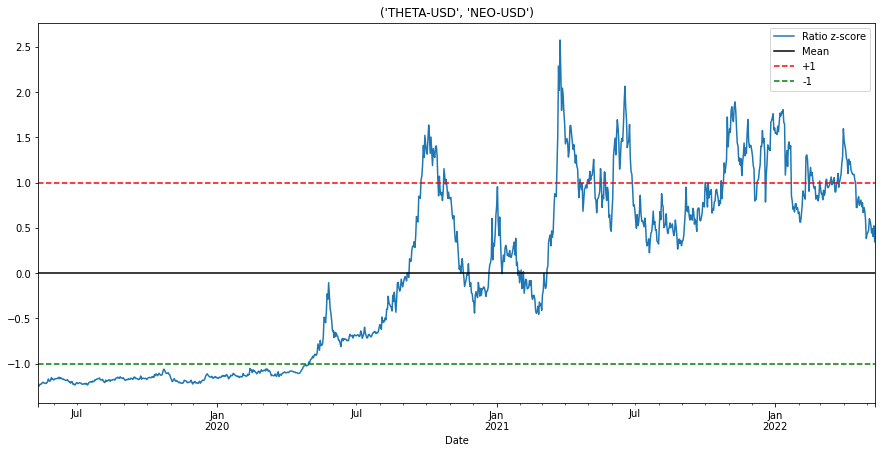

P-valor = 0.00010360501822515311
Score = 5.108250657960248
Ratios = inf


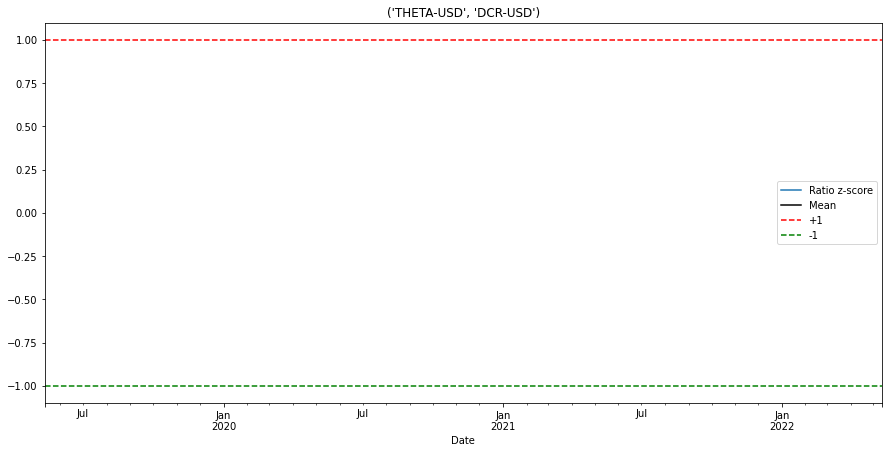

P-valor = 1.3527262301812018e-07
Score = 6.486255740898529
Ratios = 0.7335429694086718


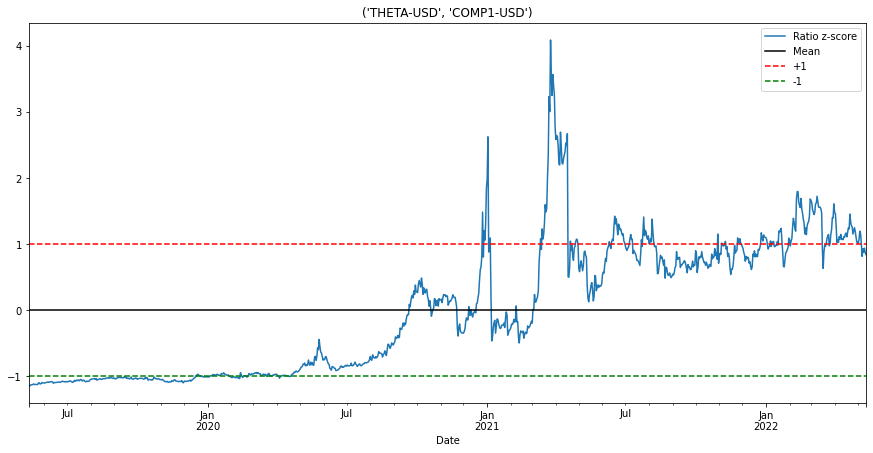

P-valor = 0.00046347698371638503
Score = 4.749113649733877
Ratios = 0.029724927416864028


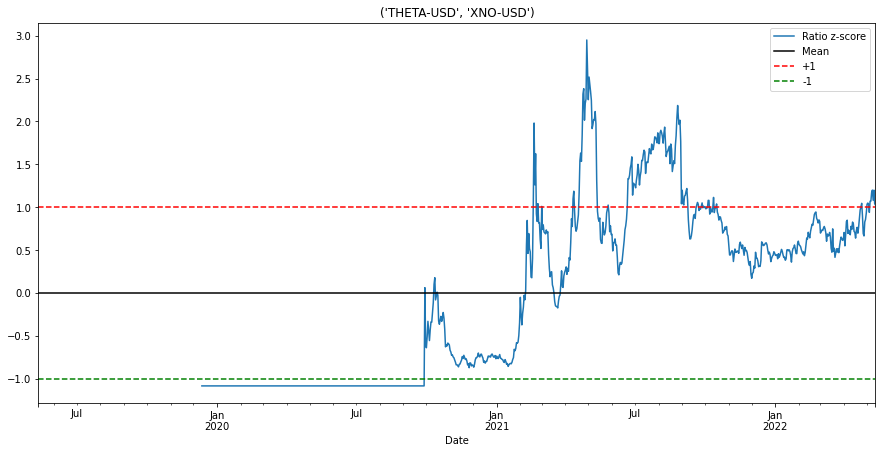

P-valor = 0.00021474682711912109
Score = 4.936843691013907
Ratios = inf


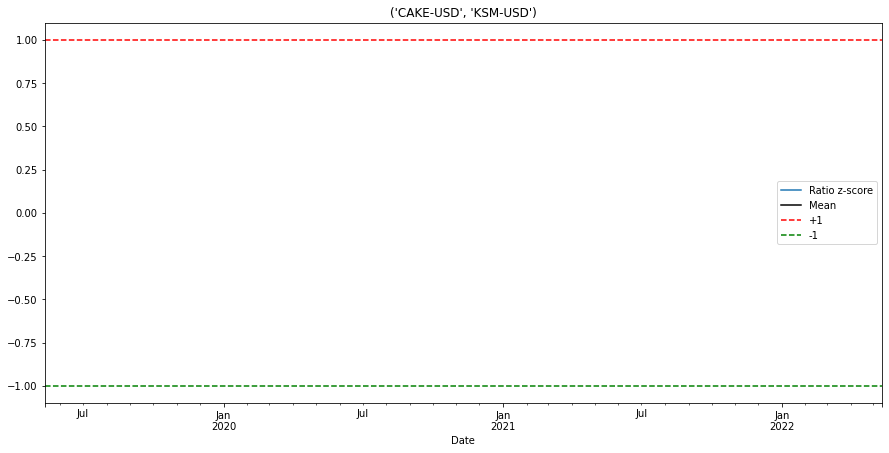

P-valor = 0.0005030984368346667
Score = 4.728634577273236
Ratios = inf


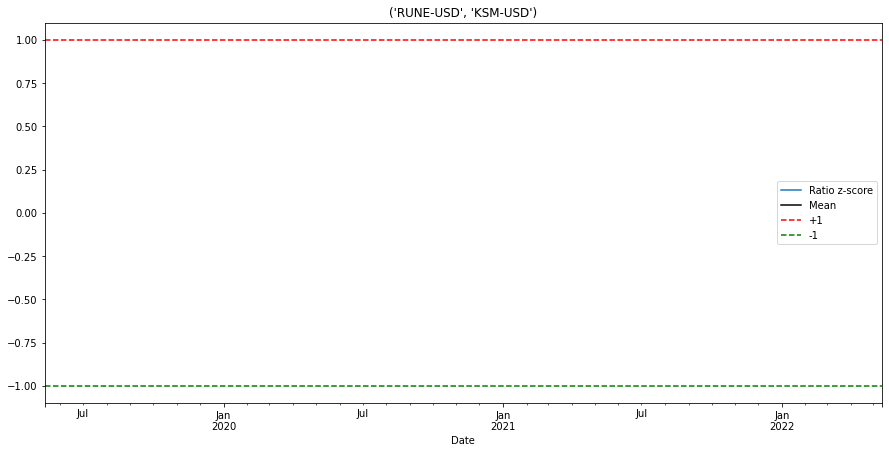

P-valor = 0.0004947136740007685
Score = 4.73283817399367
Ratios = inf


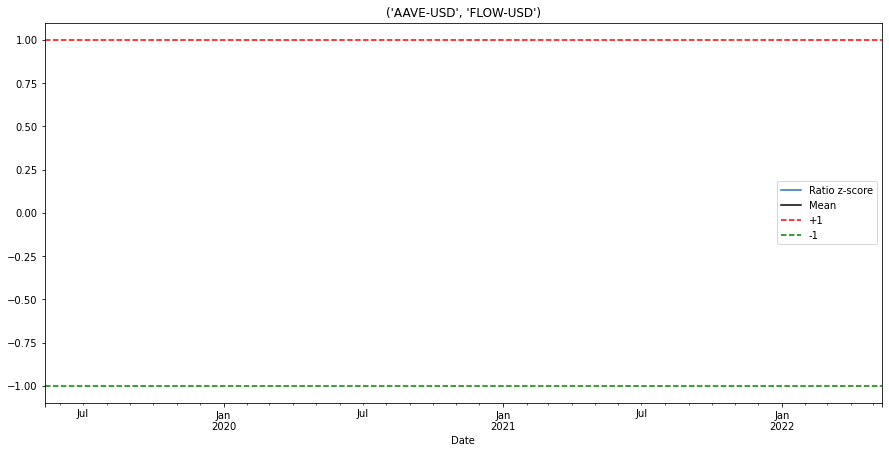

P-valor = 1.9506505068662216e-05
Score = 5.481654748474596
Ratios = 0.4724262592886024


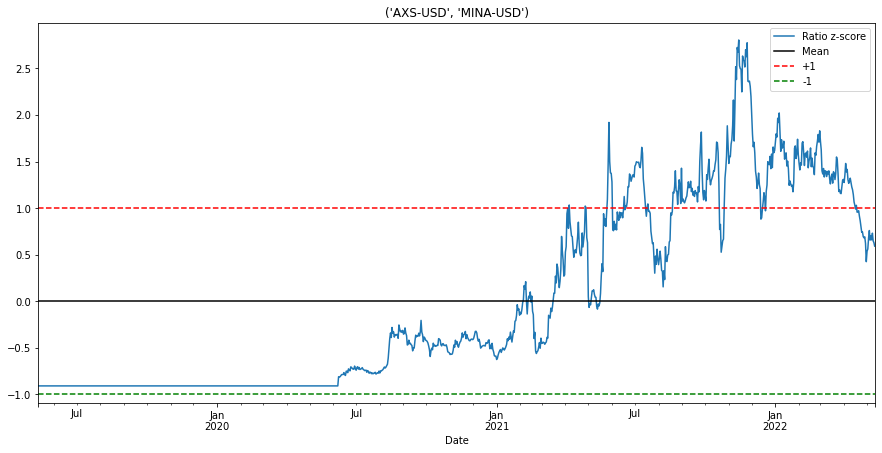

P-valor = 0.0006988263116433592
Score = 4.64561943462299
Ratios = 0.08677595748373144


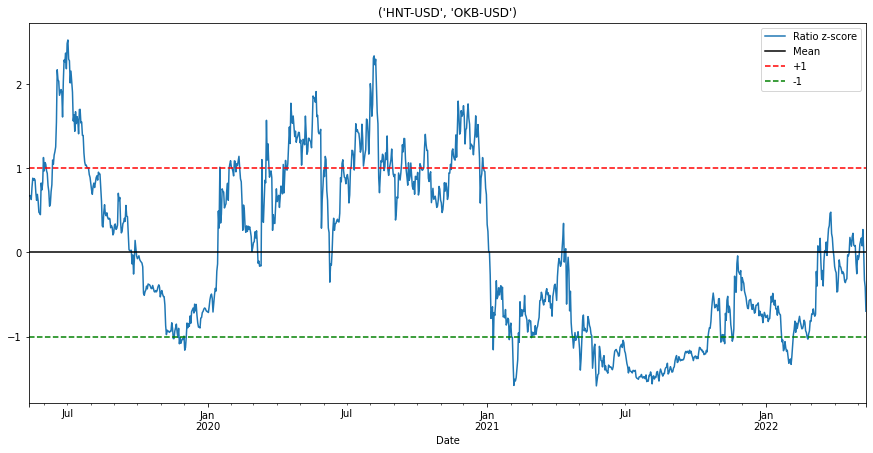

P-valor = 0.0008877667462184357
Score = 4.584133300882528
Ratios = 6.310698101711655


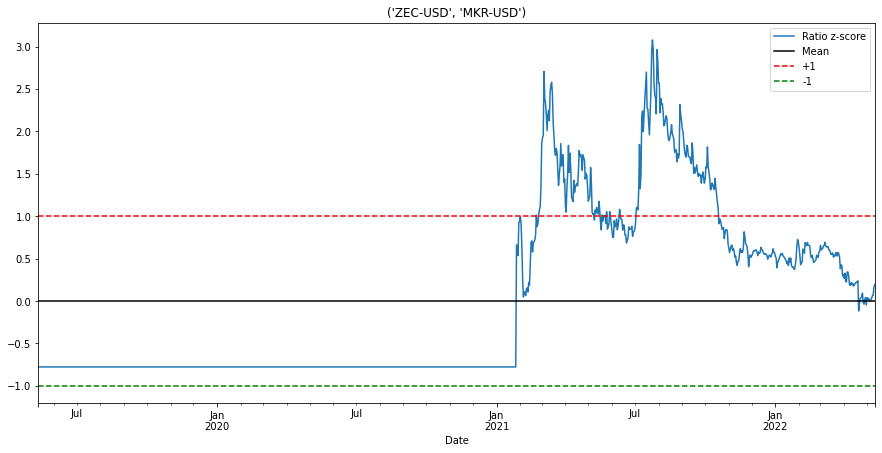

P-valor = 0.0005786992540832919
Score = 4.693462371118431
Ratios = inf


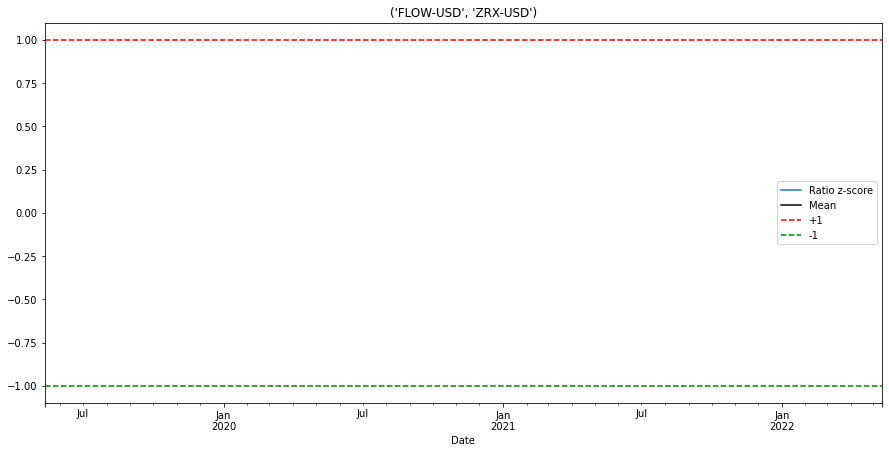

P-valor = 0.0007474226259490415
Score = 4.628436768756497
Ratios = 0.3348854943124524


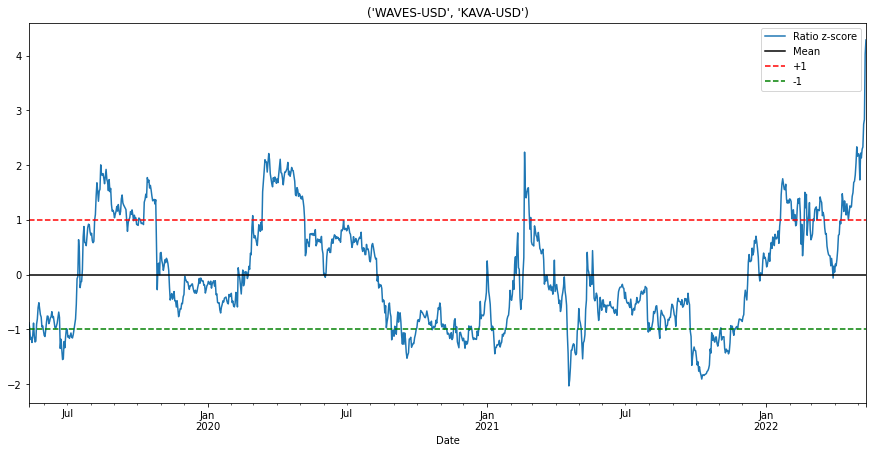

P-valor = 0.0004602696680773194
Score = 4.750842986900484
Ratios = 0.17380960297404574


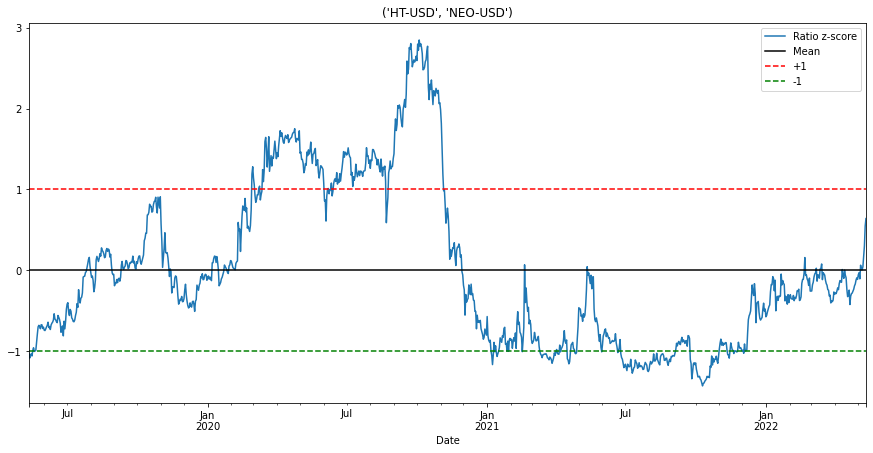

P-valor = 0.0004495218264446069
Score = 4.7567221982862895
Ratios = inf


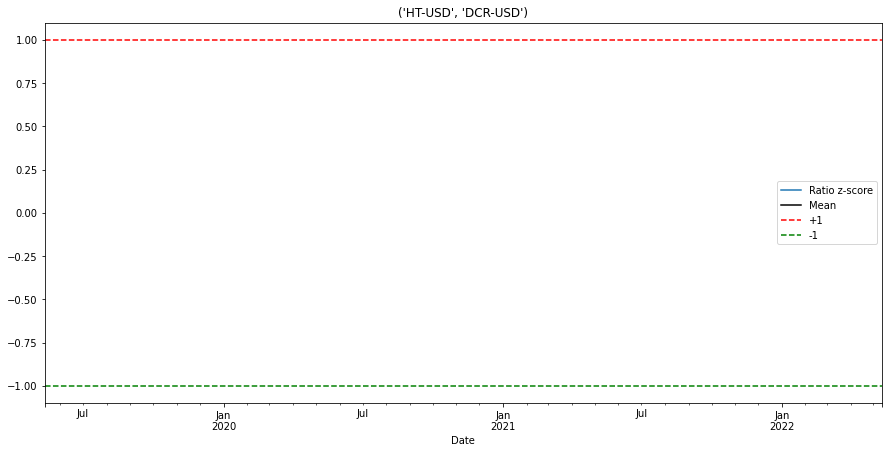

P-valor = 1.4061369062280465e-05
Score = 5.552184824115699
Ratios = inf


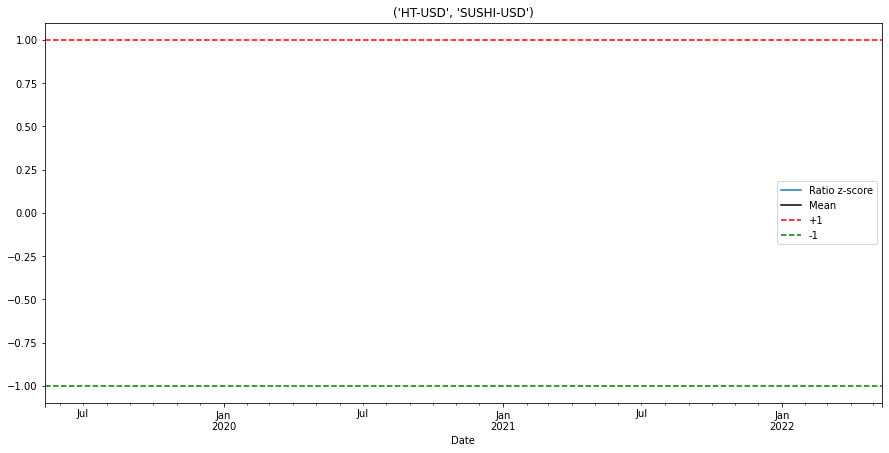

P-valor = 4.551871106667187e-05
Score = 5.29520658135229
Ratios = inf


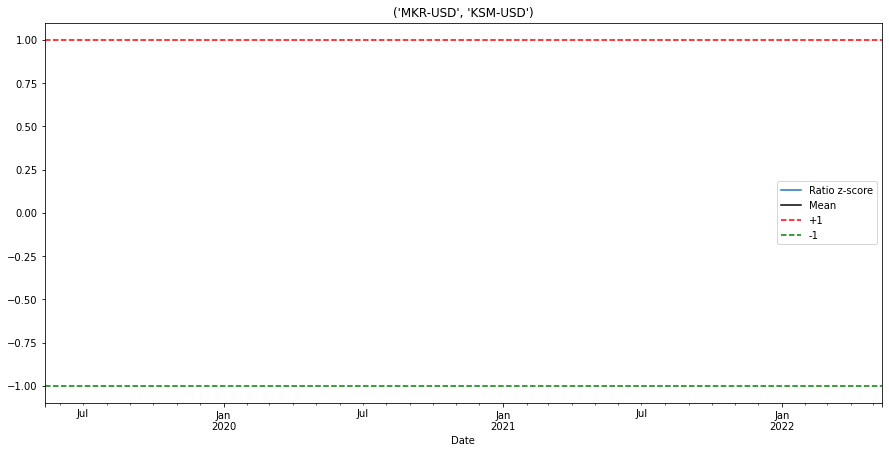

P-valor = 0.00045669361228621916
Score = 4.752784611291148
Ratios = 0.5360222288733244


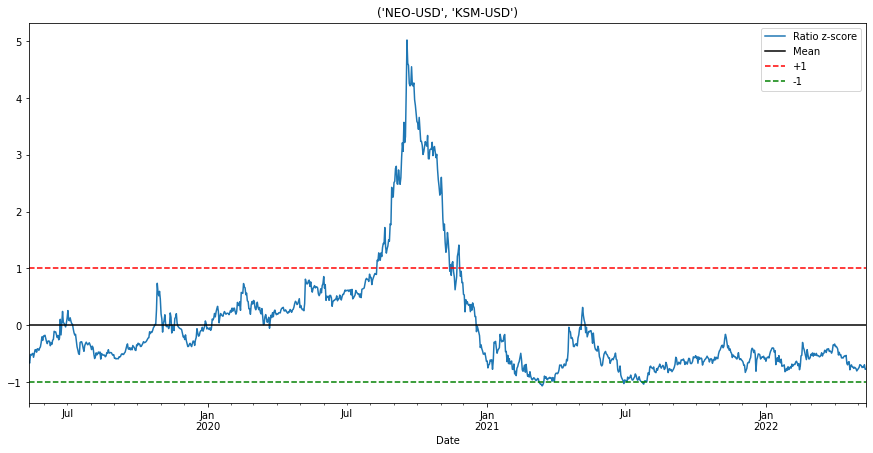

P-valor = 0.0003327375605536844
Score = 4.830915606659641
Ratios = inf


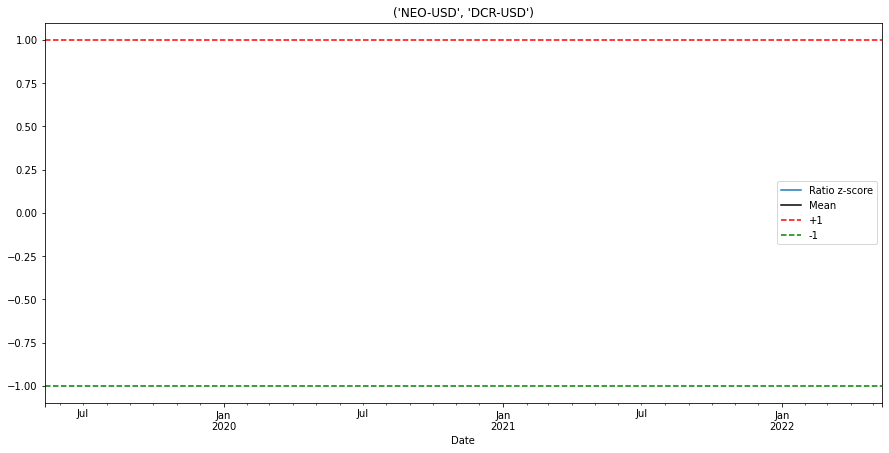

P-valor = 0.0003054614710317356
Score = 4.851793106620343
Ratios = 11.356295631658895


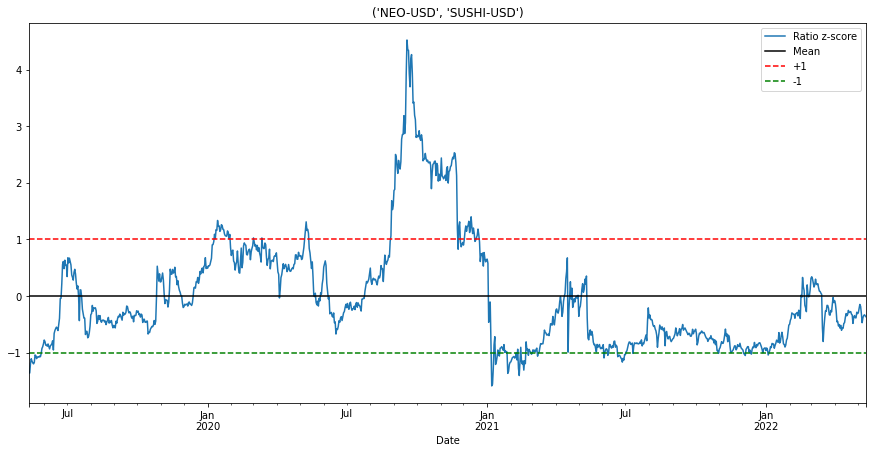

P-valor = 0.0006063613308634545
Score = 4.681668108909959
Ratios = inf


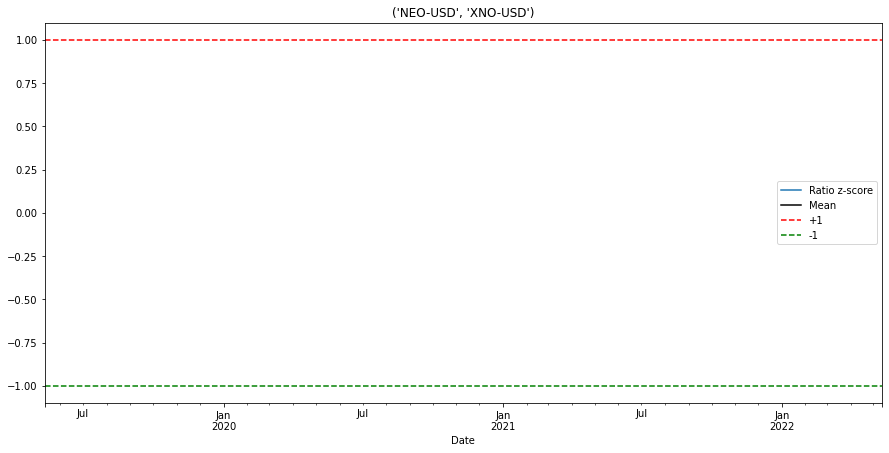

P-valor = 1.2448494273247707e-05
Score = 5.578240201111701
Ratios = 0.10119649203797465


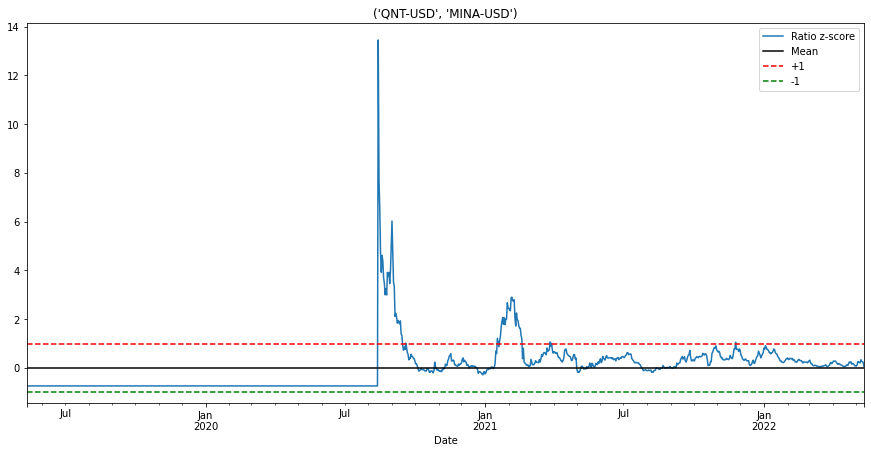

P-valor = 5.128038696539159e-05
Score = 5.268501353300824
Ratios = 0.5986510739675923


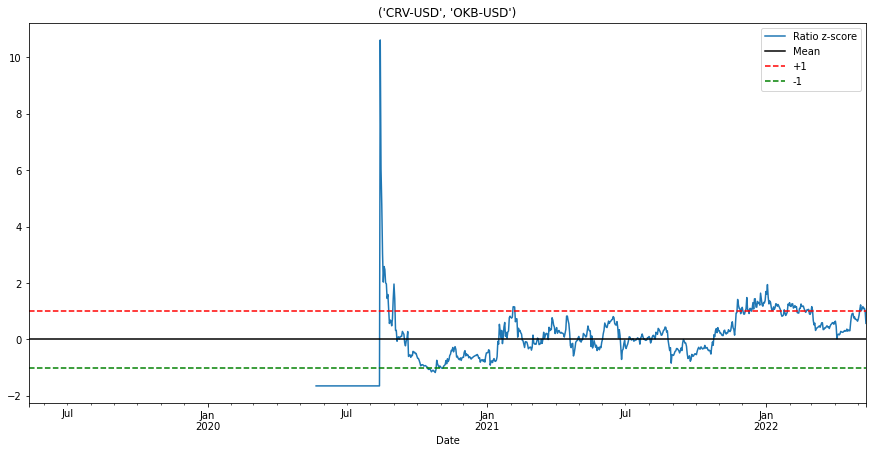

P-valor = 0.00028348756314925386
Score = 4.869940235254892
Ratios = 1.848845430683607


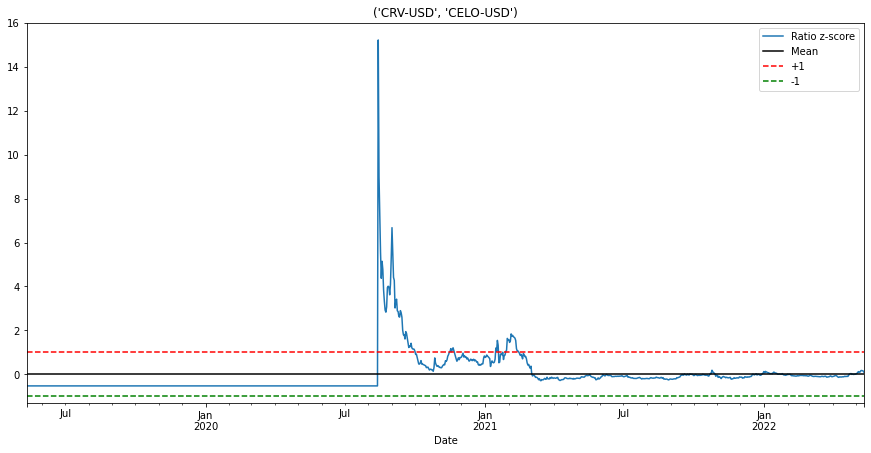

P-valor = 3.507664401958484e-05
Score = 5.353167900497366
Ratios = 24.90304615090788


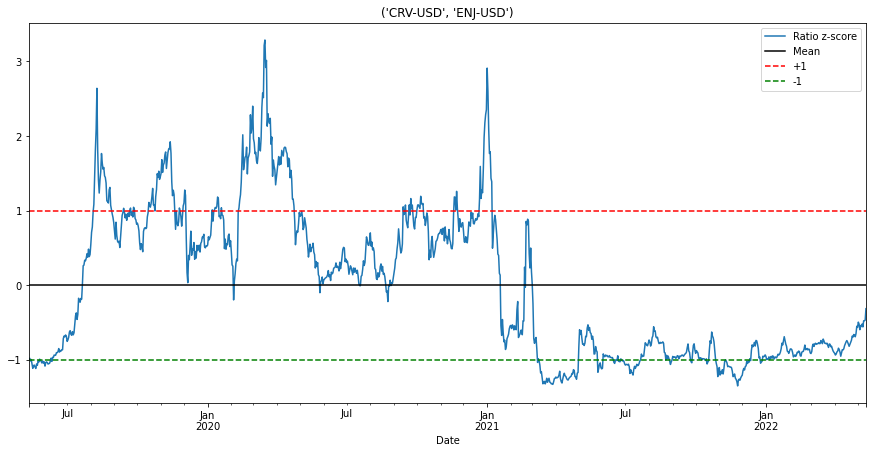

P-valor = 0.0001646212317079778
Score = 5.000030696580008
Ratios = 3.2813985371246313


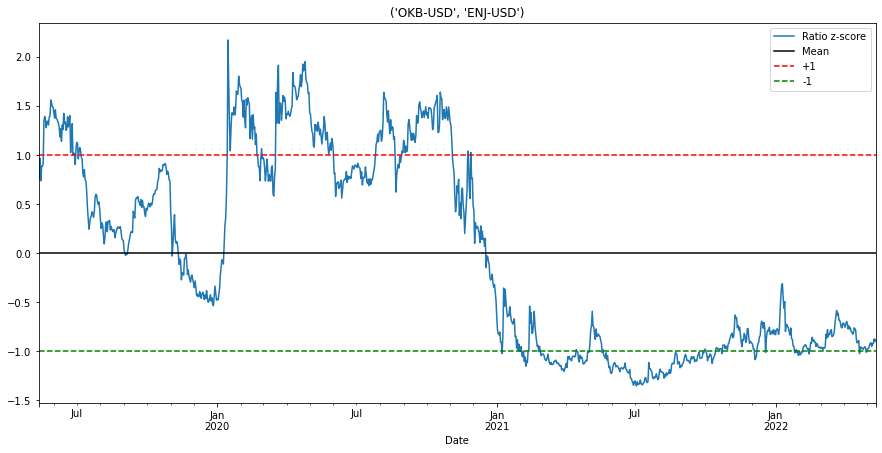

P-valor = 0.00027214536076680955
Score = 4.879836123611997
Ratios = inf


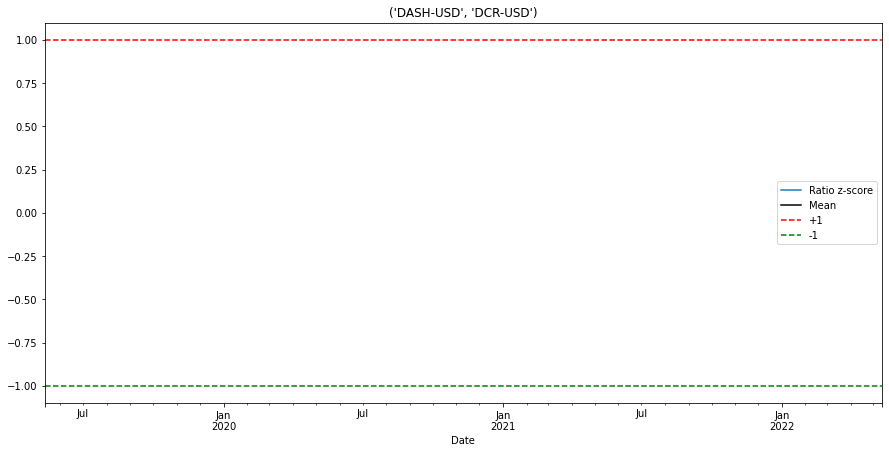

P-valor = 0.0002467242713629027
Score = 4.903518963676318
Ratios = 22.875778718623028


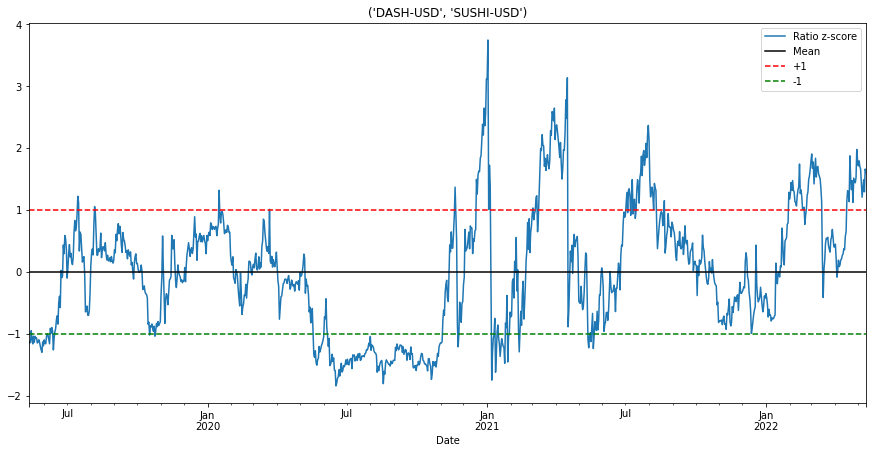

P-valor = 0.0001544118026503407
Score = 5.015130846023317
Ratios = inf


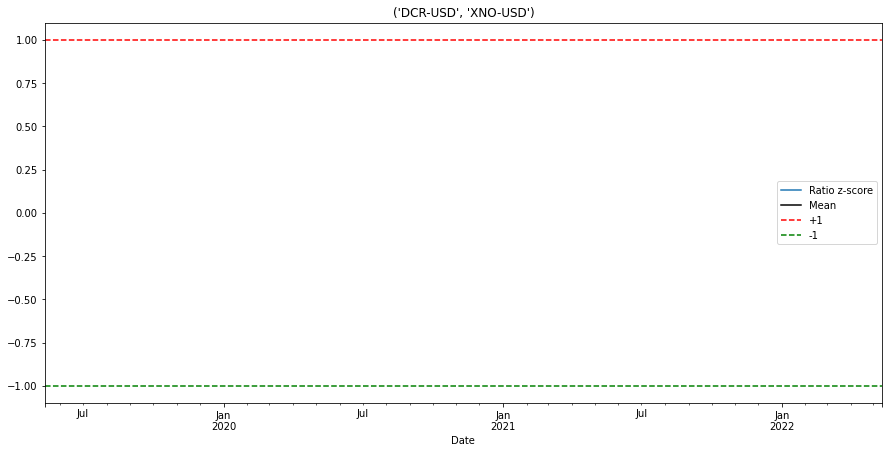

P-valor = 5.5273218883351586e-05
Score = 5.251636258757331
Ratios = 0.06097436887116461


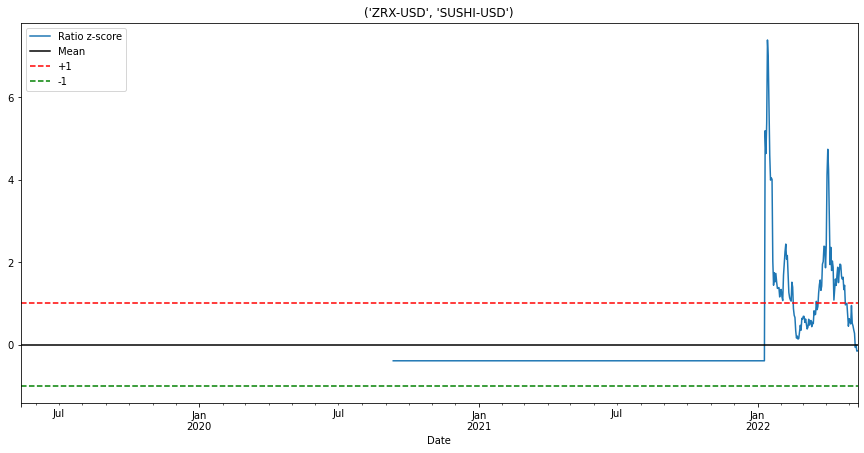

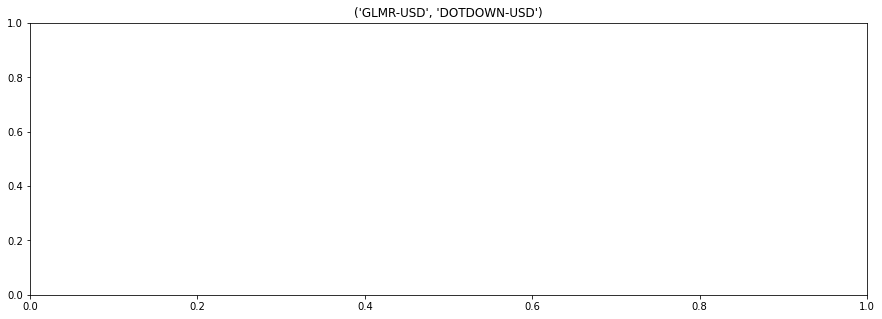

In [47]:
#plota gráfico de ratios
def plotPairsRatios(d2, par):
    desenhaRatio(portfolio_naoest,pair)
    plt.title(pair)
    
   

for pair in pairs:
  plotPairsRatios(portfolio_naoest, pair)
  
   

Suavizando os Ratios

In [37]:
data  = portfolio.dropna().copy()
ratios = data.loc[:,'BTC-USD']/ data.loc[:, 'WBTC-USD']
print(len(ratios))
train = ratios[:400]
test = ratios[400:]

1097


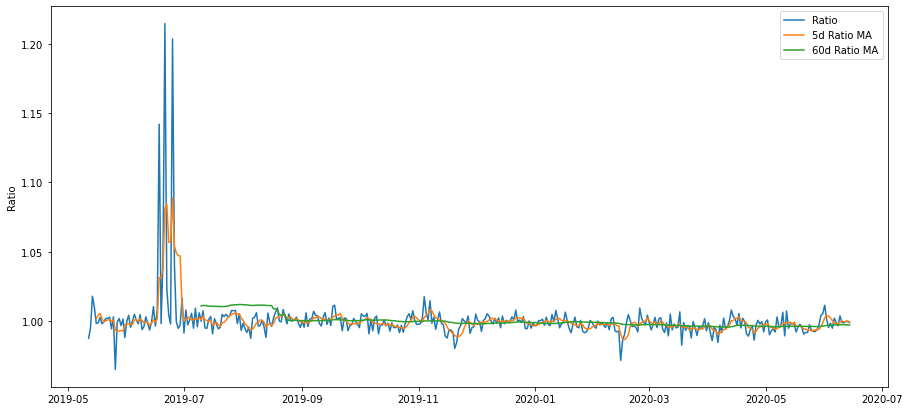

In [38]:
#média movel de 5 periodos
ratios_mavg5 = train.rolling(window=5,center=False).mean()
#média movel de 60 períodos
ratios_mavg60 = train.rolling(window=60, center=False).mean()
#desvio padrão de 60
std_60=train.rolling(window=60,center=False).std()
zscore_60_5=(ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Ratio')
plt.show()

In [39]:
#Obtero desvio padrão da méida móvel de 60 dias
std_60 = train.rolling(window=60, center=False).std()
std_60.name = 'std 60d'

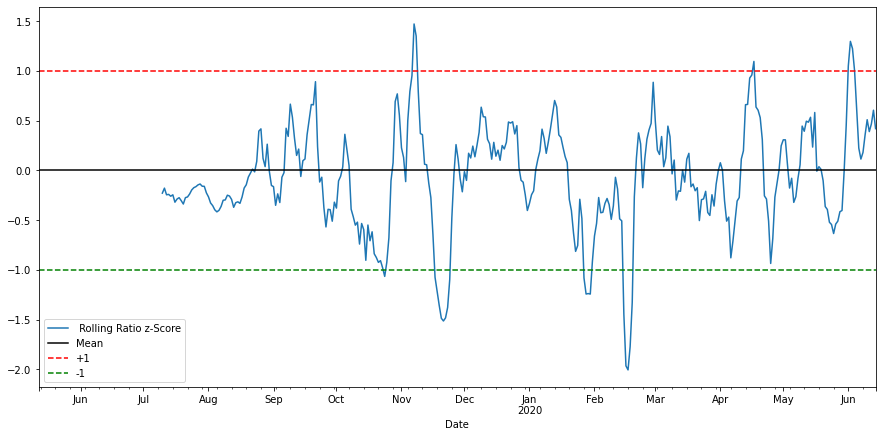

In [40]:
#Computarozscore para cada dia
zscore_60_5 = (ratios_mavg5-ratios_mavg60)/std_60
zscore_60_5.name='z-score'


plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle= '--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend([' Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

Estratégia de Negociação